In [137]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from submission import Controller
from cobar_miniproject.cobar_fly import CobarFly
from cobar_miniproject import levels
from flygym import SingleFlySimulation, Camera
from tqdm import trange




timestep = 1e-4
debug = True
level = 4
seed = 45

fly = CobarFly(
    debug=debug,
    enable_vision=True,
    render_raw_vision=False,
)

if level <= 1:
    arena = levels[level](fly=fly, seed=seed)
else:
    arena = levels[level](fly=fly, timestep=timestep, seed=seed)

cam_params = {"pos": (0, 0, 80)}
timestep = 1e-4

cam = Camera(
    attachment_point=arena.root_element.worldbody,
    camera_name="camera_top_zoomout",
    targeted_fly_names=[fly.name],
    camera_parameters=cam_params,
    play_speed=0.2,
)

sim = SingleFlySimulation(
    fly=fly,
    cameras=[cam],
    timestep=timestep,
    arena=arena,
)

controller = Controller(timestep=timestep)

# run cpg simulation
obs, info = sim.reset()
obs_hist = []
info_hist = []

max_steps = 20000

for i in trange(max_steps):
    # Get observations
    obs, reward, terminated, truncated, info = sim.step(controller.get_actions(obs))
    sim.render()
    if controller.done_level(obs):
        # finish the path integration level
        break

    #if not obs["vision_updated"]:
    #if "vision" in obs:
    #    del obs["vision"]
    #if "raw_vision" in obs:
    #    del obs["raw_vision"]
    obs_hist.append(obs)
    info_hist.append(info)


    if hasattr(controller, "quit") and controller.quit:
        print("Simulation terminated by user.")
        break
    if hasattr(arena, "quit") and arena.quit:
        print("Target reached. Simulation terminated.")
        break

print(f"Available keys in obs: {list(obs.keys())}")


# Save video
save_path = Path("outputs") / f"level{level}_seed{seed}.mp4"
save_path.parent.mkdir(parents=True, exist_ok=True)
cam.save_video(save_path, stabilization_time=0)

  0%|          | 91/20000 [00:00<00:44, 444.55it/s]

True position: [0.01634914 0.00730949], True heading: 0.00°
True position: [0.01644514 0.00730707], True heading: 0.00°
True position: [0.01654977 0.0073048 ], True heading: 0.00°
True position: [0.01681404 0.00730099], True heading: 0.00°
True position: [0.01722859 0.00729457], True heading: 0.00°
True position: [0.01777165 0.00728545], True heading: 0.00°
True position: [0.01841195 0.00727351], True heading: 0.00°
True position: [0.01909476 0.00725704], True heading: 0.00°
True position: [0.01979767 0.00723548], True heading: 0.00°
True position: [0.0205166  0.00720897], True heading: 0.00°
True position: [0.02124417 0.00717795], True heading: 0.00°
True position: [0.02197065 0.00714272], True heading: 0.00°
True position: [0.02268657 0.00710346], True heading: 0.01°
True position: [0.02338402 0.00706026], True heading: 0.01°
True position: [0.02406362 0.00701322], True heading: 0.01°
True position: [0.02472771 0.00696679], True heading: 0.01°
True position: [0.02538444 0.00692101], 

  1%|          | 136/20000 [00:00<00:47, 418.48it/s]

True position: [-0.08515782  0.01399354], True heading: 0.11°
Leg 2 displacement during stance: [0.00211012 0.01355541]
Estimated position: [-0.18177561 -0.01558159] (delta_world=[-0.00213663 -0.01355125])
True position: [-0.09208802  0.01399758], True heading: 0.11°
Leg 5 displacement during stance: [ 0.001858   -0.00946438]
Estimated position: [-0.18359748 -0.00611019] (delta_world=[-0.00182186  0.0094714 ])
True position: [-0.09895478  0.01401807], True heading: 0.12°
True position: [-0.10578859  0.01402647], True heading: 0.12°
True position: [-0.11260086  0.01402273], True heading: 0.13°
True position: [-0.11936498  0.01400888], True heading: 0.14°
True position: [-0.12605345  0.01400686], True heading: 0.15°
Leg 4 displacement during stance: [ 0.00564866 -0.00183415]
Leg 5 displacement during stance: [-0.00025403 -0.00432879]
Estimated position: [-0.18625171 -0.00299154] (delta_world=[-0.00265424  0.00311865])
True position: [-0.13264595  0.01401318], True heading: 0.16°
Leg 2 di

  1%|▏         | 267/20000 [00:00<00:39, 498.99it/s]

True position: [-0.20565377 -0.00523885], True heading: 0.79°
Leg 3 displacement during stance: [ 0.00975084 -0.017941  ]
Estimated position: [-0.37186826 -0.08706106] (delta_world=[-0.006652    0.01930568])
True position: [-0.20534375 -0.0055959 ], True heading: 0.77°
True position: [-0.2050515  -0.00593731], True heading: 0.75°
True position: [-0.20476922 -0.00626982], True heading: 0.73°
True position: [-0.20449966 -0.00659257], True heading: 0.71°
True position: [-0.2042447  -0.00689857], True heading: 0.70°
True position: [-0.20400766 -0.00719405], True heading: 0.68°
True position: [-0.20378931 -0.00746933], True heading: 0.66°
True position: [-0.20359164 -0.00771484], True heading: 0.64°
True position: [-0.2034176 -0.0079225], True heading: 0.63°
True position: [-0.2032701  -0.00808585], True heading: 0.61°
True position: [-0.20315109 -0.00820025], True heading: 0.60°
True position: [-0.20306063 -0.00826328], True heading: 0.59°
True position: [-0.20299792 -0.00827387], True hea

  2%|▏         | 367/20000 [00:00<00:40, 483.54it/s]

True position: [-0.12734412  0.02625507], True heading: 1.12°
True position: [-0.12621592  0.02528849], True heading: 1.13°
True position: [-0.12511551  0.02425521], True heading: 1.14°
True position: [-0.12404278  0.02316007], True heading: 1.15°
True position: [-0.12299865  0.02200739], True heading: 1.17°
True position: [-0.12198367  0.02080049], True heading: 1.18°
True position: [-0.12099801  0.01954235], True heading: 1.19°
True position: [-0.12004152  0.01823614], True heading: 1.21°
True position: [-0.11911377  0.01688534], True heading: 1.22°
True position: [-0.11821378  0.01549302], True heading: 1.24°
True position: [-0.11734017  0.01406216], True heading: 1.26°
True position: [-0.11650436  0.01259038], True heading: 1.28°
Leg 3 displacement during stance: [-0.088081   -0.04268736]
Estimated position: [-0.28371031 -0.05729762] (delta_world=[0.09351764 0.02889507])
True position: [-0.1157113   0.01107913], True heading: 1.30°
True position: [-0.11496335  0.00953112], True hea

  2%|▏         | 468/20000 [00:00<00:41, 475.01it/s]

True position: [-0.06749801 -0.07256547], True heading: 3.39°
Leg 3 displacement during stance: [0.00272608 0.02394426]
Estimated position: [-0.0101984  -0.53568666] (delta_world=[-0.00407351 -0.02375217])
True position: [-0.06713448 -0.07252944], True heading: 3.40°
True position: [-0.06676558 -0.07242988], True heading: 3.42°
True position: [-0.06639535 -0.07226137], True heading: 3.43°
True position: [-0.06602786 -0.07202251], True heading: 3.45°
True position: [-0.06566984 -0.07171244], True heading: 3.46°
True position: [-0.06532747 -0.07133197], True heading: 3.48°
True position: [-0.06500465 -0.07088359], True heading: 3.50°
True position: [-0.0647011  -0.07037204], True heading: 3.51°
True position: [-0.06442192 -0.06979932], True heading: 3.53°
Leg 5 displacement during stance: [ 0.06618392 -0.00802526]
Estimated position: [-0.07578647 -0.52373169] (delta_world=[-0.06558807  0.01195497])
True position: [-0.06416448 -0.06917083], True heading: 3.55°
True position: [-0.06392214 

  3%|▎         | 534/20000 [00:01<00:40, 478.11it/s]

True position: [-0.0116285  0.0556477], True heading: 6.40°
True position: [-0.00911012  0.05628305], True heading: 6.40°
True position: [-0.00650773  0.05692653], True heading: 6.40°
True position: [-0.00382842  0.05756913], True heading: 6.41°
True position: [-0.00108037  0.05821843], True heading: 6.43°
True position: [0.00172784 0.05888205], True heading: 6.44°
True position: [0.00458728 0.05956596], True heading: 6.46°
True position: [0.0074912  0.06025698], True heading: 6.49°
True position: [0.01043098 0.06096124], True heading: 6.52°
True position: [0.01339772 0.06168454], True heading: 6.55°
True position: [0.01638269 0.06243064], True heading: 6.59°
True position: [0.0193777  0.06320107], True heading: 6.63°
Leg 4 displacement during stance: [ 0.00092038 -0.00650084]
Estimated position: [-0.10919976 -0.46262269] (delta_world=[-0.00048582  0.00654767])
True position: [0.02237527 0.06399535], True heading: 6.67°
True position: [0.02537169 0.0647898 ], True heading: 6.72°
True p

  3%|▎         | 667/20000 [00:01<00:40, 475.35it/s]

True position: [0.14409335 0.01239565], True heading: 8.11°
True position: [0.14530104 0.0098669 ], True heading: 8.07°
True position: [0.14656535 0.00735683], True heading: 8.03°
True position: [0.14788759 0.00487252], True heading: 7.99°
True position: [0.14926662 0.00242063], True heading: 7.95°
True position: [1.5069944e-01 7.2693338e-06], True heading: 7.91°
True position: [ 0.15218198 -0.00236193], True heading: 7.88°
True position: [ 0.15370965 -0.00468144], True heading: 7.85°
True position: [ 0.15527727 -0.00694578], True heading: 7.83°
True position: [ 0.15686838 -0.00915096], True heading: 7.80°
True position: [ 0.15848227 -0.01129356], True heading: 7.78°
True position: [ 0.16011798 -0.01336701], True heading: 7.76°
True position: [ 0.16177213 -0.01536441], True heading: 7.75°
True position: [ 0.16343895 -0.01727979], True heading: 7.74°
Leg 3 displacement during stance: [-0.1681      0.03597689]
Estimated position: [ 0.41155489 -0.67212615] (delta_world=[ 0.16052552 -0.061

  4%|▍         | 784/20000 [00:01<00:38, 502.96it/s]

True position: [ 0.20064583 -0.01781417], True heading: 10.83°
True position: [ 0.2008037 -0.0156591], True heading: 10.93°
Leg 1 displacement during stance: [0.00072334 0.00359857]
Estimated position: [ 0.24378451 -0.78443504] (delta_world=[-0.00114942 -0.00348594])
True position: [ 0.2009725  -0.01346034], True heading: 11.04°
True position: [ 0.2011443  -0.01120009], True heading: 11.15°
True position: [ 0.20132008 -0.00886194], True heading: 11.27°
True position: [ 0.20149897 -0.00645431], True heading: 11.40°
True position: [ 0.20167401 -0.00399036], True heading: 11.53°
True position: [ 0.20184676 -0.00148076], True heading: 11.66°
True position: [0.20202214 0.00106555], True heading: 11.80°
Leg 1 displacement during stance: [0.00302444 0.0021826 ]
Leg 5 displacement during stance: [0.01057804 0.01355803]
Estimated position: [ 0.23610783 -0.7914541 ] (delta_world=[-0.00767668 -0.00701906])
True position: [0.20220368 0.00364237], True heading: 11.94°
True position: [0.20239931 0.0

  4%|▍         | 884/20000 [00:01<00:41, 464.18it/s]

True position: [0.3302394  0.21991853], True heading: 15.95°
True position: [0.33357364 0.22232825], True heading: 15.89°
True position: [0.33690625 0.22476766], True heading: 15.83°
Leg 0 displacement during stance: [ 0.00212324 -0.0015136 ]
Estimated position: [ 0.56492261 -0.69286026] (delta_world=[-0.00217553  0.00143742])
True position: [0.34023216 0.2272297 ], True heading: 15.78°
True position: [0.34357035 0.22973472], True heading: 15.73°
True position: [0.3469174  0.23227799], True heading: 15.69°
True position: [0.35026762 0.23485093], True heading: 15.65°
True position: [0.3536159  0.23744492], True heading: 15.63°
Leg 3 displacement during stance: [-0.06137538  0.02664346]
Estimated position: [ 0.62759394 -0.71629347] (delta_world=[ 0.06267133 -0.02343322])
True position: [0.35695803 0.24005179], True heading: 15.60°
True position: [0.36029053 0.2426638 ], True heading: 15.59°
Leg 0 displacement during stance: [ 0.00281405 -0.00335711]
Estimated position: [ 0.62458611 -0.71

  5%|▍         | 996/20000 [00:02<00:39, 477.08it/s]

True position: [0.58869433 0.22782347], True heading: 13.74°
True position: [0.58994484 0.22728729], True heading: 13.75°
Leg 5 displacement during stance: [-0.00178957  0.00135696]
Estimated position: [ 1.2136176  -0.65667223] (delta_world=[ 0.00175517 -0.00140117])
True position: [0.5910761  0.22685477], True heading: 13.77°
True position: [0.59209937 0.2265302 ], True heading: 13.79°
True position: [0.5930232  0.22631498], True heading: 13.82°
True position: [0.59385324 0.22620952], True heading: 13.85°
True position: [0.5945985  0.22621457], True heading: 13.89°
True position: [0.59526765 0.22633053], True heading: 13.94°
True position: [0.5958691  0.22655694], True heading: 14.00°
True position: [0.5964105  0.22689234], True heading: 14.06°
True position: [0.596899   0.22733456], True heading: 14.13°
True position: [0.5973415  0.22788155], True heading: 14.21°
True position: [0.5977428  0.22853266], True heading: 14.29°
True position: [0.5981166 0.2292978], True heading: 14.38°
Tr

  5%|▌         | 1044/20000 [00:02<00:41, 456.95it/s]

True position: [0.70945203 0.27214882], True heading: 19.60°
True position: [0.71114606 0.2729337 ], True heading: 19.71°
True position: [0.71283966 0.27380764], True heading: 19.83°
True position: [0.7145167  0.27477202], True heading: 19.95°
True position: [0.71617156 0.27582604], True heading: 20.07°
True position: [0.7177978 0.2769722], True heading: 20.19°
True position: [0.7193858  0.27821368], True heading: 20.32°
True position: [0.72092634 0.27955383], True heading: 20.45°
Leg 3 displacement during stance: [ 0.00631213 -0.03174478]
Estimated position: [ 1.29844995 -0.60280349] (delta_world=[-0.00165095  0.03232411])
True position: [0.72240883 0.28099507], True heading: 20.58°
True position: [0.72386897 0.2825346 ], True heading: 20.72°
True position: [0.7253076 0.2841699], True heading: 20.85°
True position: [0.7267176  0.28589928], True heading: 20.99°
True position: [0.72809124 0.28772205], True heading: 21.13°
True position: [0.7294211  0.28963777], True heading: 21.27°
True

  6%|▌         | 1134/20000 [00:02<00:45, 417.72it/s]

True position: [0.8648961 0.5023601], True heading: 19.34°
Leg 2 displacement during stance: [-0.04341888 -0.04876423]
Estimated position: [ 1.64809399 -0.5192404 ] (delta_world=[0.04739047 0.04491429])
True position: [0.86777794 0.50529844], True heading: 19.24°
True position: [0.8706254  0.50816905], True heading: 19.14°
True position: [0.87344056 0.5109708 ], True heading: 19.05°
Leg 0 displacement during stance: [0.0063132 0.0197528]
Estimated position: [ 1.64003698 -0.53834836] (delta_world=[-0.00805701 -0.01910796])
True position: [0.8762242  0.51369995], True heading: 18.96°
True position: [0.87900805 0.5163861 ], True heading: 18.87°
True position: [0.8817983 0.5190366], True heading: 18.78°
True position: [0.88458025 0.5216342 ], True heading: 18.70°
True position: [0.8873393 0.5241601], True heading: 18.63°
True position: [0.8900639 0.5265983], True heading: 18.55°
True position: [0.892746  0.5289368], True heading: 18.47°
True position: [0.89538074 0.53116745], True heading:

  6%|▋         | 1266/20000 [00:02<00:38, 485.98it/s]

True position: [1.0831368 0.5631961], True heading: 14.53°
True position: [1.0856528  0.56518334], True heading: 14.55°
Leg 5 displacement during stance: [ 0.01136541 -0.0035398 ]
Estimated position: [ 2.08050855 -0.54321434] (delta_world=[-0.00971252  0.00688256])
True position: [1.0881557 0.5671839], True heading: 14.58°
True position: [1.0906489 0.5691985], True heading: 14.60°
True position: [1.0931349  0.57122684], True heading: 14.63°
True position: [1.0956118 0.5732662], True heading: 14.65°
True position: [1.0980755 0.575312 ], True heading: 14.68°
True position: [1.1005206 0.5773581], True heading: 14.70°
True position: [1.102938   0.57939655], True heading: 14.73°
True position: [1.1053556 0.5814288], True heading: 14.76°
Leg 3 displacement during stance: [-0.10643363  0.04553401]
Estimated position: [ 2.16570836 -0.62158817] (delta_world=[ 0.08519981 -0.07837383])
True position: [1.1077884  0.58344615], True heading: 14.78°
True position: [1.1103221 0.5854166], True heading:

  7%|▋         | 1316/20000 [00:02<00:41, 452.25it/s]

True position: [1.346063   0.54650635], True heading: 19.08°
True position: [1.3477864  0.54612523], True heading: 19.23°
True position: [1.349478 0.545874], True heading: 19.38°
True position: [1.3511306 0.5457604], True heading: 19.54°
True position: [1.3527387  0.54579276], True heading: 19.68°
True position: [1.3542992 0.5459784], True heading: 19.83°
True position: [1.35581    0.54632354], True heading: 19.97°
True position: [1.3572698 0.5468323], True heading: 20.11°
True position: [1.3586773 0.5475074], True heading: 20.25°
True position: [1.3600374 0.5483485], True heading: 20.39°
True position: [1.3613535 0.5493552], True heading: 20.52°
True position: [1.3626254 0.5505268], True heading: 20.65°
True position: [1.3638664 0.5518584], True heading: 20.77°
True position: [1.3650763  0.55334926], True heading: 20.89°
True position: [1.3662477 0.5549962], True heading: 21.00°
True position: [1.3673717  0.55679464], True heading: 21.10°
True position: [1.3684398 0.5587394], True hea

  7%|▋         | 1410/20000 [00:03<00:43, 423.65it/s]

True position: [1.4552678  0.79295444], True heading: 18.12°
True position: [1.4585006 0.7954499], True heading: 18.01°
Leg 0 displacement during stance: [0.00772095 0.02948421]
Estimated position: [ 2.91045295 -0.85733954] (delta_world=[-0.01695803 -0.02532503])
True position: [1.461697   0.79781836], True heading: 17.90°
True position: [1.4649009 0.8000991], True heading: 17.79°
True position: [1.4681183 0.8023048], True heading: 17.68°
True position: [1.4713317 0.8044191], True heading: 17.57°
True position: [1.4745247 0.8064219], True heading: 17.46°
True position: [1.4776827  0.80829823], True heading: 17.35°
True position: [1.4807945  0.81003803], True heading: 17.23°
Leg 3 displacement during stance: [-0.07106543 -0.06330585]
Estimated position: [ 2.99836442 -0.82087724] (delta_world=[0.08791147 0.0364623 ])
True position: [1.4838531 0.811635 ], True heading: 17.12°
True position: [1.4868548 0.8130867], True heading: 17.00°
True position: [1.4897977 0.8143936], True heading: 16.

  8%|▊         | 1525/20000 [00:03<00:40, 457.46it/s]

True position: [1.7179797 0.8027607], True heading: 12.76°
True position: [1.723381  0.8041871], True heading: 12.74°
Leg 5 displacement during stance: [ 0.01315296 -0.0074932 ]
Estimated position: [ 3.75882209 -0.73508026] (delta_world=[-0.0068339   0.01350726])
True position: [1.7287683 0.8055581], True heading: 12.71°
True position: [1.7341487 0.8068781], True heading: 12.68°
Leg 3 displacement during stance: [ 0.0044806  -0.01829386]
Estimated position: [ 3.7651989  -0.71735804] (delta_world=[0.00637681 0.01772223])
True position: [1.7395211  0.80814946], True heading: 12.65°
True position: [1.7449381  0.80934733], True heading: 12.60°
Leg 1 displacement during stance: [0.0102894  0.00474608]
Estimated position: [ 3.7540039  -0.71560617] (delta_world=[-0.011195    0.00175187])
True position: [1.7503997 0.8104592], True heading: 12.56°
True position: [1.7558923  0.81147534], True heading: 12.51°
True position: [1.7614102  0.81239134], True heading: 12.46°
True position: [1.7669469 0

  8%|▊         | 1617/20000 [00:03<00:41, 441.34it/s]

True position: [1.996889  0.7744666], True heading: 17.85°
True position: [1.9970353  0.77763397], True heading: 17.85°
True position: [1.9972011 0.7809044], True heading: 17.84°
True position: [1.9973838  0.78426903], True heading: 17.82°
True position: [1.9975806 0.7877174], True heading: 17.80°
True position: [1.9977885  0.79123837], True heading: 17.77°
True position: [1.9979614  0.79475284], True heading: 17.74°
True position: [1.9980792 0.7982179], True heading: 17.70°
Leg 0 displacement during stance: [-0.34877622  0.02160388]
Estimated position: [ 3.91226583 -1.14763104] (delta_world=[ 0.24803525 -0.24615055])
True position: [1.9981353 0.8016091], True heading: 17.65°
True position: [1.9981518 0.8049426], True heading: 17.60°
True position: [1.9981358 0.8082211], True heading: 17.54°
True position: [1.9980923 0.8114441], True heading: 17.47°
True position: [1.998025   0.81461114], True heading: 17.40°
True position: [1.9979435  0.81772095], True heading: 17.32°
True position: [

  9%|▊         | 1711/20000 [00:03<00:43, 421.01it/s]

True position: [2.1831105 1.0098732], True heading: 9.63°
True position: [2.184827  1.0094072], True heading: 9.54°
True position: [2.186457  1.0089115], True heading: 9.46°
Leg 2 displacement during stance: [-0.08570147 -0.08372167]
Estimated position: [ 4.46002716 -1.31154661] (delta_world=[0.11817365 0.01972425])
True position: [2.1880023 1.0083858], True heading: 9.38°
True position: [2.1894677 1.0078313], True heading: 9.31°
True position: [2.1908562 1.0072491], True heading: 9.24°
True position: [2.192171  1.0066404], True heading: 9.18°
True position: [2.1934147 1.006006 ], True heading: 9.12°
True position: [2.1945908 1.0053462], True heading: 9.07°
True position: [2.1957023 1.0046614], True heading: 9.02°
True position: [2.196754  1.0039508], True heading: 8.98°
True position: [2.1977494 1.0032133], True heading: 8.94°
Leg 0 displacement during stance: [-0.03829873  0.08481872]
Estimated position: [ 4.44322289 -1.40308143] (delta_world=[-0.01680428 -0.09153482])
True position:

  9%|▉         | 1801/20000 [00:03<00:45, 402.99it/s]

Leg 5 displacement during stance: [ 0.01127923 -0.00604641]
Estimated position: [ 5.11613248 -1.58748993] (delta_world=[-0.00550543  0.01155293])
True position: [2.389392   0.94583863], True heading: 7.67°
True position: [2.3955703 0.946036 ], True heading: 7.66°
True position: [2.401786  0.9461712], True heading: 7.64°
True position: [2.408025  0.9462469], True heading: 7.62°
True position: [2.4142704 0.9462654], True heading: 7.59°
True position: [2.420504 0.946228], True heading: 7.56°
Leg 1 displacement during stance: [0.00991055 0.00540757]
Leg 3 displacement during stance: [0.01138961 0.00499237]
Estimated position: [ 5.10449493 -1.58524684] (delta_world=[-0.01163755  0.00224309])
True position: [2.4267092 0.9461352], True heading: 7.54°
True position: [2.4329093 0.945968 ], True heading: 7.51°
True position: [2.4391096 0.9457165], True heading: 7.47°
True position: [2.4452975 0.9453819], True heading: 7.44°
True position: [2.4514642 0.9449759], True heading: 7.40°
True position:

 10%|▉         | 1908/20000 [00:04<00:42, 425.65it/s]

True position: [2.6904345  0.93937707], True heading: 13.05°
True position: [2.6912773 0.9424469], True heading: 12.99°
True position: [2.6921546  0.94544166], True heading: 12.93°
True position: [2.6930842  0.94842726], True heading: 12.87°
True position: [2.6940658 0.9514165], True heading: 12.81°
Leg 4 displacement during stance: [-0.08767784 -0.04705989]
Estimated position: [ 5.43126394 -2.55418442] (delta_world=[ 0.09756665 -0.01956488])
True position: [2.6950974 0.9544081], True heading: 12.75°
Leg 0 displacement during stance: [-0.0071156  -0.01394385]
Estimated position: [ 5.44560735 -2.54791311] (delta_world=[0.01434341 0.00627131])
True position: [2.696183 0.95741 ], True heading: 12.70°
True position: [2.6973631  0.96045667], True heading: 12.65°
True position: [2.6986394 0.9635475], True heading: 12.60°
Leg 2 displacement during stance: [ 0.02142799 -0.00081241]
Estimated position: [ 5.42945552 -2.5338086 ] (delta_world=[-0.01615183  0.01410451])
True position: [2.699998  0

 10%|█         | 2001/20000 [00:04<00:43, 418.41it/s]

True position: [2.9467473 1.1330538], True heading: 7.45°
True position: [2.9497402 1.1330342], True heading: 7.30°
True position: [2.9526088 1.1329608], True heading: 7.15°
True position: [2.9553535 1.1328417], True heading: 7.01°
True position: [2.9579728 1.1326872], True heading: 6.87°
True position: [2.960465  1.1325063], True heading: 6.73°
True position: [2.9628265 1.132305 ], True heading: 6.60°
Leg 0 displacement during stance: [-0.02062821  0.05967879]
Leg 4 displacement during stance: [ 0.01136023 -0.00650811]
Estimated position: [ 5.25344123 -2.38190077] (delta_world=[-0.01293947 -0.02368173])
True position: [2.9650555 1.1320873], True heading: 6.48°
True position: [2.9671836 1.1318809], True heading: 6.35°
True position: [2.9692287 1.1316965], True heading: 6.24°
True position: [2.971195  1.1315315], True heading: 6.13°
True position: [2.9730794 1.1313848], True heading: 6.02°
Leg 2 displacement during stance: [-0.09743643 -0.07985374]
Estimated position: [ 5.37940691 -2.38

 11%|█         | 2120/20000 [00:04<00:39, 451.54it/s]

True position: [3.2520564 1.0113542], True heading: 3.63°
Leg 3 displacement during stance: [ 0.0109868  -0.00190628]
Estimated position: [ 5.97503443 -2.49187289] (delta_world=[-0.00705314  0.00863695])
True position: [3.2581625 1.0096   ], True heading: 3.61°
True position: [3.2642467 1.0077962], True heading: 3.58°
True position: [3.2703009 1.0059435], True heading: 3.56°
True position: [3.2763152 1.0040509], True heading: 3.54°
Leg 5 displacement during stance: [0.00172889 0.00124353]
Estimated position: [ 5.97291339 -2.49168145] (delta_world=[-0.00212104  0.00019144])
True position: [3.2822814 1.0021288], True heading: 3.52°
Leg 3 displacement during stance: [ 0.00876963 -0.0061239 ]
Estimated position: [ 5.97028991 -2.48131198] (delta_world=[-0.00262349  0.01036947])
True position: [3.2882013 1.00019  ], True heading: 3.51°
True position: [3.2941148 0.9982321], True heading: 3.49°
True position: [3.3000252 0.9962533], True heading: 3.48°
True position: [3.305915   0.99425405], Tr

 11%|█         | 2166/20000 [00:04<00:39, 448.91it/s]

True position: [3.470228   0.97750556], True heading: 10.47°
True position: [3.470195   0.98085886], True heading: 10.50°
True position: [3.4702578 0.9842728], True heading: 10.52°
Leg 2 displacement during stance: [-0.01262927  0.24645355]
Estimated position: [ 6.18700676 -3.31066897] (delta_world=[-0.09870387 -0.2261778 ])
True position: [3.4704306 0.9877324], True heading: 10.53°
True position: [3.47071    0.99123466], True heading: 10.54°
True position: [3.4711008 0.9947749], True heading: 10.54°
True position: [3.4716043 0.9983484], True heading: 10.54°
Leg 0 displacement during stance: [-0.34211576  0.03307199]
Estimated position: [ 6.48351071 -3.48451476] (delta_world=[ 0.29650395 -0.17384579])
True position: [3.4721653 1.0018804], True heading: 10.53°
True position: [3.472804  1.0053712], True heading: 10.52°
True position: [3.4735303 1.0088192], True heading: 10.51°
True position: [3.4743462 1.0122212], True heading: 10.49°
True position: [3.4752533 1.0155727], True heading: 1

 11%|█▏        | 2267/20000 [00:05<00:41, 431.72it/s]

True position: [3.7585022 1.1998903], True heading: 7.45°
True position: [3.7629538 1.2010609], True heading: 7.35°
True position: [3.767346  1.2021595], True heading: 7.25°
Leg 2 displacement during stance: [-0.01772451 -0.0205856 ]
Estimated position: [ 6.41730226 -3.42522482] (delta_world=[0.02336786 0.01385166])
True position: [3.7716599 1.2031844], True heading: 7.14°
True position: [3.7759051 1.2041327], True heading: 7.02°
True position: [3.7800658 1.2050048], True heading: 6.91°
Leg 4 displacement during stance: [ 0.00627533 -0.01835096]
Estimated position: [ 6.41723178 -3.40583069] (delta_world=[-7.04814978e-05  1.93941341e-02])
True position: [3.784128  1.2058039], True heading: 6.78°
True position: [3.7880838 1.2065251], True heading: 6.66°
True position: [3.791921  1.2071685], True heading: 6.53°
True position: [3.795631  1.2077395], True heading: 6.40°
True position: [3.7992086 1.2082459], True heading: 6.27°
True position: [3.8026497 1.2086962], True heading: 6.14°
True p

 12%|█▏        | 2370/20000 [00:05<00:39, 446.24it/s]

Leg 1 displacement during stance: [0.01612878 0.00704813]
Estimated position: [ 7.43467649 -3.4080305 ] (delta_world=[-0.01755528  0.00127503])
True position: [3.9879558 1.0834825], True heading: 2.67°
True position: [3.9932384 1.0819308], True heading: 2.72°
True position: [3.9985788 1.0803782], True heading: 2.76°
True position: [4.0039682 1.0788194], True heading: 2.81°
True position: [4.009387  1.0772558], True heading: 2.86°
True position: [4.014814  1.0756905], True heading: 2.90°
True position: [4.0202622 1.0741153], True heading: 2.94°
True position: [4.0257225 1.0725228], True heading: 2.98°
True position: [4.031193  1.0709087], True heading: 3.02°
Leg 5 displacement during stance: [0.05975938 0.01885182]
Estimated position: [ 7.37306372 -3.39660939] (delta_world=[-0.06161276  0.01142111])
True position: [4.0366716 1.0692719], True heading: 3.06°
True position: [4.0421457 1.0676295], True heading: 3.09°
Leg 3 displacement during stance: [0.00773644 0.00165719]
Estimated positi

 12%|█▏        | 2467/20000 [00:05<00:40, 433.79it/s]

True position: [4.25658 1.07567], True heading: 10.27°
True position: [4.256638  1.0791595], True heading: 10.30°
Leg 2 displacement during stance: [-0.02320504  0.21184444]
Estimated position: [ 7.637125   -3.91852276] (delta_world=[-0.03065093 -0.21089586])
True position: [4.256814  1.0826668], True heading: 10.31°
True position: [4.2571344 1.0861698], True heading: 10.33°
True position: [4.2575626 1.0896081], True heading: 10.34°
Leg 0 displacement during stance: [-0.2486186 -0.0122751]
Estimated position: [ 7.88167291 -3.9649793 ] (delta_world=[ 0.2445479  -0.04645654])
True position: [4.258077  1.0929382], True heading: 10.34°
Leg 4 displacement during stance: [-0.24800044  0.02461576]
Estimated position: [ 8.11749119 -4.0456012 ] (delta_world=[ 0.23581829 -0.0806219 ])
True position: [4.258734  1.0962293], True heading: 10.35°
True position: [4.2595453 1.0994973], True heading: 10.36°
True position: [4.260516  1.1027485], True heading: 10.37°
True position: [4.2616506 1.1059823],

 13%|█▎        | 2557/20000 [00:05<00:41, 422.11it/s]

True position: [4.6666756 1.2996933], True heading: 6.75°
True position: [4.6684184 1.3003795], True heading: 6.63°
True position: [4.6700063 1.3010178], True heading: 6.51°
True position: [4.6714435 1.3016058], True heading: 6.39°
True position: [4.672735  1.3021417], True heading: 6.27°
True position: [4.6738873 1.3026232], True heading: 6.15°
Leg 0 displacement during stance: [-0.04046297  0.04986328]
Estimated position: [ 8.11278316 -4.03699432] (delta_world=[ 0.03012516 -0.05671044])
True position: [4.6749067 1.3030478], True heading: 6.04°
True position: [4.6758265 1.3034315], True heading: 5.92°
Leg 2 displacement during stance: [-0.06473875 -0.08407012]
Estimated position: [ 8.19253071 -3.96699991] (delta_world=[0.07974755 0.06999442])
True position: [4.6766763 1.303785 ], True heading: 5.81°
True position: [4.677469  1.3041058], True heading: 5.70°
True position: [4.678211  1.3043933], True heading: 5.59°
True position: [4.6789055 1.3046438], True heading: 5.48°
True position:

 13%|█▎        | 2667/20000 [00:05<00:41, 421.01it/s]

True position: [4.9578786 1.1343572], True heading: 5.67°
True position: [4.962916  1.1323318], True heading: 5.72°
True position: [4.967911  1.1303204], True heading: 5.77°
Leg 1 displacement during stance: [-0.00107515  0.00367057]
Estimated position: [ 8.6658069  -3.92834277] (delta_world=[ 0.00038198 -0.00380567])
True position: [4.972833  1.1283389], True heading: 5.82°
True position: [4.9776626 1.1264006], True heading: 5.88°
Leg 5 displacement during stance: [-0.00252676  0.01918197]
Estimated position: [ 8.6647658  -3.94766241] (delta_world=[-0.0010411  -0.01931964])
True position: [4.9823914 1.124513 ], True heading: 5.94°
Leg 3 displacement during stance: [ 0.00844872 -0.02723628]
Estimated position: [ 8.66147841 -3.91933594] (delta_world=[-0.00328738  0.02832647])
True position: [4.987037  1.1226959], True heading: 6.00°
True position: [4.9916563 1.1209354], True heading: 6.06°
True position: [4.9962354 1.1192284], True heading: 6.13°
True position: [5.00075   1.1175836], Tr

 14%|█▍        | 2770/20000 [00:06<00:37, 458.19it/s]

True position: [5.1423893 1.2429945], True heading: 12.73°
True position: [5.1462264 1.2457548], True heading: 12.72°
True position: [5.150255  1.2484504], True heading: 12.70°
True position: [5.154466  1.2510825], True heading: 12.68°
True position: [5.158858  1.2536492], True heading: 12.65°
True position: [5.1634235 1.2561524], True heading: 12.62°
True position: [5.168147 1.258601], True heading: 12.58°
True position: [5.173017  1.2610043], True heading: 12.55°
True position: [5.178018 1.263365], True heading: 12.51°
Leg 0 displacement during stance: [ 0.01819694 -0.00976855]
Estimated position: [ 9.70746273 -4.54897868] (delta_world=[-0.01979857  0.00587961])
True position: [5.183124  1.2656819], True heading: 12.47°
Leg 2 displacement during stance: [ 0.01524377 -0.00057596]
Estimated position: [ 9.69242542 -4.55154453] (delta_world=[-0.01503731 -0.00256584])
True position: [5.188342  1.2679785], True heading: 12.43°
True position: [5.19368   1.2702649], True heading: 12.39°
True

 14%|█▍        | 2867/20000 [00:06<00:40, 426.13it/s]

True position: [5.5036774 1.4205167], True heading: 7.03°
True position: [5.504021  1.4194599], True heading: 6.95°
True position: [5.504418  1.4182736], True heading: 6.87°
True position: [5.504871  1.4169545], True heading: 6.80°
True position: [5.505382  1.4155005], True heading: 6.72°
True position: [5.505954  1.4139105], True heading: 6.65°
True position: [5.5065894 1.4121842], True heading: 6.58°
True position: [5.50729   1.4103211], True heading: 6.52°
True position: [5.5080543 1.4083207], True heading: 6.45°
True position: [5.50888   1.4061828], True heading: 6.39°
True position: [5.5097637 1.4039081], True heading: 6.33°
True position: [5.510701  1.4014992], True heading: 6.27°
True position: [5.511689  1.3989601], True heading: 6.22°
True position: [5.512727  1.3962971], True heading: 6.17°
True position: [5.5138116 1.3935177], True heading: 6.12°
True position: [5.514942 1.390631], True heading: 6.07°
True position: [5.5161157 1.3876473], True heading: 6.03°
True position: [

 15%|█▍        | 2923/20000 [00:06<00:38, 446.33it/s]

True position: [5.712826 1.284145], True heading: 7.64°
True position: [5.7185454 1.2828444], True heading: 7.68°
True position: [5.7242393 1.2815247], True heading: 7.72°
True position: [5.72993   1.2801876], True heading: 7.75°
True position: [5.7356014 1.2788335], True heading: 7.79°
True position: [5.7412324 1.2774626], True heading: 7.82°
True position: [5.7468476 1.2760721], True heading: 7.85°
True position: [5.752436  1.2746631], True heading: 7.88°
True position: [5.757984  1.2732419], True heading: 7.91°
Leg 3 displacement during stance: [ 0.00442064 -0.00591284]
Estimated position: [10.183231   -4.05399461] (delta_world=[-0.00561774  0.00479007])
True position: [5.7634788 1.271817 ], True heading: 7.94°
True position: [5.7689505 1.2703916], True heading: 7.96°
True position: [5.7743874 1.2689707], True heading: 7.99°
True position: [5.779774  1.2675624], True heading: 8.02°
Leg 5 displacement during stance: [0.06146085 0.03845352]
Estimated position: [10.13200903 -4.10530172

 15%|█▌        | 3013/20000 [00:06<00:41, 408.08it/s]

Leg 0 displacement during stance: [-0.28634357  0.00119317]
Estimated position: [10.56996207 -4.18328626] (delta_world=[0.27801672 0.06856215])
True position: [5.9468627 1.3290812], True heading: 14.67°
Leg 4 displacement during stance: [-0.6554937   0.25913155]
Estimated position: [11.26960943 -4.26881221] (delta_world=[ 0.69964736 -0.08552595])
True position: [5.9476156 1.3325247], True heading: 14.69°
True position: [5.9485674 1.3359703], True heading: 14.70°
True position: [5.9497185 1.3394102], True heading: 14.72°
True position: [5.951065  1.3428332], True heading: 14.73°
True position: [5.952605  1.3462279], True heading: 14.74°
True position: [5.9543333 1.3495857], True heading: 14.75°
True position: [5.956233 1.352903], True heading: 14.75°
True position: [5.958291  1.3561753], True heading: 14.76°
True position: [5.9605055 1.3593956], True heading: 14.76°
Leg 2 displacement during stance: [ 0.02729678 -0.03801841]
Estimated position: [11.23043822 -4.24319718] (delta_world=[-0

 16%|█▌        | 3117/20000 [00:07<00:40, 415.20it/s]

True position: [6.317211 1.580253], True heading: 9.19°
Leg 2 displacement during stance: [-0.04549479 -0.07944089]
Estimated position: [11.04609534 -4.13706927] (delta_world=[0.00700759 0.09127719])
True position: [6.317667  1.5802534], True heading: 9.07°
True position: [6.3180475 1.580175 ], True heading: 8.97°
True position: [6.3183618 1.5800157], True heading: 8.86°
True position: [6.3186173 1.5797721], True heading: 8.76°
True position: [6.318823  1.5794402], True heading: 8.66°
True position: [6.3189883 1.579015 ], True heading: 8.56°
True position: [6.3191214 1.5784911], True heading: 8.47°
True position: [6.3192325 1.5778633], True heading: 8.38°
Leg 0 displacement during stance: [-0.06165457  0.09464836]
Estimated position: [11.14221375 -4.19640601] (delta_world=[ 0.09611841 -0.05933674])
True position: [6.31933   1.5771263], True heading: 8.29°
True position: [6.31943   1.5762762], True heading: 8.20°
True position: [6.3195596 1.5753238], True heading: 8.12°
True position: [

 16%|█▌        | 3204/20000 [00:07<00:42, 394.22it/s]

True position: [6.4833984 1.4576806], True heading: 7.74°
True position: [6.489364  1.4570624], True heading: 7.79°
Leg 3 displacement during stance: [0.0090009  0.00538671]
Estimated position: [11.62496909 -3.55365805] (delta_world=[-0.005343   -0.00902691])
True position: [6.495341  1.4564342], True heading: 7.84°
True position: [6.501354 1.455786], True heading: 7.89°
Leg 5 displacement during stance: [0.02374578 0.00096005]
Estimated position: [11.60457053 -3.56585158] (delta_world=[-0.02039856 -0.01219353])
True position: [6.5074053 1.4551094], True heading: 7.93°
True position: [6.5134926 1.4544125], True heading: 7.97°
True position: [6.519621 1.45369 ], True heading: 8.00°
True position: [6.525772  1.4529351], True heading: 8.04°
Leg 1 displacement during stance: [0.01022959 0.00588524]
Estimated position: [11.59842611 -3.57592762] (delta_world=[-0.00614443 -0.01007604])
True position: [6.531912  1.4521401], True heading: 8.07°
Leg 3 displacement during stance: [7.1413517e-03 8

 16%|█▋        | 3267/20000 [00:07<00:38, 430.94it/s]

True position: [6.7794833 1.455488 ], True heading: 14.53°
True position: [6.779126  1.4589604], True heading: 14.57°
True position: [6.778761  1.4625312], True heading: 14.61°
True position: [6.77839   1.4661901], True heading: 14.63°
True position: [6.778014  1.4699256], True heading: 14.66°
True position: [6.7776337 1.4737257], True heading: 14.68°
True position: [6.777244  1.4775771], True heading: 14.70°
True position: [6.776839  1.4814657], True heading: 14.72°
True position: [6.7764187 1.4852725], True heading: 14.73°
Leg 0 displacement during stance: [-0.28831172  0.00339901]
Leg 2 displacement during stance: [0.0125773  0.16048545]
Estimated position: [12.40900459 -3.59374869] (delta_world=[0.1548948  0.04158725])
True position: [6.776023  1.4891093], True heading: 14.74°
Leg 4 displacement during stance: [-0.10011607 -0.00613511]
Estimated position: [12.47398471 -3.51733893] (delta_world=[0.06498012 0.07640976])
True position: [6.7757306 1.4930103], True heading: 14.75°
True 

 17%|█▋        | 3365/20000 [00:07<00:38, 437.13it/s]

Leg 2 displacement during stance: [-0.01764572 -0.03369403]
Estimated position: [12.32091245 -3.48930087] (delta_world=[-0.01263133  0.03587629])
True position: [7.0815735 1.7296114], True heading: 11.58°
True position: [7.084959  1.7310274], True heading: 11.45°
True position: [7.0882416 1.7323341], True heading: 11.33°
True position: [7.09141   1.7335436], True heading: 11.20°
True position: [7.0944557 1.7346668], True heading: 11.06°
Leg 0 displacement during stance: [-0.00835633  0.02577758]
Estimated position: [12.34542179 -3.50085958] (delta_world=[ 0.02450935 -0.01155871])
True position: [7.0973735 1.7357113], True heading: 10.93°
True position: [7.100195 1.736715], True heading: 10.79°
True position: [7.1029253 1.7376893], True heading: 10.66°
Leg 4 displacement during stance: [ 0.01280004 -0.01452112]
Estimated position: [12.32607555 -3.50020632] (delta_world=[-0.01934625  0.00065326])
True position: [7.1055613 1.7386345], True heading: 10.52°
True position: [7.108095  1.73954

 17%|█▋        | 3467/20000 [00:07<00:38, 424.95it/s]

True position: [7.2319875 1.6280938], True heading: 6.68°
True position: [7.237129  1.6270158], True heading: 6.73°
True position: [7.242398  1.6260061], True heading: 6.78°
Leg 5 displacement during stance: [0.01642239 0.00086284]
Estimated position: [12.67590996 -2.74997899] (delta_world=[-0.01349779 -0.00939409])
True position: [7.247782  1.6250558], True heading: 6.83°
Leg 1 displacement during stance: [0.01416725 0.00683022]
Estimated position: [12.66747752 -2.76325516] (delta_world=[-0.00843244 -0.01327617])
True position: [7.2532845 1.624161 ], True heading: 6.88°
True position: [7.258891 1.623315], True heading: 6.94°
True position: [7.264598  1.6225104], True heading: 6.99°
True position: [7.2704005 1.6217401], True heading: 7.05°
True position: [7.276292  1.6209977], True heading: 7.10°
True position: [7.282268  1.6202779], True heading: 7.16°
Leg 5 displacement during stance: [ 0.02033198 -0.00094157]
Estimated position: [12.64972192 -2.77320577] (delta_world=[-0.0177556  -0

 18%|█▊        | 3564/20000 [00:08<00:37, 441.29it/s]

True position: [7.6008677 1.5861549], True heading: 13.27°
True position: [7.6010585 1.5878135], True heading: 13.34°
True position: [7.6012554 1.5896207], True heading: 13.40°
True position: [7.60146  1.591578], True heading: 13.47°
True position: [7.601675  1.5936855], True heading: 13.53°
True position: [7.601901  1.5959424], True heading: 13.59°
True position: [7.602137  1.5983472], True heading: 13.64°
True position: [7.6023808 1.6008978], True heading: 13.70°
True position: [7.6026287 1.6035906], True heading: 13.75°
True position: [7.6028776 1.6064209], True heading: 13.80°
True position: [7.6031265 1.6093822], True heading: 13.85°
True position: [7.603376  1.6124666], True heading: 13.90°
True position: [7.603626  1.6156648], True heading: 13.94°
True position: [7.6038766 1.6189665], True heading: 13.98°
True position: [7.6041303 1.62236  ], True heading: 14.02°
True position: [7.6043887 1.6258327], True heading: 14.06°
True position: [7.604651  1.6293713], True heading: 14.09°

 18%|█▊        | 3667/20000 [00:08<00:38, 423.24it/s]

True position: [7.9197555 1.8802705], True heading: 10.10°
Leg 2 displacement during stance: [-0.02928662 -0.05708027]
Estimated position: [13.1894689  -2.66650249] (delta_world=[-0.02370951  0.05961311])
True position: [7.9226665 1.8813192], True heading: 9.97°
True position: [7.9255543 1.8822964], True heading: 9.84°
True position: [7.928386  1.8832066], True heading: 9.70°
True position: [7.93113   1.8840549], True heading: 9.57°
True position: [7.9337626 1.8848431], True heading: 9.44°
True position: [7.93627   1.8855711], True heading: 9.31°
True position: [7.938646 1.886238], True heading: 9.17°
Leg 4 displacement during stance: [ 0.01239279 -0.01023734]
Estimated position: [13.17359841 -2.66905432] (delta_world=[-0.01587049 -0.00255183])
True position: [7.9408865 1.8868442], True heading: 9.04°
True position: [7.942993 1.88739 ], True heading: 8.91°
True position: [7.9449677 1.8878766], True heading: 8.79°
True position: [7.9468117 1.8883044], True heading: 8.66°
True position: 

 19%|█▊        | 3714/20000 [00:08<00:37, 433.33it/s]

Leg 3 displacement during stance: [-0.00159907  0.01062697]
Estimated position: [13.41747894 -2.12593009] (delta_world=[ 0.00864419 -0.00638495])
True position: [8.005587  1.7853152], True heading: 5.48°
True position: [8.00874   1.7830758], True heading: 5.49°
True position: [8.012099  1.7809662], True heading: 5.50°
True position: [8.015649  1.7789816], True heading: 5.51°
True position: [8.019369  1.7771199], True heading: 5.53°
Leg 5 displacement during stance: [0.02846217 0.01037669]
Estimated position: [13.40349118 -2.15280226] (delta_world=[-0.01398776 -0.02687217])
True position: [8.023257  1.7753717], True heading: 5.55°
True position: [8.027329 1.773743], True heading: 5.57°
True position: [8.031582 1.772237], True heading: 5.60°
True position: [8.036015  1.7708455], True heading: 5.64°
True position: [8.040618  1.7695599], True heading: 5.67°
True position: [8.045387  1.7683717], True heading: 5.71°
Leg 5 displacement during stance: [0.00994611 0.00038278]
Estimated position

 19%|█▉        | 3801/20000 [00:08<00:40, 404.21it/s]

True position: [8.404862  1.7140881], True heading: 9.33°
True position: [8.406757  1.7138739], True heading: 9.47°
True position: [8.408486  1.7136798], True heading: 9.60°
True position: [8.410057  1.7135072], True heading: 9.73°
True position: [8.411474  1.7133605], True heading: 9.86°
True position: [8.412742  1.7132386], True heading: 9.99°
True position: [8.413862  1.7131371], True heading: 10.12°
Leg 5 displacement during stance: [-0.0287286   0.04402441]
Estimated position: [13.40948582 -2.26963601] (delta_world=[ 0.04747001 -0.02258494])
True position: [8.4148445 1.7130544], True heading: 10.25°
True position: [8.4157    1.7129966], True heading: 10.37°
True position: [8.416435  1.7129681], True heading: 10.49°
True position: [8.417057  1.7129724], True heading: 10.61°
True position: [8.417573 1.713012], True heading: 10.73°
True position: [8.41799 1.71309], True heading: 10.84°
True position: [8.418313  1.7132102], True heading: 10.95°
True position: [8.4185505 1.7133777], Tr

 19%|█▉        | 3894/20000 [00:08<00:38, 416.46it/s]

Leg 0 displacement during stance: [ 0.01013637 -0.00840795]
Leg 2 displacement during stance: [ 0.02040911 -0.00214165]
Estimated position: [14.25957325 -2.12216754] (delta_world=[-0.0146453  -0.00682606])
True position: [8.501252  1.8794783], True heading: 12.49°
True position: [8.505277  1.8819213], True heading: 12.46°
True position: [8.509358  1.8843586], True heading: 12.43°
True position: [8.513495  1.8867993], True heading: 12.40°
True position: [8.517662 1.889241], True heading: 12.38°
True position: [8.521841  1.8916785], True heading: 12.35°
True position: [8.526048  1.8941253], True heading: 12.33°
Leg 2 displacement during stance: [0.03327334 0.00196356]
Estimated position: [14.23708052 -2.14676525] (delta_world=[-0.02249273 -0.02459772])
True position: [8.530271  1.8965795], True heading: 12.31°
True position: [8.534503  1.8990258], True heading: 12.29°
Leg 0 displacement during stance: [ 0.00758326 -0.00136101]
Estimated position: [14.23069803 -2.15108057] (delta_world=[-

 20%|█▉        | 3993/20000 [00:09<00:37, 430.18it/s]

True position: [8.799335  1.9751086], True heading: 5.44°
True position: [8.799929  1.9733188], True heading: 5.40°
True position: [8.800546  1.9714466], True heading: 5.37°
True position: [8.801188  1.9694911], True heading: 5.34°
True position: [8.801864  1.9674519], True heading: 5.31°
True position: [8.802573  1.9653281], True heading: 5.29°
True position: [8.80332   1.9631215], True heading: 5.26°
True position: [8.804105 1.960838], True heading: 5.24°
True position: [8.804923  1.9584866], True heading: 5.21°
True position: [8.805764  1.9560806], True heading: 5.19°
Leg 5 displacement during stance: [ 0.01078129 -0.12522382]
Estimated position: [14.21486764 -1.88385207] (delta_world=[-0.08553601  0.09209143])
True position: [8.806581  1.9537113], True heading: 5.17°
Leg 3 displacement during stance: [-0.26818466 -0.00453329]
Estimated position: [14.42318282 -1.7148895 ] (delta_world=[0.20831518 0.16896257])
True position: [8.807383  1.9514593], True heading: 5.15°
True position: [

 20%|██        | 4079/20000 [00:09<00:42, 374.19it/s]

True position: [9.060745  1.8934536], True heading: 9.78°
True position: [9.065559  1.8922222], True heading: 9.90°
True position: [9.070355  1.8910285], True heading: 10.02°
True position: [9.075128  1.8898648], True heading: 10.14°
True position: [9.079868 1.888725], True heading: 10.26°
True position: [9.084562 1.887612], True heading: 10.39°
Leg 5 displacement during stance: [-0.01182783  0.02958995]
Estimated position: [14.48018155 -1.55053495] (delta_world=[ 0.02514526 -0.01957495])
True position: [9.089195 1.886534], True heading: 10.52°
True position: [9.093789  1.8855048], True heading: 10.65°
True position: [9.098335  1.8845197], True heading: 10.78°
True position: [9.1028185 1.8835765], True heading: 10.92°
True position: [9.107226  1.8826771], True heading: 11.05°
True position: [9.111557 1.88182 ], True heading: 11.19°
True position: [9.115807  1.8810034], True heading: 11.33°
Leg 3 displacement during stance: [-0.01354992 -0.02621979]
Estimated position: [14.478744   -1.5

 21%|██        | 4131/20000 [00:09<00:38, 407.26it/s]

True position: [9.159505  1.9776748], True heading: 17.00°
True position: [9.158772  1.9821581], True heading: 16.99°
True position: [9.158155  1.9866152], True heading: 16.99°
True position: [9.1576605 1.9910438], True heading: 17.00°
True position: [9.15729   1.9954395], True heading: 17.00°
Leg 0 displacement during stance: [-0.00932968 -0.03005254]
Estimated position: [15.80200633 -1.4623701 ] (delta_world=[-0.01360408  0.02837476])
True position: [9.157043  1.9997929], True heading: 17.01°
True position: [9.15697  2.004136], True heading: 17.02°
True position: [9.157064  2.0084662], True heading: 17.04°
True position: [9.157321  2.0127735], True heading: 17.06°
True position: [9.157742  2.0170426], True heading: 17.09°
True position: [9.158323  2.0212593], True heading: 17.12°
True position: [9.159053  2.0254095], True heading: 17.15°
True position: [9.159919  2.0294821], True heading: 17.18°
True position: [9.160893  2.0334933], True heading: 17.22°
True position: [9.161955  2.03

 21%|██        | 4213/20000 [00:09<00:43, 360.62it/s]

True position: [9.3954315 2.1922219], True heading: 16.95°
True position: [9.397635  2.1927543], True heading: 16.85°
True position: [9.399707  2.1932576], True heading: 16.74°
True position: [9.401639  2.1937394], True heading: 16.63°
True position: [9.403426  2.1942031], True heading: 16.53°
True position: [9.405066  2.1946528], True heading: 16.42°
Leg 4 displacement during stance: [ 0.01913445 -0.00508368]
Estimated position: [15.6804888  -1.43326512] (delta_world=[-0.01740513 -0.0094357 ])
True position: [9.406557  2.1950889], True heading: 16.32°
True position: [9.407902  2.1955118], True heading: 16.23°
True position: [9.409102  2.1959212], True heading: 16.13°
True position: [9.410164  2.1963162], True heading: 16.04°
True position: [9.411091  2.1966956], True heading: 15.95°
True position: [9.411887  2.1970558], True heading: 15.86°
True position: [9.412559  2.1973948], True heading: 15.78°
True position: [9.413101  2.1977236], True heading: 15.70°
True position: [9.413532 2.1

 21%|██▏       | 4299/20000 [00:09<00:42, 371.53it/s]

True position: [9.435097  2.1288347], True heading: 15.05°
True position: [9.436742  2.1294599], True heading: 15.17°
True position: [9.438477  2.1301634], True heading: 15.28°
Leg 3 displacement during stance: [0.01831818 0.00186086]
Estimated position: [15.7867779  -1.01282543] (delta_world=[-0.0127593  -0.01327474])
True position: [9.440305 2.130935], True heading: 15.40°
True position: [9.442233  2.1317704], True heading: 15.51°
Leg 5 displacement during stance: [0.0108186  0.00011379]
Estimated position: [15.77854111 -1.01984044] (delta_world=[-0.00823679 -0.00701501])
True position: [9.444265 2.132677], True heading: 15.63°
True position: [9.4464035 2.1336699], True heading: 15.75°
True position: [9.44866   2.1347475], True heading: 15.87°
True position: [9.451044  2.1359005], True heading: 15.99°
True position: [9.453559 2.137116], True heading: 16.12°
True position: [9.456199  2.1383772], True heading: 16.25°
True position: [9.458955  2.1396687], True heading: 16.38°
True posit

 22%|██▏       | 4337/20000 [00:10<00:46, 340.35it/s]

True position: [9.660646  2.1927545], True heading: 23.38°
True position: [9.6630745 2.1928496], True heading: 23.50°
True position: [9.665494 2.192893], True heading: 23.61°
Leg 2 displacement during stance: [-0.01638579  0.10901684]
Estimated position: [16.01547754 -1.10617169] (delta_world=[ 0.05264997 -0.09685631])
True position: [9.667891  2.1928904], True heading: 23.71°
Leg 5 displacement during stance: [-0.02452052  0.0372918 ]
Estimated position: [16.0511443  -1.13300107] (delta_world=[ 0.03566676 -0.02682938])
True position: [9.670239  2.1928475], True heading: 23.81°
True position: [9.67252  2.192769], True heading: 23.91°
True position: [9.674717  2.1926615], True heading: 24.01°
True position: [9.676817  2.1925316], True heading: 24.10°
True position: [9.678805  2.1923923], True heading: 24.20°
True position: [9.68067   2.1922514], True heading: 24.29°
True position: [9.682432 2.19209 ], True heading: 24.38°
True position: [9.684102  2.1919034], True heading: 24.47°
True p

 22%|██▏       | 4428/20000 [00:10<00:41, 374.33it/s]

True position: [9.645571  2.3444653], True heading: 28.88°
Leg 2 displacement during stance: [0.02508402 0.0047673 ]
Estimated position: [16.31531614 -1.04594295] (delta_world=[-0.02438249 -0.00757822])
True position: [9.646181  2.3476932], True heading: 28.96°
True position: [9.646875  2.3509126], True heading: 29.04°
True position: [9.647622  2.3540797], True heading: 29.12°
Leg 5 displacement during stance: [-0.07023358 -0.06024399]
Estimated position: [16.37903664 -0.97884755] (delta_world=[0.0637205 0.0670954])
True position: [9.648419  2.3571937], True heading: 29.19°
Leg 0 displacement during stance: [0.02956605 0.00664455]
Estimated position: [16.35026131 -0.9883492 ] (delta_world=[-0.02877534 -0.00950165])
True position: [9.6492605 2.3602545], True heading: 29.26°
True position: [9.650157  2.3632958], True heading: 29.33°
True position: [9.651097  2.3663194], True heading: 29.40°
True position: [9.652073  2.3693094], True heading: 29.47°
True position: [9.653086 2.372247], Tru

 23%|██▎       | 4511/20000 [00:10<00:41, 371.80it/s]

True position: [9.817909  2.4633853], True heading: 25.02°
True position: [9.818084  2.4636514], True heading: 24.97°
True position: [9.81824   2.4638262], True heading: 24.91°
True position: [9.818385  2.4639082], True heading: 24.86°
True position: [9.818524  2.4638937], True heading: 24.80°
True position: [9.818665 2.463782], True heading: 24.75°
True position: [9.818812  2.4635737], True heading: 24.69°
True position: [9.818974  2.4632692], True heading: 24.63°
True position: [9.819152  2.4628696], True heading: 24.58°
True position: [9.819351 2.462376], True heading: 24.52°
True position: [9.819573  2.4617894], True heading: 24.46°
True position: [9.8198185 2.4611092], True heading: 24.41°
True position: [9.8200865 2.4603367], True heading: 24.35°
True position: [9.820376  2.4594722], True heading: 24.30°
True position: [9.820685 2.458516], True heading: 24.24°
True position: [9.821014  2.4574678], True heading: 24.19°
True position: [9.821367  2.4563236], True heading: 24.14°
Tru

 23%|██▎       | 4601/20000 [00:10<00:42, 363.03it/s]

True position: [9.884864 2.456203], True heading: 25.92°
Leg 3 displacement during stance: [0.00572586 0.00121701]
Estimated position: [16.63534891 -0.82748775] (delta_world=[-0.00557026  0.00179968])
True position: [9.888059  2.4581234], True heading: 26.02°
True position: [9.891458  2.4600065], True heading: 26.12°
Leg 1 displacement during stance: [-0.08083367 -0.07022893]
Estimated position: [16.74058398 -0.80769466] (delta_world=[0.10523507 0.01979309])
True position: [9.895053  2.4618566], True heading: 26.22°
True position: [9.898867  2.4636805], True heading: 26.32°
True position: [9.902864  2.4655218], True heading: 26.41°
True position: [9.907027  2.4673793], True heading: 26.51°
True position: [9.911338 2.469242], True heading: 26.61°
Leg 5 displacement during stance: [0.00302672 0.00311172]
Estimated position: [16.73638966 -0.80881341] (delta_world=[-0.00419431 -0.00111874])
True position: [9.91578   2.4711041], True heading: 26.71°
True position: [9.920363 2.472963], True 

 23%|██▎       | 4650/20000 [00:10<00:38, 394.99it/s]

True position: [10.130609   2.4904635], True heading: 33.81°
True position: [10.130762   2.4901943], True heading: 33.90°
True position: [10.130815   2.4900239], True heading: 33.99°
True position: [10.130762   2.4899607], True heading: 34.08°
True position: [10.130604   2.4900112], True heading: 34.16°
True position: [10.13034    2.4901817], True heading: 34.24°
True position: [10.129966  2.490477], True heading: 34.32°
True position: [10.129481  2.490901], True heading: 34.39°
True position: [10.128887  2.491456], True heading: 34.46°
True position: [10.128181   2.4921432], True heading: 34.52°
True position: [10.127365   2.4929621], True heading: 34.58°
True position: [10.12644   2.493912], True heading: 34.64°
True position: [10.125405   2.4949913], True heading: 34.69°
True position: [10.124259  2.496199], True heading: 34.74°
True position: [10.123001   2.4975328], True heading: 34.78°
True position: [10.121633   2.4989913], True heading: 34.82°
True position: [10.120153  2.50057

 24%|██▎       | 4734/20000 [00:11<00:40, 373.02it/s]

Leg 0 displacement during stance: [0.02955234 0.04031545]
Leg 2 displacement during stance: [ 0.00844252 -0.01827896]
Estimated position: [16.9069349  -1.04657535] (delta_world=[-0.02164817  0.00369605])
True position: [10.011014   2.6961246], True heading: 37.89°
True position: [10.0130005  2.6978393], True heading: 37.86°
True position: [10.01518    2.6995258], True heading: 37.81°
True position: [10.017536   2.7011642], True heading: 37.76°
True position: [10.020045  2.702728], True heading: 37.69°
True position: [10.022694   2.7042174], True heading: 37.62°
True position: [10.025467  2.705633], True heading: 37.54°
Leg 2 displacement during stance: [-0.00339007 -0.02899522]
Estimated position: [16.92830258 -1.02668472] (delta_world=[0.02136768 0.01989063])
True position: [10.028353   2.7069666], True heading: 37.45°
True position: [10.031367   2.7082317], True heading: 37.35°
True position: [10.034484   2.7094278], True heading: 37.25°
True position: [10.037682  2.710556], True hea

 24%|██▍       | 4823/20000 [00:11<00:39, 382.30it/s]

True position: [10.15056  2.72186], True heading: 32.80°
True position: [10.151827   2.7207382], True heading: 32.75°
True position: [10.1530695  2.7195885], True heading: 32.70°
True position: [10.154349   2.7184753], True heading: 32.65°
True position: [10.155594  2.717455], True heading: 32.61°
Leg 3 displacement during stance: [-0.16579092 -0.15615582]
Estimated position: [17.24001283 -1.13328376] (delta_world=[ 0.2272648  -0.01489903])
True position: [10.156822   2.7165213], True heading: 32.56°
Leg 5 displacement during stance: [ 0.0067699  -0.00367117]
Estimated position: [17.23808148 -1.12582864] (delta_world=[-0.00193135  0.00745512])
True position: [10.158014   2.7156758], True heading: 32.52°
True position: [10.159139   2.7149172], True heading: 32.48°
True position: [10.160171  2.714251], True heading: 32.44°
True position: [10.161089   2.7136846], True heading: 32.41°
True position: [10.16188   2.713223], True heading: 32.39°
True position: [10.162539  2.712866], True head

 25%|██▍       | 4914/20000 [00:11<00:36, 410.67it/s]

True position: [10.304615   2.8516073], True heading: 37.56°
True position: [10.3086195  2.8519058], True heading: 37.64°
True position: [10.312575   2.8520896], True heading: 37.72°
True position: [10.316454   2.8521578], True heading: 37.79°
True position: [10.320232   2.8521109], True heading: 37.87°
True position: [10.323894   2.8519511], True heading: 37.95°
True position: [10.327425   2.8516822], True heading: 38.02°
True position: [10.330814   2.8513079], True heading: 38.10°
True position: [10.334056   2.8508327], True heading: 38.18°
True position: [10.337144   2.8502614], True heading: 38.26°
True position: [10.340074   2.8495991], True heading: 38.34°
True position: [10.342843   2.8488505], True heading: 38.43°
True position: [10.345454  2.848023], True heading: 38.52°
Leg 2 displacement during stance: [-0.04687977  0.16062644]
Leg 5 displacement during stance: [-0.02014041  0.02696568]
Estimated position: [17.32906875 -1.28453407] (delta_world=[-0.05593325 -0.08241419])
Tru

 25%|██▌       | 5001/20000 [00:11<00:38, 387.32it/s]

True position: [10.231812   2.9047089], True heading: 43.59°
Leg 2 displacement during stance: [0.01203156 0.00374579]
Estimated position: [17.63126018 -1.70580501] (delta_world=[-0.01109677  0.00597084])
True position: [10.228744   2.9067762], True heading: 43.65°
True position: [10.225745   2.9088151], True heading: 43.70°
True position: [10.222827   2.9108353], True heading: 43.76°
True position: [10.219993   2.9128375], True heading: 43.82°
True position: [10.21723    2.9148226], True heading: 43.88°
True position: [10.214539  2.916784], True heading: 43.94°
True position: [10.211922   2.9187217], True heading: 44.01°
Leg 0 displacement during stance: [ 0.04349983 -0.0293901 ]
Estimated position: [17.61982578 -1.65456765] (delta_world=[-0.0114344   0.05123736])
True position: [10.209383   2.9206345], True heading: 44.07°
True position: [10.206946   2.9225636], True heading: 44.13°
True position: [10.204605   2.9245179], True heading: 44.20°
True position: [10.202353   2.9264824], T

 26%|██▌       | 5108/20000 [00:11<00:36, 408.40it/s]

True position: [10.275058   3.0028613], True heading: 39.39°
True position: [10.276429   3.0020344], True heading: 39.35°
True position: [10.277859   3.0011654], True heading: 39.31°
True position: [10.279344   3.0002587], True heading: 39.26°
True position: [10.280883   2.9993193], True heading: 39.22°
True position: [10.282474   2.9983528], True heading: 39.18°
True position: [10.284111   2.9973655], True heading: 39.13°
True position: [10.28579    2.9963648], True heading: 39.09°
True position: [10.287502   2.9953585], True heading: 39.05°
True position: [10.289235   2.9943547], True heading: 39.01°
True position: [10.290898  2.993396], True heading: 38.97°
Leg 3 displacement during stance: [-0.00212836  0.18637526]
Estimated position: [17.73335966 -1.42136218] (delta_world=[-0.02046072 -0.18526097])
True position: [10.292445   2.9925172], True heading: 38.94°
Leg 5 displacement during stance: [0.00031292 0.00032544]
Estimated position: [17.73301107 -1.42164909] (delta_world=[-0.000

 26%|██▌       | 5201/20000 [00:12<00:37, 399.50it/s]

True position: [10.412313   3.1056495], True heading: 39.99°
True position: [10.416279   3.1060884], True heading: 39.94°
Leg 5 displacement during stance: [-0.02091825  0.01411992]
Estimated position: [17.69357289 -1.63393901] (delta_world=[ 0.02413471 -0.00737978])
True position: [10.420178   3.1064258], True heading: 39.89°
Leg 1 displacement during stance: [0.00588411 0.01160753]
Estimated position: [17.69140768 -1.64677137] (delta_world=[-0.00216521 -0.01283235])
True position: [10.424003  3.106668], True heading: 39.84°
True position: [10.427746   3.1068158], True heading: 39.80°
True position: [10.431389   3.1068518], True heading: 39.77°
True position: [10.434919   3.1067631], True heading: 39.74°
Leg 3 displacement during stance: [0.03121114 0.02270889]
Estimated position: [17.66898404 -1.67818807] (delta_world=[-0.02242364 -0.0314167 ])
True position: [10.4383335  3.106545 ], True heading: 39.71°
Leg 1 displacement during stance: [0.01265955 0.00782549]
Estimated position: [1

 26%|██▋       | 5267/20000 [00:12<00:33, 439.10it/s]

True position: [10.450165   3.1669745], True heading: 43.56°
True position: [10.448483   3.1701057], True heading: 43.54°
True position: [10.446857  3.173231], True heading: 43.52°
True position: [10.4452915  3.176343 ], True heading: 43.50°
True position: [10.443782   3.1794472], True heading: 43.48°
True position: [10.442328   3.1825473], True heading: 43.45°
True position: [10.44094    3.1856346], True heading: 43.42°
Leg 0 displacement during stance: [ 0.01786077 -0.01855379]
Leg 4 displacement during stance: [ 0.00369555 -0.00140321]
Estimated position: [17.83729798 -1.70971552] (delta_world=[-0.01465918  0.00092073])
True position: [10.439619  3.1887  ], True heading: 43.39°
True position: [10.438383   3.1917667], True heading: 43.35°
True position: [10.437231   3.1948357], True heading: 43.31°
True position: [10.436163   3.1979074], True heading: 43.27°
True position: [10.435178   3.2009814], True heading: 43.23°
True position: [10.434278   3.2040544], True heading: 43.18°
True 

 27%|██▋       | 5359/20000 [00:12<00:32, 446.23it/s]

True position: [10.575026  3.363671], True heading: 34.65°
True position: [10.576029   3.3622203], True heading: 34.62°
True position: [10.577075   3.3607228], True heading: 34.58°
True position: [10.578167   3.3591835], True heading: 34.54°
True position: [10.579305   3.3576071], True heading: 34.51°
True position: [10.580488   3.3559983], True heading: 34.47°
True position: [10.581717   3.3543615], True heading: 34.44°
True position: [10.582988   3.3527014], True heading: 34.40°
True position: [10.5843    3.351023], True heading: 34.37°
True position: [10.585653  3.349333], True heading: 34.34°
True position: [10.587046   3.3476398], True heading: 34.31°
True position: [10.588477   3.3459518], True heading: 34.28°
True position: [10.589949   3.3442771], True heading: 34.24°
True position: [10.591467   3.3426218], True heading: 34.21°
True position: [10.593036  3.340993], True heading: 34.18°
True position: [10.594658   3.3393984], True heading: 34.15°
True position: [10.596332  3.337

 27%|██▋       | 5461/20000 [00:12<00:32, 451.43it/s]

True position: [10.994178   3.4719274], True heading: 31.18°
Leg 1 displacement during stance: [-0.00128722  0.00453937]
Estimated position: [18.12091166 -1.23260599] (delta_world=[ 0.00303589 -0.00361195])
True position: [10.998773   3.4722629], True heading: 31.18°
True position: [11.003253   3.4725385], True heading: 31.20°
True position: [11.007597   3.4727635], True heading: 31.22°
True position: [11.011801   3.4729438], True heading: 31.24°
True position: [11.015856  3.473075], True heading: 31.27°
True position: [11.019755   3.4731524], True heading: 31.31°
True position: [11.023503   3.4731805], True heading: 31.35°
True position: [11.02709  3.47315], True heading: 31.40°
True position: [11.030511  3.473055], True heading: 31.45°
Leg 1 displacement during stance: [-0.00514357  0.01834834]
Estimated position: [18.13260146 -1.24765479] (delta_world=[ 0.0116898 -0.0150488])
True position: [11.033768   3.4728923], True heading: 31.51°
True position: [11.036859   3.4726632], True he

 28%|██▊       | 5549/20000 [00:13<00:35, 407.63it/s]

True position: [11.021525   3.6231747], True heading: 33.55°
True position: [11.021438  3.626803], True heading: 33.44°
True position: [11.021419   3.6304257], True heading: 33.32°
True position: [11.021464   3.6340342], True heading: 33.21°
True position: [11.021568  3.637618], True heading: 33.09°
Leg 2 displacement during stance: [ 0.09275651 -0.04900968]
Estimated position: [18.23290757 -1.39539778] (delta_world=[-0.10439402  0.01037337])
True position: [11.021723   3.6411664], True heading: 32.97°
True position: [11.021958   3.6446843], True heading: 32.86°
True position: [11.022282   3.6481905], True heading: 32.73°
True position: [11.02269   3.651698], True heading: 32.61°
True position: [11.023168   3.6552012], True heading: 32.49°
True position: [11.023701   3.6586885], True heading: 32.37°
True position: [11.0242815  3.6621468], True heading: 32.25°
True position: [11.024926   3.6655867], True heading: 32.13°
True position: [11.025643  3.669007], True heading: 32.02°
True pos

 28%|██▊       | 5601/20000 [00:13<00:35, 409.52it/s]

True position: [11.167578  3.695989], True heading: 25.13°
True position: [11.169385  3.694352], True heading: 25.10°
True position: [11.171189  3.692704], True heading: 25.07°
True position: [11.172988   3.6910515], True heading: 25.04°
True position: [11.174779   3.6894023], True heading: 25.01°
True position: [11.176563  3.687765], True heading: 24.98°
True position: [11.178338   3.6861484], True heading: 24.95°
True position: [11.180104   3.6845627], True heading: 24.92°
True position: [11.181859   3.6830182], True heading: 24.89°
True position: [11.183601   3.6815255], True heading: 24.85°
True position: [11.185329   3.6800952], True heading: 24.82°
True position: [11.187074  3.678812], True heading: 24.79°
Leg 3 displacement during stance: [-0.00083637 -0.00330067]
Estimated position: [18.19712448 -1.37664712] (delta_world=[-0.00036246  0.00338564])
True position: [11.188832   3.6777027], True heading: 24.76°
Leg 1 displacement during stance: [-0.5142905  -0.21659827]
Leg 5 displ

 29%|██▊       | 5730/20000 [00:13<00:31, 453.97it/s]

True position: [11.506441   3.8133395], True heading: 22.33°
True position: [11.5113125  3.8139324], True heading: 22.28°
True position: [11.516103   3.8144472], True heading: 22.23°
True position: [11.520845  3.814874], True heading: 22.19°
Leg 1 displacement during stance: [-0.01865466  0.02637863]
Estimated position: [18.55711437 -1.04891226] (delta_world=[ 0.02463512 -0.0209031 ])
True position: [11.525545   3.8152142], True heading: 22.15°
True position: [11.530195   3.8154745], True heading: 22.11°
True position: [11.534791   3.8156564], True heading: 22.08°
True position: [11.539325  3.815767], True heading: 22.05°
Leg 3 displacement during stance: [ 0.00229895 -0.01602185]
Estimated position: [18.55099458 -1.03392784] (delta_world=[-0.00611979  0.01498442])
True position: [11.543787   3.8158066], True heading: 22.02°
Leg 1 displacement during stance: [-0.00456759  0.00925004]
Estimated position: [18.55765953 -1.04180214] (delta_world=[ 0.00666495 -0.0078743 ])
True position: [1

 29%|██▉       | 5821/20000 [00:13<00:32, 432.85it/s]

True position: [11.596345   3.9370358], True heading: 25.25°
True position: [11.59624    3.9405577], True heading: 25.16°
True position: [11.596242  3.944071], True heading: 25.06°
True position: [11.596346   3.9475753], True heading: 24.96°
True position: [11.596553  3.951069], True heading: 24.87°
True position: [11.596859   3.9545462], True heading: 24.76°
True position: [11.597256  3.957996], True heading: 24.66°
True position: [11.597729   3.9614093], True heading: 24.56°
True position: [11.598274  3.964781], True heading: 24.45°
True position: [11.5989065  3.9681246], True heading: 24.34°
True position: [11.59963    3.9714434], True heading: 24.23°
True position: [11.600437  3.974731], True heading: 24.13°
True position: [11.601318  3.97798 ], True heading: 24.02°
True position: [11.602267   3.9811838], True heading: 23.91°
True position: [11.603302   3.9843557], True heading: 23.80°
Leg 2 displacement during stance: [ 0.11111271 -0.06268448]
Estimated position: [18.91047198 -1.0

 30%|██▉       | 5921/20000 [00:13<00:32, 436.29it/s]

True position: [11.7649355  4.011474 ], True heading: 16.38°
True position: [11.766703   4.0102396], True heading: 16.36°
True position: [11.768449   4.0089707], True heading: 16.33°
True position: [11.770176   4.0076747], True heading: 16.30°
True position: [11.771883  4.006357], True heading: 16.27°
True position: [11.773572  4.005028], True heading: 16.23°
True position: [11.775245   4.0036936], True heading: 16.20°
True position: [11.7769     4.0023656], True heading: 16.16°
True position: [11.778542  4.001054], True heading: 16.12°
True position: [11.780167   3.9997692], True heading: 16.08°
True position: [11.781853   3.9985712], True heading: 16.05°
True position: [11.783613   3.9974706], True heading: 16.01°
Leg 1 displacement during stance: [-0.49800357 -0.2208854 ]
Leg 3 displacement during stance: [ 0.00334668 -0.00443077]
Leg 5 displacement during stance: [-0.02100122  0.0279308 ]
Estimated position: [18.931097   -0.63807583] (delta_world=[0.13138195 0.12888984])
True posit

 30%|███       | 6007/20000 [00:14<00:34, 400.61it/s]

True position: [12.167112  4.024911], True heading: 13.42°
True position: [12.171469  4.023937], True heading: 13.41°
True position: [12.175716   4.0229487], True heading: 13.42°
True position: [12.179854  4.021951], True heading: 13.42°
True position: [12.183884  4.020947], True heading: 13.43°
True position: [12.187792   4.0199275], True heading: 13.45°
True position: [12.191567   4.0188894], True heading: 13.47°
Leg 3 displacement during stance: [0.00250185 0.00909817]
Leg 5 displacement during stance: [-0.00392485  0.00825673]
Estimated position: [19.04265721 -0.58595067] (delta_world=[ 0.00308139 -0.00814306])
True position: [12.195212   4.0178275], True heading: 13.49°
True position: [12.198764   4.0167384], True heading: 13.52°
True position: [12.202215   4.0156226], True heading: 13.56°
True position: [12.20555    4.0144773], True heading: 13.60°
True position: [12.208759  4.013302], True heading: 13.64°
Leg 1 displacement during stance: [-0.00210446  0.00848889]
Estimated posi

 30%|███       | 6067/20000 [00:14<00:33, 412.89it/s]

True position: [12.225862   4.1396513], True heading: 16.45°
True position: [12.225951   4.1432695], True heading: 16.36°
True position: [12.22614    4.1468506], True heading: 16.27°
True position: [12.226424   4.1503935], True heading: 16.18°
True position: [12.226797   4.1538973], True heading: 16.08°
True position: [12.227248   4.1573625], True heading: 15.98°
True position: [12.227775  4.160789], True heading: 15.88°
True position: [12.228387   4.1641808], True heading: 15.78°
Leg 2 displacement during stance: [ 0.07637358 -0.02979013]
Estimated position: [19.33623729 -0.76026515] (delta_world=[-0.08194124  0.00245114])
True position: [12.229089   4.1675334], True heading: 15.67°
True position: [12.229886   4.1708264], True heading: 15.57°
True position: [12.230788   4.1740723], True heading: 15.46°
True position: [12.231795  4.177278], True heading: 15.35°
True position: [12.232904   4.1804447], True heading: 15.24°
True position: [12.234099  4.183564], True heading: 15.13°
True p

 31%|███       | 6180/20000 [00:14<00:30, 451.23it/s]

True position: [12.373053  4.204948], True heading: 7.65°
True position: [12.373828   4.2034006], True heading: 7.64°
True position: [12.37459   4.201819], True heading: 7.62°
True position: [12.375342   4.2002015], True heading: 7.61°
True position: [12.376091   4.1985464], True heading: 7.59°
True position: [12.376842   4.1968536], True heading: 7.58°
True position: [12.3776     4.1951246], True heading: 7.57°
True position: [12.378371  4.19336 ], True heading: 7.55°
True position: [12.379157  4.191564], True heading: 7.54°
True position: [12.379965   4.1897445], True heading: 7.53°
True position: [12.380791   4.1878996], True heading: 7.51°
True position: [12.381636   4.1860313], True heading: 7.50°
True position: [12.382502  4.184141], True heading: 7.48°
True position: [12.383388  4.182232], True heading: 7.46°
True position: [12.384294   4.1803055], True heading: 7.44°
True position: [12.385218   4.1783643], True heading: 7.42°
True position: [12.386157  4.176411], True heading: 

 31%|███▏      | 6272/20000 [00:14<00:32, 422.26it/s]

True position: [12.712859   4.1676598], True heading: 5.77°
True position: [12.718739   4.1665516], True heading: 5.71°
Leg 1 displacement during stance: [-0.00370795  0.00923681]
Estimated position: [19.69695709 -0.1523298 ] (delta_world=[ 0.00296047 -0.0095028 ])
True position: [12.724558  4.165396], True heading: 5.66°
True position: [12.730309   4.1641946], True heading: 5.60°
True position: [12.735979  4.162945], True heading: 5.55°
True position: [12.741565  4.161651], True heading: 5.51°
Leg 3 displacement during stance: [ 0.00473928 -0.01411164]
Estimated position: [19.69350768 -0.13784875] (delta_world=[-0.00344941  0.01448105])
True position: [12.747062   4.1603184], True heading: 5.46°
True position: [12.752519   4.1589317], True heading: 5.42°
True position: [12.757945  4.157487], True heading: 5.38°
True position: [12.763339  4.155982], True heading: 5.34°
True position: [12.768678   4.1544356], True heading: 5.30°
Leg 2 displacement during stance: [-0.08117008 -0.00307271

 32%|███▏      | 6367/20000 [00:14<00:31, 427.47it/s]

True position: [12.895109   4.1597824], True heading: 9.64°
True position: [12.895166  4.16368 ], True heading: 9.61°
True position: [12.895236  4.167569], True heading: 9.57°
True position: [12.895309  4.171435], True heading: 9.53°
Leg 4 displacement during stance: [ 0.01768255 -0.00615287]
Estimated position: [20.47139928 -0.61281449] (delta_world=[-0.01689151  0.00807511])
True position: [12.895387  4.175268], True heading: 9.48°
Leg 0 displacement during stance: [ 0.0120858  -0.02665365]
Estimated position: [20.46230684 -0.58499704] (delta_world=[-0.00909244  0.02781746])
True position: [12.89546    4.1790648], True heading: 9.43°
Leg 2 displacement during stance: [ 0.02265429 -0.00043184]
Estimated position: [20.43983615 -0.58208641] (delta_world=[-0.02247069  0.00291063])
True position: [12.895566  4.182853], True heading: 9.38°
True position: [12.895723   4.1866336], True heading: 9.32°
True position: [12.895935   4.1904044], True heading: 9.26°
Leg 0 displacement during stance

 32%|███▏      | 6467/20000 [00:15<00:32, 415.06it/s]

True position: [13.079719  4.294867], True heading: -0.23°
True position: [13.08048   4.293466], True heading: -0.27°
True position: [13.081233  4.292059], True heading: -0.30°
True position: [13.081982   4.2906423], True heading: -0.33°
True position: [13.082727  4.289211], True heading: -0.35°
True position: [13.083473  4.287764], True heading: -0.37°
True position: [13.084216  4.286292], True heading: -0.38°
True position: [13.084955  4.284787], True heading: -0.40°
True position: [13.085691   4.2832427], True heading: -0.41°
True position: [13.086428   4.2816544], True heading: -0.42°
True position: [13.087168  4.280018], True heading: -0.44°
True position: [13.087915   4.2783313], True heading: -0.45°
True position: [13.088675  4.276594], True heading: -0.46°
True position: [13.089455   4.2748103], True heading: -0.47°
True position: [13.090251   4.2729754], True heading: -0.48°
True position: [13.091063   4.2710886], True heading: -0.49°
True position: [13.091889   4.2691503], Tr

 33%|███▎      | 6567/20000 [00:15<00:29, 449.78it/s]

Leg 5 displacement during stance: [-0.00722682  0.0118531 ]
Estimated position: [20.93778537 -0.02869052] (delta_world=[ 0.00597461 -0.01253104])
True position: [13.429942  4.157423], True heading: -2.00°
True position: [13.434265   4.1554713], True heading: -2.00°
True position: [13.438483  4.153525], True heading: -1.99°
True position: [13.4425955  4.1515865], True heading: -1.98°
True position: [13.446613   4.1496677], True heading: -1.97°
Leg 1 displacement during stance: [-0.01623729  0.02914703]
Leg 3 displacement during stance: [ 0.00099301 -0.01749229]
Estimated position: [20.94477634 -0.03526177] (delta_world=[ 0.00699098 -0.00657126])
True position: [13.45054    4.1477695], True heading: -1.95°
True position: [13.454423  4.145863], True heading: -1.92°
True position: [13.458249   4.1439524], True heading: -1.89°
True position: [13.461999   4.1420465], True heading: -1.86°
True position: [13.465654   4.1401544], True heading: -1.82°
True position: [13.469203   4.1382823], True

 33%|███▎      | 6667/20000 [00:15<00:31, 429.08it/s]

Leg 0 displacement during stance: [ 0.01021612 -0.00481987]
Estimated position: [21.71238319 -0.37413029] (delta_world=[-0.01108068  0.00219516])
True position: [13.58565   4.225001], True heading: 2.21°
True position: [13.588925  4.227313], True heading: 2.14°
True position: [13.592285   4.2296114], True heading: 2.08°
Leg 4 displacement during stance: [ 0.01755679 -0.01143134]
Estimated position: [21.69254669 -0.36739013] (delta_world=[-0.01983649  0.00674016])
True position: [13.595724   4.2318964], True heading: 2.01°
Leg 2 displacement during stance: [ 0.06186295 -0.0127129 ]
Estimated position: [21.62946203 -0.37038471] (delta_world=[-0.06308466 -0.00299458])
True position: [13.599231  4.234172], True heading: 1.93°
True position: [13.602811   4.2364306], True heading: 1.86°
True position: [13.606462   4.2386665], True heading: 1.79°
True position: [13.610183   4.2408867], True heading: 1.71°
True position: [13.613968   4.2430973], True heading: 1.64°
True position: [13.6178055  

 34%|███▎      | 6712/20000 [00:15<00:31, 424.27it/s]

True position: [13.837535  4.306456], True heading: -2.56°
True position: [13.839371  4.306032], True heading: -2.65°
True position: [13.841079  4.30559 ], True heading: -2.74°
True position: [13.842659  4.305131], True heading: -2.83°
True position: [13.844115   4.3046536], True heading: -2.91°
True position: [13.84545   4.304157], True heading: -3.00°
True position: [13.846668   4.3036375], True heading: -3.08°
True position: [13.847774   4.3030944], True heading: -3.16°
True position: [13.848771  4.302524], True heading: -3.23°
True position: [13.8496685  4.3019238], True heading: -3.30°
True position: [13.850471  4.30129 ], True heading: -3.37°
True position: [13.851184  4.300618], True heading: -3.44°
True position: [13.851816   4.2999034], True heading: -3.50°
True position: [13.852373  4.29914 ], True heading: -3.56°
Leg 2 displacement during stance: [-0.06621253 -0.0733504 ]
Estimated position: [21.60434462 -0.30818856] (delta_world=[0.04846548 0.08611317])
True position: [13.8

 34%|███▍      | 6801/20000 [00:15<00:32, 411.46it/s]

Leg 3 displacement during stance: [ 0.01293838 -0.00019878]
Estimated position: [21.81024726 -0.30932573] (delta_world=[-0.01293221 -0.00044633])
True position: [14.022836   4.1392803], True heading: -3.91°
True position: [14.027434  4.137367], True heading: -3.87°
True position: [14.032024  4.13542 ], True heading: -3.84°
True position: [14.0366    4.133435], True heading: -3.80°
True position: [14.041144  4.131418], True heading: -3.77°
True position: [14.045648  4.129381], True heading: -3.74°
Leg 5 displacement during stance: [0.00439346 0.00675172]
Estimated position: [21.80619385 -0.31628691] (delta_world=[-0.00405341 -0.00696118])
True position: [14.050101   4.1273346], True heading: -3.71°
True position: [14.05451   4.125292], True heading: -3.68°
Leg 1 displacement during stance: [0.00548562 0.00724888]
Estimated position: [21.80107171 -0.32379704] (delta_world=[-0.00512213 -0.00751013])
True position: [14.058867  4.123265], True heading: -3.66°
True position: [14.063167   4.1

 35%|███▍      | 6908/20000 [00:16<00:29, 442.17it/s]

Leg 2 displacement during stance: [-0.014009    0.01437271]
Estimated position: [22.61388841 -0.56097825] (delta_world=[ 0.01480682 -0.01354935])
True position: [14.231975  4.12478 ], True heading: 2.37°
True position: [14.232964  4.127153], True heading: 2.41°
True position: [14.234058  4.129519], True heading: 2.45°
True position: [14.235271   4.1318717], True heading: 2.49°
True position: [14.236615  4.134212], True heading: 2.53°
True position: [14.238093  4.136534], True heading: 2.56°
True position: [14.239703  4.138828], True heading: 2.59°
True position: [14.241436  4.141079], True heading: 2.62°
True position: [14.243281  4.143274], True heading: 2.65°
True position: [14.24523  4.1454 ], True heading: 2.68°
True position: [14.247282   4.1474414], True heading: 2.70°
True position: [14.249445  4.149394], True heading: 2.73°
Leg 0 displacement during stance: [ 0.00910628 -0.00741291]
Estimated position: [22.60437499 -0.55409564] (delta_world=[-0.00951342  0.00688261])
True posit

 35%|███▌      | 7001/20000 [00:16<00:31, 416.25it/s]

Leg 4 displacement during stance: [ 0.00046223 -0.02356112]
Estimated position: [22.76689904 -0.39429925] (delta_world=[-0.00017278  0.02356502])
True position: [14.55111   4.254754], True heading: 1.64°
True position: [14.554403  4.25565 ], True heading: 1.54°
True position: [14.557584   4.2564826], True heading: 1.45°
Leg 0 displacement during stance: [-0.00150895  0.011253  ]
Leg 2 displacement during stance: [-0.03637946 -0.06300765]
Estimated position: [22.78654238 -0.36894855] (delta_world=[0.01964334 0.02535071])
True position: [14.560639  4.25725 ], True heading: 1.35°
True position: [14.563642   4.2579775], True heading: 1.25°
True position: [14.566582   4.2586775], True heading: 1.15°
True position: [14.569443  4.259358], True heading: 1.05°
True position: [14.572206  4.260019], True heading: 0.95°
True position: [14.574857  4.260659], True heading: 0.85°
True position: [14.577386  4.261275], True heading: 0.75°
True position: [14.579785  4.261862], True heading: 0.65°
True p

 36%|███▌      | 7109/20000 [00:16<00:30, 429.26it/s]

True position: [14.715991   4.0972285], True heading: -0.76°
True position: [14.719678   4.0954227], True heading: -0.68°
True position: [14.723353  4.093633], True heading: -0.61°
True position: [14.727003  4.091858], True heading: -0.54°
Leg 3 displacement during stance: [0.01725185 0.00635999]
Estimated position: [23.04187433 -0.34217278] (delta_world=[-0.01826601 -0.00210449])
True position: [14.730627   4.0901003], True heading: -0.47°
True position: [14.734263  4.088352], True heading: -0.40°
True position: [14.737922  4.086611], True heading: -0.33°
True position: [14.741602   4.0848756], True heading: -0.27°
True position: [14.745292   4.0831513], True heading: -0.21°
True position: [14.748974   4.0814443], True heading: -0.14°
Leg 5 displacement during stance: [0.05794013 0.0332548 ]
Estimated position: [22.97780102 -0.36108178] (delta_world=[-0.06407332 -0.018909  ])
True position: [14.752637  4.079759], True heading: -0.08°
True position: [14.756274   4.0781126], True headin

 36%|███▌      | 7153/20000 [00:16<00:31, 410.05it/s]

True position: [14.897304   4.0828023], True heading: 5.52°
True position: [14.897779   4.0844727], True heading: 5.56°
True position: [14.8982725  4.086217 ], True heading: 5.61°
True position: [14.898785  4.088033], True heading: 5.65°
True position: [14.899316   4.0899186], True heading: 5.69°
True position: [14.899865   4.0918713], True heading: 5.73°
True position: [14.90043    4.0938888], True heading: 5.78°
True position: [14.901009  4.095969], True heading: 5.82°
True position: [14.901599   4.0981083], True heading: 5.86°
True position: [14.902201  4.100301], True heading: 5.90°
True position: [14.902815  4.102542], True heading: 5.94°
True position: [14.903441   4.1048245], True heading: 5.98°
True position: [14.904087   4.1071377], True heading: 6.02°
True position: [14.904753  4.109474], True heading: 6.06°
Leg 4 displacement during stance: [-0.5254601   0.23292589]
Estimated position: [23.40141993 -0.62143484] (delta_world=[ 0.45707278 -0.34849288])
True position: [14.90543

 36%|███▋      | 7255/20000 [00:16<00:30, 417.27it/s]

Leg 0 displacement during stance: [-0.00307703  0.03044832]
Estimated position: [23.57796954 -0.83728795] (delta_world=[-0.00597292 -0.03001487])
True position: [15.211495  4.231397], True heading: 2.51°
True position: [15.216035   4.2334375], True heading: 2.40°
True position: [15.2205925  4.2355156], True heading: 2.30°
True position: [15.225142   4.2376213], True heading: 2.19°
True position: [15.229655   4.2397437], True heading: 2.08°
True position: [15.234105  4.241865], True heading: 1.98°
Leg 5 displacement during stance: [-0.15509033 -0.20727941]
Estimated position: [23.78821165 -0.68623822] (delta_world=[0.21024211 0.15104973])
True position: [15.238488   4.2439847], True heading: 1.87°
True position: [15.242798   4.2461014], True heading: 1.77°
True position: [15.247025  4.248206], True heading: 1.66°
True position: [15.251165   4.2502875], True heading: 1.55°
True position: [15.255215   4.2523365], True heading: 1.44°
True position: [15.259167   4.2543473], True heading: 1.

 37%|███▋      | 7339/20000 [00:17<00:32, 389.31it/s]

True position: [15.326626  4.226714], True heading: -2.96°
True position: [15.326763   4.2229786], True heading: -2.97°
True position: [15.326955  4.219241], True heading: -2.98°
True position: [15.327211   4.2154937], True heading: -2.99°
True position: [15.3275385  4.2117414], True heading: -3.00°
True position: [15.327935   4.2079926], True heading: -3.01°
True position: [15.328392  4.204259], True heading: -3.03°
True position: [15.328898  4.200555], True heading: -3.05°
True position: [15.329431   4.1968884], True heading: -3.07°
True position: [15.329972   4.1932616], True heading: -3.10°
Leg 3 displacement during stance: [-0.00466061  0.03158993]
Estimated position: [24.67669062 -0.63982566] (delta_world=[-0.01598528 -0.02764264])
True position: [15.330521  4.189685], True heading: -3.12°
Leg 5 displacement during stance: [0.01965308 0.02147388]
Estimated position: [24.6479412  -0.64439093] (delta_world=[-0.02874943 -0.00456527])
True position: [15.331146   4.1861367], True head

 37%|███▋      | 7432/20000 [00:17<00:34, 366.34it/s]

True position: [15.569135   4.0869975], True heading: -0.53°
True position: [15.570728  4.086996], True heading: -0.43°
True position: [15.572186  4.086971], True heading: -0.34°
True position: [15.573512   4.0869255], True heading: -0.24°
True position: [15.57471    4.0868635], True heading: -0.15°
True position: [15.575785  4.086788], True heading: -0.06°
True position: [15.576743  4.086704], True heading: 0.03°
True position: [15.577592   4.0866146], True heading: 0.11°
True position: [15.578337   4.0865254], True heading: 0.19°
Leg 5 displacement during stance: [-0.04367185  0.05937499]
Estimated position: [24.45787015 -0.72761089] (delta_world=[-0.01473951 -0.07221749])
True position: [15.578984  4.086442], True heading: 0.27°
True position: [15.579541   4.0863695], True heading: 0.35°
True position: [15.580013   4.0863156], True heading: 0.43°
True position: [15.580407   4.0862875], True heading: 0.50°
True position: [15.580728   4.0862923], True heading: 0.57°
True position: [15

 37%|███▋      | 7470/20000 [00:17<00:33, 369.67it/s]

Leg 0 displacement during stance: [6.0569048e-03 9.2983246e-05]
Estimated position: [24.4370842  -0.80674369] (delta_world=[-0.00368918  0.00480466])
True position: [15.600365   4.1335797], True heading: 1.71°
True position: [15.602677   4.1329093], True heading: 1.64°
True position: [15.605086   4.1321783], True heading: 1.56°
True position: [15.607587   4.1313963], True heading: 1.47°
Leg 2 displacement during stance: [0.00747371 0.00168222]
Estimated position: [24.43129656 -0.80172477] (delta_world=[-0.00578763  0.00501891])
True position: [15.610175  4.130573], True heading: 1.39°
True position: [15.612904   4.1297364], True heading: 1.30°
True position: [15.615773   4.1288934], True heading: 1.22°
True position: [15.618766   4.1280484], True heading: 1.13°
True position: [15.621867   4.1272054], True heading: 1.05°
True position: [15.625064  4.126368], True heading: 0.96°
True position: [15.628358   4.1255484], True heading: 0.88°
True position: [15.631745  4.124747], True heading

 38%|███▊      | 7554/20000 [00:17<00:33, 376.58it/s]

True position: [15.899826  4.179293], True heading: -6.00°
True position: [15.901099  4.180564], True heading: -6.10°
True position: [15.90224   4.181786], True heading: -6.20°
True position: [15.903244  4.182943], True heading: -6.30°
True position: [15.904111   4.1840177], True heading: -6.40°
True position: [15.904839   4.1849966], True heading: -6.49°
True position: [15.905426  4.185866], True heading: -6.59°
True position: [15.905877  4.186615], True heading: -6.68°
True position: [15.906193  4.187232], True heading: -6.78°
True position: [15.906378   4.1877074], True heading: -6.87°
True position: [15.906436   4.1880307], True heading: -6.96°
True position: [15.906371   4.1881943], True heading: -7.05°
True position: [15.906189   4.1881895], True heading: -7.14°
Leg 0 displacement during stance: [-0.10446656  0.0390749 ]
Estimated position: [24.62112622 -1.30765421] (delta_world=[ 0.05210817 -0.09861464])
True position: [15.905893   4.1880097], True heading: -7.23°
True position:

 38%|███▊      | 7667/20000 [00:18<00:29, 414.04it/s]

True position: [15.87212    3.9778988], True heading: -10.77°
Leg 5 displacement during stance: [0.01047003 0.01517504]
Estimated position: [25.41963266 -1.48445071] (delta_world=[-0.01505701 -0.01063908])
True position: [15.874075   3.9773545], True heading: -10.75°
True position: [15.87617  3.97694], True heading: -10.72°
True position: [15.878381   3.9766552], True heading: -10.68°
True position: [15.880687  3.976507], True heading: -10.63°
True position: [15.883076   3.9764857], True heading: -10.58°
True position: [15.885544   3.9765828], True heading: -10.52°
True position: [15.888092   3.9767876], True heading: -10.46°
Leg 5 displacement during stance: [-0.00011265  0.02368021]
Estimated position: [25.4125468  -1.50704619] (delta_world=[-0.00708586 -0.02259548])
True position: [15.890719  3.977094], True heading: -10.39°
True position: [15.893452  3.977502], True heading: -10.32°
Leg 3 displacement during stance: [ 0.02195179 -0.06526405]
Estimated position: [25.41062715 -1.4382

 39%|███▉      | 7751/20000 [00:18<00:30, 397.94it/s]

Leg 1 displacement during stance: [0.03157166 0.0061388 ]
Estimated position: [25.67272346 -1.74910744] (delta_world=[-0.03061673 -0.00985241])
True position: [16.032492   4.0121493], True heading: -5.19°
True position: [16.031729  4.013006], True heading: -5.15°
True position: [16.030901   4.0137258], True heading: -5.12°
True position: [16.03       4.0142956], True heading: -5.10°
True position: [16.029022   4.0147185], True heading: -5.08°
Leg 0 displacement during stance: [ 0.00433409 -0.01293421]
Estimated position: [25.66660074 -1.73691767] (delta_world=[-0.00612272  0.01218977])
True position: [16.027962  4.014991], True heading: -5.07°
True position: [16.026838  4.015116], True heading: -5.06°
True position: [16.025658  4.015092], True heading: -5.07°
True position: [16.02448    4.0149784], True heading: -5.07°
True position: [16.023338  4.014779], True heading: -5.09°
True position: [16.02223   4.014487], True heading: -5.10°
True position: [16.02115   4.014096], True heading:

 39%|███▉      | 7800/20000 [00:18<00:28, 421.07it/s]

True position: [16.25614   3.988414], True heading: -11.56°
True position: [16.25952    3.9902956], True heading: -11.65°
True position: [16.262682   3.9921982], True heading: -11.75°
True position: [16.265621   3.9941125], True heading: -11.84°
True position: [16.268335   3.9960315], True heading: -11.94°
True position: [16.270828   3.9979484], True heading: -12.03°
True position: [16.2731    3.999856], True heading: -12.13°
True position: [16.275156   4.0017476], True heading: -12.24°
True position: [16.277008   4.0036173], True heading: -12.34°
Leg 2 displacement during stance: [-0.06349933 -0.08034477]
Estimated position: [25.81534259 -1.75703128] (delta_world=[0.04009779 0.0942317 ])
True position: [16.278675   4.0054703], True heading: -12.44°
True position: [16.280182   4.0072784], True heading: -12.54°
True position: [16.28155   4.009031], True heading: -12.64°
True position: [16.28279    4.0107155], True heading: -12.74°
True position: [16.28391    4.0123196], True heading: -1

 39%|███▉      | 7884/20000 [00:18<00:30, 391.57it/s]

True position: [16.24921   3.926041], True heading: -16.01°
True position: [16.246872  3.922377], True heading: -16.09°
Leg 3 displacement during stance: [0.01121521 0.06122005]
Estimated position: [26.10734641 -1.43406081] (delta_world=[ 0.00334765 -0.06214876])
True position: [16.244497   3.9187496], True heading: -16.17°
True position: [16.242144   3.9151387], True heading: -16.25°
True position: [16.239815   3.9115503], True heading: -16.33°
True position: [16.237514   3.9079976], True heading: -16.41°
True position: [16.235249   3.9044888], True heading: -16.49°
True position: [16.233013   3.9010339], True heading: -16.57°
True position: [16.230812   3.8976383], True heading: -16.65°
True position: [16.228653  3.894309], True heading: -16.73°
True position: [16.226562   3.8910563], True heading: -16.81°
True position: [16.22456    3.8878872], True heading: -16.89°
True position: [16.22265   3.884795], True heading: -16.97°
True position: [16.22084    3.8817751], True heading: -17.

 40%|███▉      | 7981/20000 [00:18<00:29, 407.79it/s]

Leg 3 displacement during stance: [-0.01770556 -0.0972721 ]
Estimated position: [25.9414447  -1.37744647] (delta_world=[-0.00651657  0.09865537])
True position: [16.353449   3.8575075], True heading: -13.48°
Leg 2 displacement during stance: [-0.05081141  0.1241549 ]
Estimated position: [26.02097343 -1.48548081] (delta_world=[ 0.07952873 -0.10803434])
True position: [16.35389    3.8575718], True heading: -13.45°
True position: [16.35432    3.8576403], True heading: -13.42°
True position: [16.354763   3.8577173], True heading: -13.39°
True position: [16.355219   3.8578067], True heading: -13.36°
True position: [16.355694   3.8579085], True heading: -13.33°
True position: [16.356186   3.8580334], True heading: -13.30°
True position: [16.356695  3.85819 ], True heading: -13.27°
True position: [16.357222   3.8583841], True heading: -13.24°
True position: [16.357773   3.8586192], True heading: -13.20°
True position: [16.35835    3.8588953], True heading: -13.17°
True position: [16.35896    

 40%|████      | 8067/20000 [00:19<00:30, 390.27it/s]

True position: [16.408724   3.8176007], True heading: -13.92°
Leg 0 displacement during stance: [0.0029279  0.00218165]
Estimated position: [26.19495765 -1.48614125] (delta_world=[-0.00213175 -0.00296443])
True position: [16.410698   3.8155785], True heading: -13.99°
True position: [16.412628  3.8136  ], True heading: -14.08°
True position: [16.414518  3.811663], True heading: -14.17°
True position: [16.416376   3.8097677], True heading: -14.26°
True position: [16.418198   3.8079116], True heading: -14.37°
True position: [16.419981   3.8060937], True heading: -14.48°
True position: [16.421719  3.804312], True heading: -14.59°
True position: [16.423416   3.8025656], True heading: -14.72°
True position: [16.425123  3.800872], True heading: -14.85°
Leg 0 displacement during stance: [0.00584137 0.01681685]
Estimated position: [26.19447405 -1.50393716] (delta_world=[-0.0004836  -0.01779591])
True position: [16.42689    3.7992356], True heading: -14.98°
True position: [16.428764  3.797656], 

 41%|████      | 8151/20000 [00:19<00:30, 390.85it/s]

Leg 1 displacement during stance: [-0.45797443 -0.12357807]
Leg 3 displacement during stance: [-0.08374238  0.198704  ]
Estimated position: [26.52918155 -1.37272225] (delta_world=[0.26762658 0.05613612])
True position: [16.549625   3.8372972], True heading: -22.30°
True position: [16.548126   3.8354313], True heading: -22.33°
True position: [16.54655    3.8335295], True heading: -22.36°
True position: [16.544867   3.8315742], True heading: -22.39°
True position: [16.543049   3.8295636], True heading: -22.43°
Leg 1 displacement during stance: [ 0.01543784 -0.00515175]
Estimated position: [26.51290689 -1.37277603] (delta_world=[-1.62746603e-02 -5.37809551e-05])
True position: [16.541098   3.8275034], True heading: -22.48°
Leg 5 displacement during stance: [0.00497055 0.00211102]
Estimated position: [26.5088742  -1.37636772] (delta_world=[-0.00403269 -0.00359169])
True position: [16.539028   3.8253996], True heading: -22.52°
True position: [16.536854   3.8232515], True heading: -22.57°
Tr

 41%|████      | 8245/20000 [00:19<00:28, 407.17it/s]

True position: [16.659689   3.7692173], True heading: -18.25°
True position: [16.663694   3.7707489], True heading: -18.11°
True position: [16.667536   3.7722588], True heading: -17.98°
Leg 3 displacement during stance: [-0.0274775  -0.13562971]
Estimated position: [26.22615471 -1.39004899] (delta_world=[-0.02165458  0.13668033])
True position: [16.67121    3.7737403], True heading: -17.85°
True position: [16.674728   3.7751672], True heading: -17.72°
True position: [16.678076   3.7764878], True heading: -17.61°
True position: [16.681246   3.7777007], True heading: -17.50°
True position: [16.684237   3.7788198], True heading: -17.41°
True position: [16.687048   3.7798595], True heading: -17.33°
True position: [16.689676   3.7808301], True heading: -17.25°
True position: [16.692122   3.7817404], True heading: -17.19°
True position: [16.694376   3.7826004], True heading: -17.13°
Leg 3 displacement during stance: [ 0.0123868  -0.03970575]
Estimated position: [26.20105727 -1.35688126] (del

 42%|████▏     | 8334/20000 [00:19<00:28, 407.08it/s]

True position: [16.780361   3.8119774], True heading: -15.75°
True position: [16.78507    3.8103912], True heading: -15.72°
Leg 0 displacement during stance: [ 0.02919078 -0.01072443]
Estimated position: [26.29253757 -1.24128479] (delta_world=[-0.03094222  0.00311347])
True position: [16.789858   3.8087637], True heading: -15.68°
True position: [16.794756   3.8071187], True heading: -15.65°
True position: [16.799768  3.805469], True heading: -15.61°
True position: [16.804895   3.8038251], True heading: -15.57°
True position: [16.810131  3.802194], True heading: -15.52°
Leg 4 displacement during stance: [ 0.02322161 -0.01012528]
Estimated position: [26.26756916 -1.23700187] (delta_world=[-0.0249684   0.00428292])
True position: [16.815458   3.8005803], True heading: -15.48°
True position: [16.82085    3.7989857], True heading: -15.43°
True position: [16.826303   3.7974148], True heading: -15.38°
True position: [16.831808   3.7958736], True heading: -15.33°
True position: [16.837353   3.

 42%|████▏     | 8440/20000 [00:19<00:26, 443.45it/s]

True position: [17.134539  3.793919], True heading: -17.55°
True position: [17.134333   3.7909462], True heading: -17.60°
True position: [17.134098  3.787811], True heading: -17.65°
True position: [17.133833   3.7845259], True heading: -17.68°
True position: [17.13353   3.781104], True heading: -17.72°
True position: [17.133186   3.7775598], True heading: -17.75°
True position: [17.13279    3.7739086], True heading: -17.77°
Leg 1 displacement during stance: [-0.18069428 -0.10300767]
Leg 5 displacement during stance: [-0.00859427 -0.00470877]
Estimated position: [26.89132668 -0.99896156] (delta_world=[0.10654004 0.02252705])
True position: [17.132257   3.7701123], True heading: -17.80°
True position: [17.131601   3.7662632], True heading: -17.82°
Leg 3 displacement during stance: [-0.37771475 -0.0430994 ]
Estimated position: [27.26389602 -1.07457954] (delta_world=[ 0.37256934 -0.07561798])
True position: [17.130852   3.7624202], True heading: -17.84°
True position: [17.130068   3.758544

 43%|████▎     | 8534/20000 [00:20<00:28, 406.59it/s]

True position: [17.257563  3.570481], True heading: -8.88°
True position: [17.259293   3.5713425], True heading: -8.77°
True position: [17.260935   3.5722518], True heading: -8.66°
Leg 0 displacement during stance: [-0.08134496  0.07074261]
Estimated position: [26.97994538 -1.12066452] (delta_world=[ 0.05925356 -0.09005851])
True position: [17.262493   3.5732255], True heading: -8.56°
True position: [17.263962   3.5742598], True heading: -8.46°
True position: [17.265343   3.5753481], True heading: -8.37°
True position: [17.266636   3.5764897], True heading: -8.28°
True position: [17.26784    3.5776799], True heading: -8.19°
True position: [17.268955   3.5789123], True heading: -8.12°
True position: [17.269983   3.5801816], True heading: -8.04°
True position: [17.270922   3.5814843], True heading: -7.97°
True position: [17.271776   3.5828176], True heading: -7.91°
True position: [17.272547  3.584179], True heading: -7.84°
True position: [17.273243   3.5855675], True heading: -7.79°
Leg 

 43%|████▎     | 8635/20000 [00:20<00:26, 426.82it/s]

True position: [17.515741   3.6267333], True heading: -5.97°
True position: [17.522285   3.6263833], True heading: -5.93°
True position: [17.528786  3.626123], True heading: -5.88°
True position: [17.535229  3.625946], True heading: -5.83°
Leg 0 displacement during stance: [0.00409842 0.0120436 ]
Estimated position: [27.17939544 -1.61051586] (delta_world=[-0.00505316 -0.01167522])
True position: [17.541605   3.6258483], True heading: -5.78°
True position: [17.547958   3.6258502], True heading: -5.73°
True position: [17.554308   3.6259513], True heading: -5.67°
True position: [17.560648   3.6261435], True heading: -5.61°
True position: [17.566967   3.6264222], True heading: -5.56°
True position: [17.573257   3.6267843], True heading: -5.50°
True position: [17.579512   3.6272244], True heading: -5.44°
True position: [17.58571    3.6277394], True heading: -5.38°
True position: [17.591843   3.6283255], True heading: -5.32°
True position: [17.597895  3.628976], True heading: -5.26°
Leg 0 di

 44%|████▎     | 8732/20000 [00:20<00:25, 445.54it/s]

True position: [17.788464   3.7133262], True heading: -7.92°
True position: [17.788706   3.7125611], True heading: -8.03°
True position: [17.788942  3.71161 ], True heading: -8.12°
Leg 0 displacement during stance: [-0.07266736  0.03802967]
Estimated position: [27.77554022 -1.72364069] (delta_world=[ 0.06365978 -0.05171299])
True position: [17.789177   3.7104697], True heading: -8.22°
True position: [17.789427  3.709147], True heading: -8.31°
True position: [17.789705   3.7076507], True heading: -8.39°
True position: [17.790012  3.705989], True heading: -8.47°
True position: [17.790344  3.704164], True heading: -8.55°
True position: [17.790697   3.7021768], True heading: -8.62°
True position: [17.791058   3.7000282], True heading: -8.68°
True position: [17.791426   3.6977203], True heading: -8.74°
True position: [17.79179    3.6952572], True heading: -8.80°
True position: [17.792149   3.6926448], True heading: -8.84°
True position: [17.792496   3.6898909], True heading: -8.88°
True pos

 44%|████▍     | 8778/20000 [00:20<00:25, 433.92it/s]

True position: [17.906885  3.465546], True heading: -2.32°
True position: [17.909477  3.466028], True heading: -2.17°
True position: [17.912022   3.4666128], True heading: -2.02°
True position: [17.914515   3.4672973], True heading: -1.87°
True position: [17.916958   3.4680753], True heading: -1.71°
True position: [17.919348  3.468941], True heading: -1.56°
True position: [17.921684   3.4698865], True heading: -1.41°
True position: [17.92396   3.470922], True heading: -1.26°
True position: [17.926174   3.4720392], True heading: -1.12°
True position: [17.928324   3.4732275], True heading: -0.98°
Leg 0 displacement during stance: [0.00232482 0.05835676]
Estimated position: [28.17016073 -1.78470673] (delta_world=[-0.00268361 -0.05834136])
True position: [17.930399   3.4744763], True heading: -0.84°
True position: [17.932402   3.4757764], True heading: -0.70°
True position: [17.934326   3.4771218], True heading: -0.58°
Leg 3 displacement during stance: [-0.01091385 -0.07464695]
Estimated p

 44%|████▍     | 8867/20000 [00:20<00:26, 421.99it/s]

True position: [18.043877   3.5700946], True heading: 1.75°
Leg 2 displacement during stance: [-0.00403869 -0.01871628]
Estimated position: [28.50714818 -2.00786985] (delta_world=[0.00321898 0.01887454])
True position: [18.048119  3.570267], True heading: 1.77°
True position: [18.05253    3.5703812], True heading: 1.77°
True position: [18.057112  3.57044 ], True heading: 1.78°
Leg 5 displacement during stance: [-0.1000936  -0.02106014]
Estimated position: [28.60625903 -1.98258549] (delta_world=[0.09911085 0.02528436])
True position: [18.061855   3.5704482], True heading: 1.79°
True position: [18.066757   3.5704117], True heading: 1.80°
True position: [18.071804  3.570338], True heading: 1.81°
True position: [18.076977   3.5702286], True heading: 1.81°
True position: [18.082262   3.5700965], True heading: 1.82°
True position: [18.087639   3.5699503], True heading: 1.83°
True position: [18.093082  3.569798], True heading: 1.84°
Leg 2 displacement during stance: [0.00155747 0.00174564]
Es

 45%|████▍     | 8953/20000 [00:21<00:26, 414.19it/s]

True position: [18.447893   3.6984434], True heading: 1.70°
True position: [18.44803    3.6983435], True heading: 1.59°
True position: [18.448158  3.698077], True heading: 1.48°
True position: [18.448284   3.6976383], True heading: 1.38°
True position: [18.448414   3.6970232], True heading: 1.28°
True position: [18.448551   3.6962278], True heading: 1.18°
True position: [18.4487     3.6952496], True heading: 1.08°
True position: [18.44886    3.6940863], True heading: 0.99°
True position: [18.449034  3.692737], True heading: 0.90°
True position: [18.44922    3.6912014], True heading: 0.81°
True position: [18.44942    3.6894798], True heading: 0.73°
True position: [18.44963    3.6875725], True heading: 0.65°
True position: [18.449852  3.685482], True heading: 0.58°
Leg 0 displacement during stance: [-0.07510555  0.05838549]
Estimated position: [28.73911828 -2.00019942] (delta_world=[ 0.07545502 -0.05793315])
True position: [18.450064   3.6831927], True heading: 0.51°
True position: [18.4

 45%|████▌     | 9066/20000 [00:21<00:23, 470.13it/s]

True position: [18.563002   3.4637313], True heading: 5.97°
True position: [18.565804   3.4636066], True heading: 6.10°
Leg 5 displacement during stance: [0.00196266 0.03606549]
Estimated position: [28.80582771 -2.04743389] (delta_world=[ 0.00202578 -0.036062  ])
True position: [18.568586  3.463605], True heading: 6.23°
True position: [18.571352   3.4637392], True heading: 6.37°
True position: [18.574083   3.4640026], True heading: 6.51°
True position: [18.576765  3.464389], True heading: 6.66°
True position: [18.579384   3.4648938], True heading: 6.80°
True position: [18.581936   3.4655125], True heading: 6.95°
True position: [18.584421   3.4662411], True heading: 7.09°
True position: [18.586838  3.467076], True heading: 7.24°
Leg 3 displacement during stance: [ 0.0077318 -0.0384587]
Estimated position: [28.79377009 -2.01010472] (delta_world=[-0.01205762  0.03732916])
True position: [18.58919    3.4680123], True heading: 7.39°
True position: [18.591528   3.4690213], True heading: 7.54

 46%|████▌     | 9159/20000 [00:21<00:24, 439.88it/s]

True position: [18.784224   3.6152298], True heading: 11.13°
Leg 4 displacement during stance: [ 0.01430166 -0.00595164]
Estimated position: [29.14174272 -2.02433929] (delta_world=[-0.01479558  0.00458807])
True position: [18.790525   3.6158385], True heading: 11.11°
True position: [18.796858   3.6164703], True heading: 11.10°
True position: [18.803202   3.6171448], True heading: 11.09°
True position: [18.80954    3.6178591], True heading: 11.07°
True position: [18.815863   3.6186109], True heading: 11.06°
True position: [18.822157   3.6193995], True heading: 11.06°
True position: [18.828407   3.6202245], True heading: 11.05°
Leg 0 displacement during stance: [0.00957203 0.00458115]
Estimated position: [29.13252375 -2.02959489] (delta_world=[-0.00921896 -0.00525561])
True position: [18.83459    3.6210861], True heading: 11.05°
True position: [18.840734  3.622022], True heading: 11.06°
True position: [18.846832   3.6230447], True heading: 11.06°
Leg 3 displacement during stance: [-0.213

 46%|████▋     | 9267/20000 [00:21<00:25, 427.93it/s]

True position: [19.062115   3.7424734], True heading: 7.41°
True position: [19.063244   3.7405953], True heading: 7.34°
True position: [19.064434   3.7385936], True heading: 7.28°
True position: [19.065678  3.736474], True heading: 7.22°
True position: [19.06697    3.7342443], True heading: 7.17°
True position: [19.068308  3.731912], True heading: 7.12°
True position: [19.069685   3.7294855], True heading: 7.08°
True position: [19.071089   3.7269742], True heading: 7.04°
True position: [19.07251    3.7243867], True heading: 7.01°
True position: [19.073935   3.7217317], True heading: 6.98°
True position: [19.075344  3.719017], True heading: 6.95°
Leg 1 displacement during stance: [-0.40725303 -0.12600243]
Estimated position: [29.76854284 -1.65926526] (delta_world=[0.39732052 0.15449285])
True position: [19.076733   3.7162092], True heading: 6.93°
Leg 5 displacement during stance: [-0.00626421 -0.00371361]
Estimated position: [29.77453594 -1.65512835] (delta_world=[0.0059931  0.00413691]

 47%|████▋     | 9357/20000 [00:22<00:25, 418.78it/s]

Leg 3 displacement during stance: [ 0.01659501 -0.02326518]
Estimated position: [29.68937968 -1.78088002] (delta_world=[-0.01781522  0.0223446 ])
True position: [19.243992   3.6010015], True heading: 9.82°
True position: [19.248014   3.5996976], True heading: 9.88°
True position: [19.252045   3.5984342], True heading: 9.95°
True position: [19.25605    3.5972195], True heading: 10.01°
Leg 5 displacement during stance: [0.00201082 0.01317388]
Estimated position: [29.68812976 -1.79414773] (delta_world=[-0.00124992 -0.01326771])
True position: [19.260015   3.5960689], True heading: 10.08°
True position: [19.263945  3.595002], True heading: 10.15°
True position: [19.267832   3.5940268], True heading: 10.22°
True position: [19.271662  3.593147], True heading: 10.30°
Leg 3 displacement during stance: [ 0.01466155 -0.03408992]
Estimated position: [29.6714948  -1.76097603] (delta_world=[-0.01663496  0.0331717 ])
True position: [19.275442   3.5923645], True heading: 10.38°
True position: [19.279

 47%|████▋     | 9401/20000 [00:22<00:26, 402.74it/s]

Leg 2 displacement during stance: [ 0.01652145 -0.0432843 ]
Estimated position: [30.48429472 -1.86822148] (delta_world=[-0.02455313  0.03928909])
True position: [19.404291   3.7013118], True heading: 15.84°
True position: [19.406155   3.7041273], True heading: 15.85°
True position: [19.408195  3.706912], True heading: 15.85°
Leg 4 displacement during stance: [-0.00154877  0.00442576]
Estimated position: [30.48673639 -1.87222452] (delta_world=[ 0.00244167 -0.00400304])
True position: [19.41041   3.709661], True heading: 15.85°
True position: [19.412783   3.7123742], True heading: 15.86°
True position: [19.4153    3.715055], True heading: 15.86°
Leg 2 displacement during stance: [ 0.01041675 -0.0140962 ]
Estimated position: [30.47357325 -1.86065113] (delta_world=[-0.01316314  0.01157339])
True position: [19.417955   3.7176986], True heading: 15.86°
Leg 0 displacement during stance: [ 0.00757504 -0.00585973]
Estimated position: [30.46492958 -1.85652746] (delta_world=[-0.00864367  0.004123

 48%|████▊     | 9526/20000 [00:22<00:22, 455.87it/s]

True position: [19.725693   3.9285154], True heading: 10.36°
True position: [19.726118   3.9277654], True heading: 10.29°
True position: [19.726582   3.9268994], True heading: 10.22°
True position: [19.727087   3.9259174], True heading: 10.15°
True position: [19.727636   3.9248192], True heading: 10.08°
True position: [19.728231   3.9236057], True heading: 10.01°
True position: [19.728878  3.922278], True heading: 9.94°
Leg 1 displacement during stance: [-0.00985229  0.000741  ]
Estimated position: [30.54823829 -1.6625778 ] (delta_world=[ 0.00978043 -0.00139997])
True position: [19.729574   3.9208386], True heading: 9.88°
True position: [19.730324   3.9192867], True heading: 9.82°
True position: [19.731127   3.9176264], True heading: 9.76°
True position: [19.73198  3.91586], True heading: 9.70°
True position: [19.73288  3.91399], True heading: 9.65°
True position: [19.733828   3.9120193], True heading: 9.59°
True position: [19.734818   3.9099522], True heading: 9.54°
True position: [19

 48%|████▊     | 9618/20000 [00:22<00:24, 423.88it/s]

Leg 1 displacement during stance: [0.00341937 0.01166606]
Leg 5 displacement during stance: [0.01983368 0.00828093]
Estimated position: [30.49889306 -1.54853026] (delta_world=[-0.01204583 -0.0094628 ])
True position: [19.970766   3.8271537], True heading: 10.31°
Leg 3 displacement during stance: [ 0.01322949 -0.02315867]
Estimated position: [30.48668224 -1.52481867] (delta_world=[-0.01221082  0.02371158])
True position: [19.975813   3.8264058], True heading: 10.32°
True position: [19.980879   3.8256829], True heading: 10.33°
True position: [19.985962   3.8249807], True heading: 10.35°
True position: [19.991028  3.824299], True heading: 10.37°
True position: [19.996046   3.8236399], True heading: 10.39°
True position: [20.000998  3.823008], True heading: 10.41°
True position: [20.005875   3.8224146], True heading: 10.44°
True position: [20.010672  3.821867], True heading: 10.46°
Leg 1 displacement during stance: [-0.00344545  0.00704873]
Leg 3 displacement during stance: [ 0.00537014 -0

 48%|████▊     | 9667/20000 [00:22<00:25, 404.36it/s]

True position: [20.170027   3.9372625], True heading: 15.81°
True position: [20.172514   3.9400845], True heading: 15.79°
True position: [20.175106   3.9429028], True heading: 15.77°
True position: [20.1778     3.9457188], True heading: 15.75°
True position: [20.180588  3.948533], True heading: 15.73°
True position: [20.18346    3.9513452], True heading: 15.70°
True position: [20.186407   3.9541533], True heading: 15.68°
Leg 4 displacement during stance: [ 0.02077252 -0.00826406]
Estimated position: [31.34531809 -1.98405405] (delta_world=[-0.02119747  0.00710348])
True position: [20.189419   3.9569552], True heading: 15.65°
True position: [20.192478  3.95975 ], True heading: 15.62°
True position: [20.1956    3.962552], True heading: 15.59°
True position: [20.198792   3.9653633], True heading: 15.56°
True position: [20.20206   3.968174], True heading: 15.52°
True position: [20.205414   3.9709816], True heading: 15.49°
True position: [20.208845  3.973795], True heading: 15.45°
Leg 4 disp

 49%|████▉     | 9773/20000 [00:23<00:23, 427.85it/s]

True position: [20.405506   4.0904827], True heading: 9.76°
True position: [20.406519  4.090296], True heading: 9.66°
True position: [20.407486  4.090081], True heading: 9.58°
True position: [20.40841    4.0898333], True heading: 9.49°
True position: [20.409288  4.08955 ], True heading: 9.41°
Leg 2 displacement during stance: [-0.04718328 -0.06825486]
Estimated position: [31.21854537 -1.86653717] (delta_world=[0.04488118 0.06979016])
True position: [20.410128  4.089227], True heading: 9.34°
True position: [20.410927   4.0888596], True heading: 9.27°
True position: [20.411692  4.088443], True heading: 9.20°
True position: [20.412428  4.087971], True heading: 9.14°
True position: [20.413143   4.0874395], True heading: 9.08°
True position: [20.41384   4.086844], True heading: 9.02°
True position: [20.414526   4.0861797], True heading: 8.96°
True position: [20.415207   4.0854425], True heading: 8.91°
True position: [20.415888   4.0846295], True heading: 8.85°
True position: [20.416573  4.0

 49%|████▉     | 9867/20000 [00:23<00:24, 414.72it/s]

True position: [20.58606  4.01661], True heading: 7.67°
True position: [20.591623  4.016481], True heading: 7.68°
True position: [20.597185   4.0163045], True heading: 7.68°
Leg 3 displacement during stance: [0.01826155 0.00478202]
Estimated position: [31.37295069 -1.79957456] (delta_world=[-0.01886138 -0.00077489])
True position: [20.602734   4.0160804], True heading: 7.68°
True position: [20.608307  4.015795], True heading: 7.68°
True position: [20.613907   4.0154433], True heading: 7.67°
True position: [20.619532   4.0150228], True heading: 7.66°
True position: [20.62516   4.014536], True heading: 7.65°
True position: [20.630775   4.0139856], True heading: 7.63°
Leg 1 displacement during stance: [0.01508296 0.00990248]
Estimated position: [31.35608873 -1.80599554] (delta_world=[-0.01686196 -0.00642098])
True position: [20.63636   4.013376], True heading: 7.62°
True position: [20.641901  4.012708], True heading: 7.61°
True position: [20.647392  4.011986], True heading: 7.59°
Leg 5 di

 50%|████▉     | 9960/20000 [00:23<00:23, 433.76it/s]

True position: [20.848595   4.0070333], True heading: 13.06°
True position: [20.84874    4.0103865], True heading: 13.09°
True position: [20.848875   4.0138044], True heading: 13.11°
True position: [20.848995   4.0172753], True heading: 13.13°
True position: [20.84909   4.020785], True heading: 13.14°
Leg 4 displacement during stance: [-0.04124892 -0.01873732]
Estimated position: [31.91740165 -2.20535824] (delta_world=[0.04316909 0.01374735])
True position: [20.849157   4.0243554], True heading: 13.16°
Leg 0 displacement during stance: [-0.32511222  0.07027835]
Leg 2 displacement during stance: [0.01284742 0.14874744]
Estimated position: [32.06013391 -2.33184106] (delta_world=[ 0.14273226 -0.12648282])
True position: [20.849197   4.0279403], True heading: 13.17°
True position: [20.849277   4.0315447], True heading: 13.19°
True position: [20.84943   4.035172], True heading: 13.20°
True position: [20.849669  4.038811], True heading: 13.21°
True position: [20.850006  4.042462], True headi

 50%|█████     | 10060/20000 [00:23<00:23, 424.93it/s]

True position: [21.007494  4.142798], True heading: 10.06°
True position: [21.008894   4.1410594], True heading: 10.01°
True position: [21.010279   4.1393104], True heading: 9.97°
True position: [21.011654  4.137556], True heading: 9.92°
True position: [21.01302   4.135805], True heading: 9.87°
True position: [21.014387  4.134062], True heading: 9.82°
Leg 0 displacement during stance: [-0.07230592  0.05539554]
Leg 2 displacement during stance: [-0.01993537  0.01294178]
Estimated position: [31.81850803 -2.35971781] (delta_world=[ 0.04659096 -0.03352452])
True position: [21.015762   4.1323304], True heading: 9.77°
True position: [21.017214   4.1306324], True heading: 9.71°
True position: [21.018711  4.128979], True heading: 9.64°
True position: [21.020266   4.1273804], True heading: 9.58°
True position: [21.021898   4.1258483], True heading: 9.51°
True position: [21.02362    4.1243978], True heading: 9.44°
True position: [21.025442  4.123046], True heading: 9.37°
True position: [21.02738

 51%|█████     | 10146/20000 [00:24<00:24, 394.43it/s]

True position: [21.182932   4.1291475], True heading: 5.26°
True position: [21.185184   4.1294637], True heading: 5.25°
True position: [21.187374  4.129702], True heading: 5.24°
True position: [21.189508   4.1298575], True heading: 5.23°
True position: [21.191599  4.129937], True heading: 5.22°
Leg 1 displacement during stance: [0.01005709 0.0022167 ]
Leg 3 displacement during stance: [0.02236664 0.00088656]
Estimated position: [32.53974797 -2.17945948] (delta_world=[-0.01609742 -0.00247087])
True position: [21.193634   4.1299624], True heading: 5.21°
True position: [21.195656   4.1299233], True heading: 5.21°
True position: [21.197666  4.129808], True heading: 5.22°
True position: [21.199665  4.12961 ], True heading: 5.23°
True position: [21.201632  4.129331], True heading: 5.24°
True position: [21.203554   4.1289773], True heading: 5.25°
Leg 1 displacement during stance: [0.02528715 0.01129949]
Estimated position: [32.5151678  -2.19222404] (delta_world=[-0.02458017 -0.01276456])
True

 51%|█████     | 10200/20000 [00:24<00:23, 423.38it/s]

True position: [21.29941   4.076751], True heading: 8.22°
True position: [21.299877  4.076194], True heading: 8.24°
True position: [21.30045    4.0758686], True heading: 8.28°
True position: [21.301     4.075468], True heading: 8.30°
True position: [21.301493   4.0750713], True heading: 8.33°
True position: [21.301899  4.074702], True heading: 8.35°
True position: [21.302216  4.074339], True heading: 8.37°
True position: [21.302452   4.0740333], True heading: 8.40°
True position: [21.302608   4.0737553], True heading: 8.43°
True position: [21.302689  4.07349 ], True heading: 8.45°
Leg 3 displacement during stance: [-0.01695299 -0.0219366 ]
Estimated position: [32.97783218 -2.32445124] (delta_world=[0.0125341  0.02472882])
True position: [21.30269  4.07326], True heading: 8.48°
True position: [21.302635   4.0730085], True heading: 8.51°
True position: [21.302586  4.07275 ], True heading: 8.53°
True position: [21.302742   4.0723896], True heading: 8.55°
True position: [21.303114  4.07212

 51%|█████▏    | 10284/20000 [00:24<00:24, 402.05it/s]

Leg 2 displacement during stance: [0.09961343 0.04475456]
Estimated position: [33.3193187  -2.34280087] (delta_world=[-0.0801372  -0.07418783])
True position: [21.304142   4.0661387], True heading: 9.29°
Leg 0 displacement during stance: [ 9.890914e-03 -5.865097e-05]
Estimated position: [33.309927   -2.34590401] (delta_world=[-0.0093917  -0.00310314])
True position: [21.304264   4.0655212], True heading: 9.34°
Leg 5 displacement during stance: [-0.02555144 -0.00191075]
Estimated position: [33.33352194 -2.33591372] (delta_world=[0.02359494 0.00999029])
True position: [21.304485  4.064954], True heading: 9.39°
Leg 4 displacement during stance: [ 0.01629663 -0.01108491]
Estimated position: [33.31452909 -2.33064806] (delta_world=[-0.01899284  0.00526566])
True position: [21.304733   4.0643954], True heading: 9.43°
Leg 0 displacement during stance: [0.009709   0.00704241]
Estimated position: [33.30760543 -2.34044209] (delta_world=[-0.00692367 -0.00979403])
True position: [21.30496    4.0638

 52%|█████▏    | 10363/20000 [00:24<00:27, 348.27it/s]

True position: [21.337523  4.057566], True heading: 8.87°
True position: [21.338015  4.058151], True heading: 8.82°
True position: [21.338602   4.0586815], True heading: 8.77°
Leg 5 displacement during stance: [-0.03233647 -0.04908982]
Estimated position: [33.27900811 -2.29403379] (delta_world=[0.0132174 0.0572779])
True position: [21.339201  4.059124], True heading: 8.71°
True position: [21.339745   4.0594544], True heading: 8.65°
True position: [21.340239   4.0597034], True heading: 8.59°
True position: [21.341013  4.060211], True heading: 8.54°
True position: [21.342068  4.060927], True heading: 8.49°
True position: [21.343147  4.061454], True heading: 8.43°
True position: [21.344131   4.0617256], True heading: 8.36°
True position: [21.34498  4.06178], True heading: 8.28°
True position: [21.34571    4.0616903], True heading: 8.21°
True position: [21.346722   4.0618854], True heading: 8.14°
Leg 5 displacement during stance: [ 0.00263977 -0.0147661 ]
Estimated position: [33.27139483 -

 52%|█████▏    | 10454/20000 [00:24<00:25, 373.02it/s]

True position: [21.397774  4.059373], True heading: 7.28°
Leg 3 displacement during stance: [ 0.01337445 -0.01604897]
Estimated position: [33.378629   -2.23837238] (delta_world=[-0.01842692  0.00984346])
True position: [21.398365  4.058873], True heading: 7.32°
True position: [21.399017  4.058365], True heading: 7.36°
True position: [21.399723   4.0578413], True heading: 7.40°
True position: [21.400461  4.057308], True heading: 7.44°
True position: [21.401213   4.0567613], True heading: 7.49°
True position: [21.401968   4.0561914], True heading: 7.54°
True position: [21.40272    4.0556045], True heading: 7.59°
True position: [21.40347    4.0550027], True heading: 7.63°
True position: [21.404219  4.054394], True heading: 7.69°
True position: [21.404974   4.0537853], True heading: 7.74°
True position: [21.405745   4.0531726], True heading: 7.79°
Leg 3 displacement during stance: [ 0.01636052 -0.02656209]
Estimated position: [33.35302573 -2.22054869] (delta_world=[-0.02560327  0.0178237 ]

 52%|█████▏    | 10492/20000 [00:24<00:25, 371.42it/s]

True position: [21.462648   4.0094194], True heading: 10.93°
True position: [21.463219  4.009155], True heading: 10.96°
True position: [21.46359    4.0089664], True heading: 10.99°
True position: [21.463757  4.008768], True heading: 11.01°
True position: [21.463766   4.0085783], True heading: 11.03°
True position: [21.463678  4.008431], True heading: 11.05°
True position: [21.463552   4.0083394], True heading: 11.06°
True position: [21.463594  4.008259], True heading: 11.07°
True position: [21.463774   4.0082564], True heading: 11.08°
Leg 0 displacement during stance: [-0.09194076  0.01575661]
Leg 2 displacement during stance: [-0.1965332   0.12564212]
Estimated position: [33.51945392 -2.180086  ] (delta_world=[0.15875517 0.02448475])
True position: [21.464006  4.008277], True heading: 11.10°
True position: [21.464273  4.007758], True heading: 11.08°
True position: [21.46453    4.0074196], True heading: 11.09°
True position: [21.464888   4.0075636], True heading: 11.12°
True position: 

 53%|█████▎    | 10577/20000 [00:25<00:25, 375.22it/s]

True position: [21.474438   4.0019636], True heading: 11.90°
True position: [21.474718  4.001352], True heading: 11.91°
True position: [21.475044   4.0007186], True heading: 11.93°
True position: [21.475391  4.000208], True heading: 11.97°
True position: [21.475756  3.999814], True heading: 12.01°
True position: [21.47613    3.9995303], True heading: 12.07°
True position: [21.476511  3.999346], True heading: 12.14°
True position: [21.476984   3.9988387], True heading: 12.18°
True position: [21.47747    3.9981844], True heading: 12.22°
True position: [21.477966  3.997411], True heading: 12.25°
True position: [21.478449   3.9967477], True heading: 12.30°
True position: [21.47893    3.9961934], True heading: 12.35°
True position: [21.479412   3.9957476], True heading: 12.41°
True position: [21.479904   3.9954097], True heading: 12.49°
True position: [21.480507   3.9948363], True heading: 12.54°
True position: [21.481174   3.9941053], True heading: 12.58°
True position: [21.481878   3.9935

 53%|█████▎    | 10667/20000 [00:25<00:24, 373.86it/s]

True position: [21.529297   3.9997647], True heading: 11.36°
True position: [21.528948   4.0000634], True heading: 11.33°
True position: [21.528683  4.000384], True heading: 11.31°
True position: [21.528479   4.0007095], True heading: 11.27°
True position: [21.528305  4.001038], True heading: 11.24°
Leg 3 displacement during stance: [-0.00524318  0.01049548]
Estimated position: [33.74916894 -2.32761893] (delta_world=[ 0.01165068 -0.00138121])
True position: [21.528133   4.0013714], True heading: 11.20°
True position: [21.527933   4.0017147], True heading: 11.16°
Leg 5 displacement during stance: [-0.03062177 -0.03355181]
Estimated position: [33.73790864 -2.28361185] (delta_world=[-0.0112603   0.04400707])
True position: [21.527699   4.0020647], True heading: 11.12°
True position: [21.527452  4.002441], True heading: 11.08°
True position: [21.527199  4.002811], True heading: 11.04°
True position: [21.526936   4.0031676], True heading: 11.00°
Leg 3 displacement during stance: [0.00110543

 54%|█████▍    | 10755/20000 [00:25<00:24, 380.32it/s]

True position: [21.532482  4.002714], True heading: 11.03°
True position: [21.532936   4.0021477], True heading: 11.09°
True position: [21.533388  4.001599], True heading: 11.14°
True position: [21.533834   4.0010686], True heading: 11.19°
True position: [21.534275   4.0005593], True heading: 11.24°
True position: [21.534708   4.0000706], True heading: 11.28°
True position: [21.535135   3.9996045], True heading: 11.33°
True position: [21.535551  3.999161], True heading: 11.37°
True position: [21.535952   3.9987388], True heading: 11.41°
True position: [21.536339  3.998346], True heading: 11.45°
True position: [21.536716   3.9979796], True heading: 11.48°
True position: [21.537075   3.9976428], True heading: 11.52°
True position: [21.53741   3.997334], True heading: 11.55°
True position: [21.537724   3.9970539], True heading: 11.57°
True position: [21.538006   3.9968033], True heading: 11.60°
True position: [21.53826    3.9965837], True heading: 11.62°
True position: [21.53848    3.9963

 54%|█████▍    | 10853/20000 [00:25<00:22, 411.72it/s]

True position: [21.510542  4.00247 ], True heading: 11.23°
True position: [21.510342  4.002603], True heading: 11.31°
True position: [21.510338   4.0023723], True heading: 11.36°
True position: [21.510443  4.00216 ], True heading: 11.40°
True position: [21.510618   4.0019965], True heading: 11.43°
True position: [21.510824   4.0018554], True heading: 11.46°
True position: [21.511024  4.001713], True heading: 11.49°
True position: [21.511194  4.001553], True heading: 11.51°
True position: [21.511314  4.001367], True heading: 11.54°
True position: [21.51138   4.001154], True heading: 11.56°
Leg 2 displacement during stance: [0.10658097 0.04598266]
Estimated position: [33.58097057 -2.39130599] (delta_world=[ 0.00063184 -0.11607545])
True position: [21.511393  4.000911], True heading: 11.59°
True position: [21.511374   4.0006237], True heading: 11.61°
True position: [21.511303  4.000279], True heading: 11.64°
True position: [21.511158   3.9998684], True heading: 11.67°
True position: [21.5

 55%|█████▍    | 10934/20000 [00:26<00:24, 366.01it/s]

True position: [21.537512   3.9896247], True heading: 12.54°
True position: [21.53907    3.9905138], True heading: 12.50°
True position: [21.540579   3.9909534], True heading: 12.44°
True position: [21.541948   3.9910047], True heading: 12.37°
True position: [21.543137   3.9907885], True heading: 12.30°
True position: [21.544155   3.9904385], True heading: 12.22°
True position: [21.545456   3.9906945], True heading: 12.17°
True position: [21.54706    3.9914403], True heading: 12.14°
True position: [21.548962   3.9926424], True heading: 12.13°
True position: [21.55104   3.993622], True heading: 12.09°
Leg 1 displacement during stance: [-0.04009168  0.02520871]
Estimated position: [33.57752145 -2.367197  ] (delta_world=[0.03616954 0.030571  ])
True position: [21.553057  3.994165], True heading: 12.05°
Leg 3 displacement during stance: [-0.07144535 -0.04195338]
Leg 5 displacement during stance: [-0.0168097   0.04354206]
Estimated position: [33.59158668 -2.32536353] (delta_world=[0.0140652

 55%|█████▍    | 10993/20000 [00:26<00:21, 425.42it/s]

True position: [21.519745   4.0047407], True heading: 10.80°
True position: [21.519558  4.005193], True heading: 10.77°
True position: [21.519445   4.0056267], True heading: 10.74°
Leg 2 displacement during stance: [-0.00493765 -0.00407469]
Estimated position: [33.76192236 -1.82917717] (delta_world=[-0.00252392  0.00588331])
True position: [21.519377   4.0060177], True heading: 10.71°
True position: [21.519327  4.006378], True heading: 10.68°
True position: [21.51928   4.006716], True heading: 10.65°
True position: [21.519218   4.0070367], True heading: 10.63°
True position: [21.519142   4.0073066], True heading: 10.61°
True position: [21.519041   4.0075207], True heading: 10.59°
True position: [21.518923  4.007675], True heading: 10.57°
True position: [21.518795   4.0077996], True heading: 10.56°
Leg 1 displacement during stance: [0.00124076 0.01444805]
Estimated position: [33.77548656 -1.83430532] (delta_world=[ 0.0135642  -0.00512815])
True position: [21.518665   4.0078926], True he

 55%|█████▌    | 11080/20000 [00:26<00:23, 387.63it/s]

True position: [21.515253  4.003392], True heading: 11.22°
True position: [21.51507    4.0040293], True heading: 11.19°
True position: [21.514874   4.0046735], True heading: 11.16°
True position: [21.514656  4.005311], True heading: 11.13°
True position: [21.514404  4.005924], True heading: 11.10°
True position: [21.51411   4.006513], True heading: 11.07°
True position: [21.513771  4.007067], True heading: 11.04°
True position: [21.513386   4.0075808], True heading: 11.01°
True position: [21.512964  4.008061], True heading: 10.98°
True position: [21.51251    4.0085154], True heading: 10.96°
True position: [21.512028   4.0089417], True heading: 10.93°
True position: [21.51152    4.0093174], True heading: 10.91°
True position: [21.510979  4.009674], True heading: 10.88°
Leg 2 displacement during stance: [0.03569257 0.00705004]
Estimated position: [33.64233361 -1.75841466] (delta_world=[ 0.00221469 -0.03631471])
True position: [21.510414   4.0099945], True heading: 10.86°
Leg 4 displaceme

 56%|█████▌    | 11168/20000 [00:26<00:23, 374.54it/s]

True position: [21.522625   3.9752638], True heading: 14.21°
True position: [21.524796   3.9762347], True heading: 14.20°
True position: [21.52699   3.977059], True heading: 14.17°
True position: [21.529043   3.9776795], True heading: 14.11°
True position: [21.530834   3.9780207], True heading: 14.04°
True position: [21.532295  3.978108], True heading: 13.95°
True position: [21.533401  3.978007], True heading: 13.86°
True position: [21.534174  3.977792], True heading: 13.76°
True position: [21.53516    3.9783049], True heading: 13.69°
True position: [21.536247   3.9790943], True heading: 13.63°
True position: [21.53735    3.9799829], True heading: 13.57°
True position: [21.538383   3.9808378], True heading: 13.49°
True position: [21.53928    3.9815807], True heading: 13.41°
True position: [21.539995   3.9821866], True heading: 13.33°
True position: [21.540512   3.9826722], True heading: 13.24°
True position: [21.540836   3.9830792], True heading: 13.14°
True position: [21.540989   3.98

 56%|█████▌    | 11207/20000 [00:26<00:25, 349.43it/s]

True position: [21.539536   4.0058837], True heading: 10.50°
True position: [21.539324  4.006252], True heading: 10.47°
True position: [21.539091  4.006617], True heading: 10.44°
True position: [21.538834   4.0069895], True heading: 10.40°
Leg 2 displacement during stance: [-0.02801371  0.00110942]
Estimated position: [33.72790482 -1.68310229] (delta_world=[0.00130721 0.02800517])
True position: [21.53855    4.0073724], True heading: 10.37°
True position: [21.538185   4.0078015], True heading: 10.33°
True position: [21.537746   4.0082197], True heading: 10.29°
True position: [21.537262  4.008597], True heading: 10.25°
True position: [21.536755  4.008964], True heading: 10.20°
True position: [21.536236  4.009348], True heading: 10.16°
Leg 0 displacement during stance: [-0.1473589  0.0216676]
Estimated position: [33.75115846 -1.53598534] (delta_world=[0.02325364 0.14711695])
True position: [21.535711   4.0097656], True heading: 10.11°
True position: [21.535091   4.0100765], True heading:

 57%|█████▋    | 11301/20000 [00:27<00:24, 362.43it/s]

True position: [21.507687  4.021662], True heading: 9.02°
True position: [21.507893   4.0212407], True heading: 9.06°
True position: [21.508135   4.0208097], True heading: 9.10°
True position: [21.508408   4.0203705], True heading: 9.14°
True position: [21.50872    4.0199304], True heading: 9.18°
True position: [21.509073   4.0194917], True heading: 9.23°
True position: [21.509466  4.019055], True heading: 9.27°
True position: [21.509884   4.0186195], True heading: 9.32°
True position: [21.510313   4.0181828], True heading: 9.36°
Leg 2 displacement during stance: [-0.01068974  0.03203434]
Estimated position: [33.73736744 -1.45772428] (delta_world=[0.03154988 0.01204468])
True position: [21.510746  4.017748], True heading: 9.41°
True position: [21.511147  4.017329], True heading: 9.46°
True position: [21.511522  4.016881], True heading: 9.50°
True position: [21.511862   4.0164294], True heading: 9.55°
True position: [21.512167   4.0159893], True heading: 9.59°
True position: [21.512447 

 57%|█████▋    | 11398/20000 [00:27<00:21, 402.98it/s]

True position: [21.50434   4.027507], True heading: 9.09°
True position: [21.503918   4.0272155], True heading: 9.11°
True position: [21.503489  4.026875], True heading: 9.13°
True position: [21.50304   4.026483], True heading: 9.16°
True position: [21.502567   4.0260353], True heading: 9.19°
True position: [21.502064   4.0255246], True heading: 9.23°
True position: [21.501535  4.024954], True heading: 9.27°
True position: [21.50099   4.024328], True heading: 9.31°
True position: [21.50043   4.023654], True heading: 9.36°
True position: [21.499859  4.022946], True heading: 9.41°
True position: [21.499283  4.02222 ], True heading: 9.46°
True position: [21.498535  4.021946], True heading: 9.56°
True position: [21.49787   4.021371], True heading: 9.63°
True position: [21.497276   4.0206356], True heading: 9.70°
True position: [21.496546   4.0203347], True heading: 9.80°
Leg 2 displacement during stance: [0.13763261 0.04625362]
Estimated position: [33.73742662 -1.61992673] (delta_world=[ 0

 57%|█████▋    | 11440/20000 [00:27<00:23, 358.84it/s]

True position: [21.494627  3.994226], True heading: 12.99°
True position: [21.49699    3.9949434], True heading: 12.93°
True position: [21.499132   3.9953501], True heading: 12.84°
True position: [21.500938  3.995338], True heading: 12.74°
True position: [21.50238    3.9949267], True heading: 12.63°
True position: [21.503973   3.9949367], True heading: 12.53°
True position: [21.505728   3.9952533], True heading: 12.45°
True position: [21.50764    3.9958587], True heading: 12.37°
True position: [21.50971    3.9967456], True heading: 12.31°
True position: [21.51194   3.997906], True heading: 12.25°
True position: [21.514124   3.9989517], True heading: 12.19°
True position: [21.516098   3.9996905], True heading: 12.11°
True position: [21.517788   4.0000663], True heading: 12.02°
True position: [21.519125   4.0000687], True heading: 11.92°
True position: [21.520098   3.9997618], True heading: 11.81°
True position: [21.521294   3.9999518], True heading: 11.72°
True position: [21.522745   4.

 58%|█████▊    | 11534/20000 [00:27<00:23, 365.70it/s]

True position: [21.538128   4.0052395], True heading: 10.69°
True position: [21.537525   4.0048475], True heading: 10.70°
True position: [21.536877   4.0044312], True heading: 10.72°
Leg 0 displacement during stance: [-0.0391705  -0.02893436]
Estimated position: [33.78489303 -1.45197404] (delta_world=[-0.03875784  0.02948484])
True position: [21.536179  4.00402 ], True heading: 10.72°
True position: [21.535353  4.003314], True heading: 10.72°
True position: [21.534365   4.0029464], True heading: 10.74°
True position: [21.53328    4.0029316], True heading: 10.77°
Leg 2 displacement during stance: [-0.04605353  0.00613987]
Estimated position: [33.77806745 -1.40601714] (delta_world=[-0.00682558  0.0459569 ])
True position: [21.532146  4.003279], True heading: 10.82°
True position: [21.531126   4.0032954], True heading: 10.85°
True position: [21.53016    4.0031123], True heading: 10.86°
True position: [21.52921   4.002819], True heading: 10.87°
True position: [21.528122   4.0031133], True 

 58%|█████▊    | 11625/20000 [00:27<00:21, 383.80it/s]

True position: [21.50916    4.0106845], True heading: 10.43°
True position: [21.508854  4.011073], True heading: 10.40°
True position: [21.508535   4.0114913], True heading: 10.38°
True position: [21.508215  4.011922], True heading: 10.35°
Leg 0 displacement during stance: [-0.15236598 -0.13368857]
Estimated position: [33.56985098 -1.29543944] (delta_world=[-0.16754575  0.11408965])
True position: [21.507904   4.0123887], True heading: 10.33°
True position: [21.507635  4.012893], True heading: 10.30°
True position: [21.507414   4.0134134], True heading: 10.28°
True position: [21.507236  4.013939], True heading: 10.26°
True position: [21.507137   4.0145097], True heading: 10.24°
True position: [21.507095   4.0150776], True heading: 10.21°
True position: [21.50716   4.014935], True heading: 10.14°
True position: [21.507103   4.0152984], True heading: 10.11°
True position: [21.507011   4.0158443], True heading: 10.08°
True position: [21.506922   4.0164123], True heading: 10.06°
True posit

 59%|█████▊    | 11707/20000 [00:28<00:21, 380.16it/s]

True position: [21.45938   4.000346], True heading: 12.59°
True position: [21.457956   3.9995666], True heading: 12.70°
Leg 4 displacement during stance: [ 0.00182557 -0.01017904]
Estimated position: [33.7330162  -1.56150316] (delta_world=[-0.00870582 -0.00558161])
True position: [21.456497  3.998818], True heading: 12.82°
True position: [21.455301   3.9982033], True heading: 12.94°
True position: [21.45439   3.997718], True heading: 13.05°
True position: [21.45376    3.9973483], True heading: 13.15°
True position: [21.453575   3.9965117], True heading: 13.20°
True position: [21.45365    3.9958148], True heading: 13.24°
True position: [21.453968   3.9952865], True heading: 13.28°
True position: [21.454504   3.9949505], True heading: 13.31°
True position: [21.455244  3.99483 ], True heading: 13.34°
True position: [21.45617   3.994946], True heading: 13.37°
True position: [21.457302   3.9948926], True heading: 13.38°
True position: [21.458553  3.994525], True heading: 13.35°
True positio

 59%|█████▉    | 11801/20000 [00:28<00:22, 361.79it/s]

True position: [21.511229   3.9979546], True heading: 11.85°
True position: [21.511444   3.9979587], True heading: 11.85°
True position: [21.511616   3.9979508], True heading: 11.85°
True position: [21.511751   3.9979498], True heading: 11.84°
Leg 2 displacement during stance: [-0.02765381  0.00481141]
Estimated position: [33.71538835 -1.39994084] (delta_world=[-0.01254392  0.02511042])
True position: [21.511862   3.9979658], True heading: 11.84°
True position: [21.511925   3.9980342], True heading: 11.83°
True position: [21.511929   3.9981067], True heading: 11.83°
True position: [21.511896   3.9981477], True heading: 11.82°
True position: [21.511843   3.9982026], True heading: 11.82°
True position: [21.511791   3.9982803], True heading: 11.81°
Leg 2 displacement during stance: [-0.02826416  0.00421542]
Estimated position: [33.70184034 -1.37477967] (delta_world=[-0.01354801  0.02516117])
True position: [21.51175    3.9983833], True heading: 11.80°
True position: [21.511686  3.998542],

 59%|█████▉    | 11857/20000 [00:28<00:19, 411.69it/s]

True position: [21.491512  4.024909], True heading: 9.26°
True position: [21.491314   4.0252666], True heading: 9.21°
True position: [21.491116  4.0256  ], True heading: 9.17°
True position: [21.490902   4.0258856], True heading: 9.13°
True position: [21.490664  4.026139], True heading: 9.10°
True position: [21.490398  4.026363], True heading: 9.06°
True position: [21.490116  4.026563], True heading: 9.03°
True position: [21.489826   4.0267425], True heading: 9.01°
True position: [21.489538   4.0269003], True heading: 8.98°
True position: [21.48926    4.0270324], True heading: 8.97°
Leg 3 displacement during stance: [0.00305641 0.00087196]
Estimated position: [33.5005942  -1.24780345] (delta_world=[ 0.00257901 -0.00185759])
True position: [21.488993   4.0271354], True heading: 8.95°
True position: [21.488743   4.0272093], True heading: 8.94°
True position: [21.488506   4.0272655], True heading: 8.93°
True position: [21.488289   4.0272765], True heading: 8.92°
True position: [21.488092 

 60%|█████▉    | 11941/20000 [00:28<00:20, 385.81it/s]

True position: [21.474274   4.0323544], True heading: 9.05°
True position: [21.473808  4.031919], True heading: 9.11°
True position: [21.473457   4.0313673], True heading: 9.17°
True position: [21.4732     4.0307508], True heading: 9.22°
True position: [21.472889  4.030621], True heading: 9.31°
True position: [21.47271   4.030182], True heading: 9.37°
True position: [21.472641  4.029679], True heading: 9.43°
True position: [21.472681  4.029128], True heading: 9.49°
Leg 2 displacement during stance: [0.03565502 0.01941413]
Estimated position: [33.57085431 -1.30265636] (delta_world=[ 0.03909238 -0.0109533 ])
True position: [21.472818  4.028582], True heading: 9.54°
True position: [21.473053  4.028074], True heading: 9.60°
True position: [21.473387   4.0276155], True heading: 9.66°
True position: [21.47381   4.027178], True heading: 9.71°
True position: [21.474287   4.0267167], True heading: 9.77°
True position: [21.474731   4.0262494], True heading: 9.83°
True position: [21.475138   4.02

 60%|██████    | 12045/20000 [00:28<00:18, 423.35it/s]

True position: [21.523489  4.016211], True heading: 9.78°
Leg 5 displacement during stance: [-0.02826798 -0.01353654]
Estimated position: [33.5330549  -1.17583221] (delta_world=[-0.03113023  0.00363668])
True position: [21.522913   4.0159264], True heading: 9.78°
True position: [21.522408  4.015639], True heading: 9.79°
True position: [21.522003  4.015365], True heading: 9.80°
True position: [21.521717  4.015106], True heading: 9.82°
True position: [21.521559  4.014856], True heading: 9.84°
True position: [21.521515   4.0146027], True heading: 9.87°
True position: [21.521563  4.014332], True heading: 9.90°
True position: [21.52167    4.0140285], True heading: 9.93°
True position: [21.521803   4.0136843], True heading: 9.96°
Leg 5 displacement during stance: [0.00790584 0.02068046]
Estimated position: [33.55050543 -1.1622064 ] (delta_world=[0.01745053 0.01362581])
True position: [21.521936   4.0132937], True heading: 10.00°
True position: [21.52205    4.0128613], True heading: 10.04°
Tr

 61%|██████    | 12132/20000 [00:29<00:19, 408.70it/s]

True position: [21.535103   3.9971137], True heading: 11.85°
True position: [21.535484  3.99697 ], True heading: 11.86°
True position: [21.535805   3.9968085], True heading: 11.87°
True position: [21.53606    3.9966295], True heading: 11.88°
True position: [21.536253   3.9964345], True heading: 11.89°
True position: [21.536386   3.9962325], True heading: 11.90°
True position: [21.53647   3.996025], True heading: 11.91°
True position: [21.536518   3.9958155], True heading: 11.92°
True position: [21.53654   3.995609], True heading: 11.93°
True position: [21.536537   3.9954102], True heading: 11.94°
True position: [21.53652    3.9952185], True heading: 11.95°
True position: [21.53649   3.995036], True heading: 11.96°
True position: [21.536453   3.9948647], True heading: 11.96°
True position: [21.53641  3.99471], True heading: 11.97°
True position: [21.53636  3.99457], True heading: 11.97°
True position: [21.536304   3.9944458], True heading: 11.97°
True position: [21.536222   3.9943342], 

 61%|██████    | 12221/20000 [00:29<00:19, 394.65it/s]

True position: [21.522564  3.976179], True heading: 14.05°
True position: [21.521183   3.9743161], True heading: 14.20°
True position: [21.519506   3.9726121], True heading: 14.37°
True position: [21.51755    3.9710426], True heading: 14.58°
True position: [21.515322   3.9695945], True heading: 14.80°
True position: [21.512836   3.9682977], True heading: 15.05°
True position: [21.510122   3.9671488], True heading: 15.33°
True position: [21.507221   3.9661362], True heading: 15.63°
True position: [21.504915   3.9638364], True heading: 15.83°
Leg 4 displacement during stance: [ 0.00214395 -0.01767135]
Estimated position: [33.14508165 -1.18030827] (delta_world=[-0.00610225 -0.01672231])
True position: [21.50248    3.9616263], True heading: 16.05°
True position: [21.499931   3.9595237], True heading: 16.29°
True position: [21.497295   3.9575253], True heading: 16.54°
True position: [21.4946     3.9556258], True heading: 16.80°
True position: [21.491867   3.9538214], True heading: 17.08°
Le

 62%|██████▏   | 12313/20000 [00:29<00:18, 410.12it/s]

True position: [21.55909    3.9071326], True heading: 21.58°
True position: [21.558323   3.9087026], True heading: 21.43°
True position: [21.557552   3.9106238], True heading: 21.30°
True position: [21.556797   3.9128776], True heading: 21.17°
Leg 2 displacement during stance: [-0.02546537 -0.01218939]
Estimated position: [33.09438103 -0.73804854] (delta_world=[-0.02805498  0.00315978])
True position: [21.55608    3.9146347], True heading: 21.00°
True position: [21.555262   3.9160926], True heading: 20.83°
True position: [21.554321   3.9172943], True heading: 20.64°
True position: [21.553238   3.9183767], True heading: 20.45°
Leg 3 displacement during stance: [-0.10331976 -0.12456262]
Estimated position: [32.94053962 -0.7882844 ] (delta_world=[-0.15384141 -0.05023586])
True position: [21.552029   3.9194572], True heading: 20.26°
True position: [21.550814   3.9209297], True heading: 20.09°
Leg 2 displacement during stance: [-0.01500928 -0.00932324]
Estimated position: [32.92287082 -0.78

 62%|██████▏   | 12400/20000 [00:29<00:19, 397.18it/s]

True position: [21.476507  4.010433], True heading: 10.98°
True position: [21.475874  4.010937], True heading: 10.94°
True position: [21.475262   4.0113997], True heading: 10.90°
True position: [21.474714   4.0118785], True heading: 10.86°
True position: [21.474277  4.012345], True heading: 10.83°
True position: [21.474096  4.012578], True heading: 10.77°
True position: [21.47401   4.013165], True heading: 10.73°
True position: [21.473995  4.014116], True heading: 10.71°
Leg 2 displacement during stance: [-0.02544999 -0.00739127]
Estimated position: [32.44388372 -0.65240633] (delta_world=[-0.02605901  0.00482295])
True position: [21.474073  4.014753], True heading: 10.68°
True position: [21.474115  4.015283], True heading: 10.64°
True position: [21.474092   4.0157223], True heading: 10.61°
Leg 3 displacement during stance: [ 0.01038551 -0.01581156]
Estimated position: [32.44611846 -0.67119117] (delta_world=[ 0.00223473 -0.01878484])
True position: [21.47403  4.01609], True heading: 10.

 62%|██████▏   | 12480/20000 [00:30<00:19, 394.02it/s]

True position: [21.48568   4.002506], True heading: 12.13°
True position: [21.485706   4.0027704], True heading: 12.11°
True position: [21.485739  4.00308 ], True heading: 12.10°
Leg 0 displacement during stance: [-0.1928513  -0.09937155]
Estimated position: [32.15579561 -1.20860449] (delta_world=[-0.20900767 -0.05815604])
True position: [21.48577  4.00343], True heading: 12.08°
True position: [21.485798  4.003838], True heading: 12.07°
Leg 2 displacement during stance: [0.01711679 0.01136553]
Estimated position: [32.17478296 -1.20075336] (delta_world=[0.01898735 0.00785113])
True position: [21.485823  4.00424 ], True heading: 12.05°
True position: [21.485859   4.0046325], True heading: 12.03°
True position: [21.485905   4.0050583], True heading: 12.02°
True position: [21.485954  4.005469], True heading: 12.00°
True position: [21.486073   4.0053177], True heading: 11.94°
True position: [21.48611    4.0055933], True heading: 11.91°
True position: [21.486116   4.0060883], True heading: 1

 63%|██████▎   | 12571/20000 [00:30<00:18, 406.78it/s]

True position: [21.516447   3.9400587], True heading: 18.00°
True position: [21.517721   3.9395547], True heading: 18.09°
True position: [21.519135   3.9392772], True heading: 18.17°
True position: [21.520693   3.9392443], True heading: 18.25°
True position: [21.522411   3.9394732], True heading: 18.32°
True position: [21.524298  3.939983], True heading: 18.38°
True position: [21.526356   3.9407763], True heading: 18.43°
True position: [21.528587  3.941851], True heading: 18.48°
True position: [21.530928  3.942389], True heading: 18.47°
True position: [21.533134   3.9424376], True heading: 18.42°
True position: [21.53505  3.94198], True heading: 18.33°
True position: [21.536606   3.9411206], True heading: 18.23°
True position: [21.538315   3.9407463], True heading: 18.13°
True position: [21.540207   3.9407501], True heading: 18.04°
True position: [21.542276   3.9411051], True heading: 17.95°
True position: [21.544514  3.941786], True heading: 17.87°
True position: [21.546904   3.942765

 63%|██████▎   | 12652/20000 [00:30<00:18, 392.05it/s]

True position: [21.543293   3.9820998], True heading: 13.06°
Leg 2 displacement during stance: [-0.02973461 -0.00119537]
Estimated position: [32.18281143 -1.24569669] (delta_world=[-0.02521058 -0.01581147])
True position: [21.542557   3.9823983], True heading: 13.04°
Leg 5 displacement during stance: [ 0.00212204 -0.02927595]
Estimated position: [32.19918191 -1.27006043] (delta_world=[ 0.01637048 -0.02436374])
True position: [21.541813   3.9825559], True heading: 13.01°
True position: [21.541029  3.982615], True heading: 12.98°
True position: [21.540117   3.9831858], True heading: 12.99°
True position: [21.539312  3.983435], True heading: 12.97°
True position: [21.538544   3.9834974], True heading: 12.94°
True position: [21.537766   3.9834802], True heading: 12.91°
Leg 2 displacement during stance: [-0.02777648 -0.00133514]
Estimated position: [32.17562237 -1.28483418] (delta_world=[-0.02355954 -0.01477375])
True position: [21.536884   3.9839497], True heading: 12.90°
True position: [2

 64%|██████▎   | 12734/20000 [00:30<00:19, 368.99it/s]

True position: [21.52413    3.9929578], True heading: 12.16°
True position: [21.524305   3.9929347], True heading: 12.17°
True position: [21.52449    3.9929404], True heading: 12.17°
True position: [21.52468    3.9929755], True heading: 12.17°
Leg 2 displacement during stance: [-0.00097013  0.00058466]
Estimated position: [32.19348867 -1.32102643] (delta_world=[-1.12912395e-03  8.97307538e-05])
True position: [21.52487    3.9930396], True heading: 12.17°
True position: [21.525055   3.9931316], True heading: 12.17°
True position: [21.525229   3.9932504], True heading: 12.16°
True position: [21.52539    3.9934225], True heading: 12.16°
True position: [21.525545   3.9936242], True heading: 12.15°
True position: [21.525696   3.9938562], True heading: 12.14°
True position: [21.525843   3.9941146], True heading: 12.13°
True position: [21.525986  3.994402], True heading: 12.12°
True position: [21.526115   3.9947112], True heading: 12.10°
True position: [21.526176  3.994954], True heading: 12.

 64%|██████▍   | 12835/20000 [00:30<00:18, 389.38it/s]

Leg 4 displacement during stance: [-0.00585259  0.00196469]
Estimated position: [32.40811363 -1.20500868] (delta_world=[-0.00608591 -0.00103657])
True position: [21.491686   3.9947803], True heading: 13.22°
True position: [21.490362   3.9937983], True heading: 13.32°
True position: [21.488983   3.9926476], True heading: 13.42°
True position: [21.487576   3.9913342], True heading: 13.52°
True position: [21.486164   3.9898734], True heading: 13.61°
True position: [21.48479    3.9882953], True heading: 13.70°
True position: [21.48349   3.986628], True heading: 13.78°
True position: [21.48228    3.9849014], True heading: 13.86°
True position: [21.481178  3.983147], True heading: 13.93°
True position: [21.480194   3.9813974], True heading: 14.00°
True position: [21.479338  3.979685], True heading: 14.07°
True position: [21.478619  3.978041], True heading: 14.13°
True position: [21.478043   3.9764946], True heading: 14.19°
True position: [21.47762    3.9750738], True heading: 14.25°
True pos

 64%|██████▍   | 12885/20000 [00:31<00:17, 404.99it/s]

True position: [21.538958   3.9956095], True heading: 11.97°
True position: [21.538256   3.9953177], True heading: 12.00°
Leg 5 displacement during stance: [-0.02010369 -0.01186186]
Estimated position: [32.2935076  -1.32041678] (delta_world=[-0.00966466 -0.02124751])
True position: [21.537603   3.9952664], True heading: 12.04°
True position: [21.537128   3.9949598], True heading: 12.06°
True position: [21.536774   3.9945652], True heading: 12.09°
True position: [21.536535   3.9941273], True heading: 12.12°
True position: [21.536407   3.9937065], True heading: 12.15°
True position: [21.53638    3.9933064], True heading: 12.18°
True position: [21.53644    3.9929225], True heading: 12.22°
True position: [21.536568  3.992549], True heading: 12.25°
True position: [21.536743   3.9921722], True heading: 12.29°
Leg 5 displacement during stance: [0.00732374 0.02069494]
Estimated position: [32.28723016 -1.29938083] (delta_world=[-0.00627744  0.02103596])
True position: [21.5369     3.9917285], T

 65%|██████▍   | 12969/20000 [00:31<00:17, 393.64it/s]

True position: [21.562933   3.9651375], True heading: 15.35°
True position: [21.563196  3.96494 ], True heading: 15.36°
True position: [21.563414   3.9647405], True heading: 15.37°
True position: [21.563587   3.9645383], True heading: 15.39°
True position: [21.563723   3.9643347], True heading: 15.40°
True position: [21.56382    3.9641402], True heading: 15.41°
Leg 3 displacement during stance: [-0.02987134 -0.0220452 ]
Estimated position: [32.31100711 -1.37505481] (delta_world=[-0.00646991 -0.03655719])
True position: [21.563887   3.9639537], True heading: 15.42°
True position: [21.563988   3.9637635], True heading: 15.42°
True position: [21.564112   3.9636004], True heading: 15.43°
True position: [21.564247   3.9634593], True heading: 15.44°
True position: [21.564388   3.9633224], True heading: 15.45°
True position: [21.564516  3.963183], True heading: 15.45°
True position: [21.564594  3.963035], True heading: 15.46°
True position: [21.56461    3.9628708], True heading: 15.46°
True p

 65%|██████▌   | 13067/20000 [00:31<00:16, 409.67it/s]

True position: [21.535778  3.945568], True heading: 17.58°
True position: [21.533932   3.9438028], True heading: 17.76°
Leg 4 displacement during stance: [-0.03532094  0.05293119]
Estimated position: [32.0738959  -1.68084111] (delta_world=[-0.06286726  0.00984822])
True position: [21.53187   3.942172], True heading: 17.96°
True position: [21.52961    3.9406564], True heading: 18.17°
True position: [21.52717    3.9392498], True heading: 18.42°
True position: [21.52457   3.937947], True heading: 18.68°
True position: [21.522474   3.9356263], True heading: 18.86°
True position: [21.520248   3.9333806], True heading: 19.07°
True position: [21.517895   3.9312563], True heading: 19.29°
Leg 5 displacement during stance: [0.00120544 0.11695587]
Estimated position: [31.98854984 -1.60086501] (delta_world=[-0.08534606  0.07997611])
True position: [21.515434  3.929258], True heading: 19.53°
True position: [21.512857   3.9273784], True heading: 19.79°
True position: [21.510174   3.9255905], True he

 66%|██████▌   | 13157/20000 [00:31<00:16, 411.16it/s]

True position: [21.558899   3.9008622], True heading: 22.47°
Leg 2 displacement during stance: [-0.03567231 -0.01745242]
Leg 3 displacement during stance: [-0.05039287 -0.12590271]
Estimated position: [31.64420335 -1.93033542] (delta_world=[ 0.02310309 -0.08034752])
True position: [21.557564   3.9023275], True heading: 22.29°
True position: [21.55608   3.903828], True heading: 22.11°
True position: [21.554476   3.9054072], True heading: 21.94°
True position: [21.552807  3.907006], True heading: 21.77°
True position: [21.551113  3.908598], True heading: 21.60°
True position: [21.54941   3.910216], True heading: 21.42°
Leg 2 displacement during stance: [-0.03003061 -0.02064365]
Estimated position: [31.63901162 -1.96640541] (delta_world=[-0.00519174 -0.03606998])
True position: [21.547703  3.911857], True heading: 21.25°
True position: [21.54598    3.9135249], True heading: 21.07°
True position: [21.544249  3.915184], True heading: 20.90°
True position: [21.54254   3.916823], True heading

 66%|██████▌   | 13240/20000 [00:31<00:17, 381.21it/s]

True position: [21.49032    3.9967062], True heading: 12.81°
Leg 3 displacement during stance: [0.00128841 0.00045359]
Estimated position: [31.49187734 -2.51978338] (delta_world=[0.0003626  0.00131692])
True position: [21.49059   3.996575], True heading: 12.83°
True position: [21.490871  3.996424], True heading: 12.85°
Leg 0 displacement during stance: [-0.03630435 -0.05365634]
Estimated position: [31.51571574 -2.5800224 ] (delta_world=[ 0.0238384  -0.06023902])
True position: [21.491165   3.9962528], True heading: 12.87°
True position: [21.491459   3.9960577], True heading: 12.89°
True position: [21.491741   3.9958222], True heading: 12.91°
True position: [21.491993   3.9955406], True heading: 12.94°
True position: [21.492199   3.9952316], True heading: 12.97°
True position: [21.492361   3.9948878], True heading: 13.00°
True position: [21.49248    3.9945095], True heading: 13.04°
True position: [21.492558   3.9940948], True heading: 13.08°
True position: [21.492626   3.9936407], True 

 67%|██████▋   | 13334/20000 [00:32<00:17, 374.42it/s]

True position: [21.495256   3.9954863], True heading: 13.50°
Leg 4 displacement during stance: [0.0056437  0.00496888]
Estimated position: [31.67207467 -2.35558691] (delta_world=[-0.00133626  0.0073997 ])
True position: [21.494608   3.9960136], True heading: 13.45°
True position: [21.49393    3.9965417], True heading: 13.42°
True position: [21.493233   3.9970198], True heading: 13.38°
True position: [21.492516   3.9974508], True heading: 13.35°
True position: [21.491781   3.9978333], True heading: 13.32°
True position: [21.491037   3.9981632], True heading: 13.30°
True position: [21.490297   3.9984362], True heading: 13.29°
True position: [21.489567   3.9986207], True heading: 13.27°
Leg 2 displacement during stance: [0.10485649 0.03298211]
Estimated position: [31.69572165 -2.24823923] (delta_world=[0.02364698 0.10734768])
True position: [21.488844  3.998716], True heading: 13.27°
True position: [21.488115  3.99871 ], True heading: 13.26°
True position: [21.48738    3.9986277], True he

 67%|██████▋   | 13393/20000 [00:32<00:15, 418.54it/s]

True position: [21.515284  3.963838], True heading: 15.86°
True position: [21.517035   3.9641995], True heading: 15.77°
True position: [21.518929  3.964853], True heading: 15.68°
True position: [21.52097   3.965798], True heading: 15.61°
True position: [21.52316    3.9670284], True heading: 15.54°
True position: [21.5255     3.9685357], True heading: 15.48°
True position: [21.527983   3.9703085], True heading: 15.43°
True position: [21.530603   3.9723346], True heading: 15.38°
True position: [21.533075   3.9737797], True heading: 15.30°
True position: [21.5351    3.974846], True heading: 15.21°
True position: [21.536587   3.9754817], True heading: 15.12°
True position: [21.537527   3.9756868], True heading: 15.03°
True position: [21.537985   3.9755266], True heading: 14.93°
True position: [21.538061   3.9751043], True heading: 14.82°
True position: [21.537872   3.9745395], True heading: 14.73°
True position: [21.537933  3.974449], True heading: 14.64°
True position: [21.538273   3.9747

 67%|██████▋   | 13477/20000 [00:32<00:17, 370.78it/s]

True position: [21.546999   3.9735503], True heading: 14.43°
True position: [21.547161  3.97345 ], True heading: 14.45°
True position: [21.54732   3.973353], True heading: 14.46°
True position: [21.547468   3.9732528], True heading: 14.47°
True position: [21.5476    3.973143], True heading: 14.49°
True position: [21.547716   3.9730225], True heading: 14.50°
True position: [21.547972   3.9726515], True heading: 14.49°
True position: [21.548292  3.97248 ], True heading: 14.50°
True position: [21.548658   3.9725175], True heading: 14.51°
True position: [21.549095  3.97261 ], True heading: 14.52°
True position: [21.549582   3.9727137], True heading: 14.53°
True position: [21.550097   3.9728117], True heading: 14.54°
True position: [21.550608  3.972898], True heading: 14.54°
True position: [21.551092   3.9729695], True heading: 14.55°
True position: [21.55153    3.9730182], True heading: 14.55°
True position: [21.55191    3.9730382], True heading: 14.56°
True position: [21.552229   3.973026

 68%|██████▊   | 13574/20000 [00:32<00:15, 408.21it/s]

True position: [21.550154   3.9718995], True heading: 14.34°
True position: [21.549973   3.9720285], True heading: 14.32°
True position: [21.549816   3.9721704], True heading: 14.31°
True position: [21.54968    3.9723217], True heading: 14.29°
True position: [21.54956   3.972479], True heading: 14.28°
True position: [21.549458   3.9726403], True heading: 14.26°
True position: [21.549364   3.9728024], True heading: 14.25°
True position: [21.549278   3.9729967], True heading: 14.24°
Leg 0 displacement during stance: [-0.19792897 -0.14022732]
Estimated position: [31.80799621 -2.54933901] (delta_world=[ 0.12159332 -0.20989198])
True position: [21.549204   3.9731917], True heading: 14.23°
True position: [21.549177   3.9733238], True heading: 14.22°
True position: [21.549166   3.9734757], True heading: 14.21°
True position: [21.54913    3.9735503], True heading: 14.20°
True position: [21.549099   3.9736645], True heading: 14.20°
True position: [21.549099   3.9737794], True heading: 14.20°
Le

 68%|██████▊   | 13667/20000 [00:33<00:16, 389.72it/s]

True position: [21.495176   3.8540921], True heading: 26.53°
True position: [21.49717    3.8528423], True heading: 26.63°
True position: [21.499285   3.8516402], True heading: 26.72°
Leg 2 displacement during stance: [-0.01153457 -0.00429118]
Estimated position: [31.51358701 -2.69470938] (delta_world=[ 0.00296236 -0.01194508])
True position: [21.501549   3.8504674], True heading: 26.80°
True position: [21.503931  3.849356], True heading: 26.87°
True position: [21.50642    3.8483095], True heading: 26.92°
True position: [21.509008  3.847345], True heading: 26.97°
True position: [21.511692   3.8464808], True heading: 27.01°
True position: [21.514465   3.8457322], True heading: 27.04°
True position: [21.517319  3.845114], True heading: 27.06°
True position: [21.520247   3.8446417], True heading: 27.08°
True position: [21.523237   3.8443294], True heading: 27.09°
True position: [21.526283   3.8441906], True heading: 27.09°
True position: [21.52937    3.8442373], True heading: 27.09°
True p

 69%|██████▊   | 13716/20000 [00:33<00:15, 415.66it/s]

True position: [21.55996    3.9146633], True heading: 20.92°
True position: [21.558422   3.9160364], True heading: 20.78°
True position: [21.556898   3.9173775], True heading: 20.63°
True position: [21.555405   3.9187148], True heading: 20.48°
True position: [21.553953   3.9200554], True heading: 20.33°
Leg 2 displacement during stance: [-0.03284943 -0.01705927]
Estimated position: [31.54727502 -3.41419286] (delta_world=[ 0.00980715 -0.03569207])
True position: [21.552544  3.921399], True heading: 20.18°
True position: [21.551144   3.9227686], True heading: 20.03°
True position: [21.549747   3.9241207], True heading: 19.88°
True position: [21.548353   3.9254606], True heading: 19.74°
True position: [21.54698    3.9267783], True heading: 19.59°
True position: [21.54572   3.927987], True heading: 19.43°
True position: [21.544527  3.929313], True heading: 19.28°
Leg 2 displacement during stance: [-0.03223526 -0.01853752]
Estimated position: [31.55830474 -3.44970479] (delta_world=[ 0.01102

 69%|██████▉   | 13801/20000 [00:33<00:17, 362.27it/s]

True position: [21.504171   3.9870117], True heading: 13.64°
True position: [21.504152   3.9870567], True heading: 13.64°
True position: [21.504128   3.9870646], True heading: 13.64°
True position: [21.504097  3.987033], True heading: 13.65°
True position: [21.504068   3.9869657], True heading: 13.66°
True position: [21.504078   3.9868457], True heading: 13.68°
True position: [21.504122   3.9866893], True heading: 13.69°
True position: [21.504204   3.9864943], True heading: 13.72°
True position: [21.504316   3.9862547], True heading: 13.75°
True position: [21.504456   3.9859707], True heading: 13.78°
True position: [21.504623   3.9856339], True heading: 13.81°
True position: [21.50482    3.9852576], True heading: 13.85°
True position: [21.505045   3.9848495], True heading: 13.89°
True position: [21.505297   3.9844124], True heading: 13.93°
True position: [21.50557    3.9839525], True heading: 13.97°
True position: [21.505848  3.983473], True heading: 14.02°
True position: [21.506142   

 69%|██████▉   | 13867/20000 [00:33<00:15, 388.96it/s]

True position: [21.49601    3.9954104], True heading: 13.59°
True position: [21.49535    3.9954386], True heading: 13.59°
Leg 2 displacement during stance: [0.10823452 0.03586334]
Estimated position: [31.76760108 -3.49419724] (delta_world=[0.01137733 0.1134524 ])
True position: [21.494686   3.9953785], True heading: 13.60°
True position: [21.494007   3.9952157], True heading: 13.61°
True position: [21.493307   3.9949725], True heading: 13.62°
True position: [21.49259    3.9946744], True heading: 13.64°
True position: [21.491861  3.994325], True heading: 13.66°
True position: [21.491121   3.9939187], True heading: 13.69°
True position: [21.490376   3.9934363], True heading: 13.72°
True position: [21.48963    3.9928653], True heading: 13.76°
True position: [21.488894   3.9922056], True heading: 13.79°
Leg 2 displacement during stance: [0.05310869 0.02441645]
Estimated position: [31.76729718 -3.43574552] (delta_world=[-0.00030391  0.05845172])
True position: [21.488167  3.991477], True he

 70%|██████▉   | 13961/20000 [00:33<00:14, 407.78it/s]

True position: [21.522968   3.9597528], True heading: 17.09°
True position: [21.524057   3.9592416], True heading: 17.00°
True position: [21.524765   3.9584696], True heading: 16.91°
True position: [21.525635   3.9581342], True heading: 16.83°
True position: [21.526705  3.958136], True heading: 16.76°
True position: [21.527988   3.9584582], True heading: 16.69°
True position: [21.529488   3.9590895], True heading: 16.63°
True position: [21.531206  3.960019], True heading: 16.58°
True position: [21.533138   3.9612358], True heading: 16.52°
True position: [21.535362   3.9626923], True heading: 16.47°
True position: [21.537569   3.9638712], True heading: 16.40°
Leg 5 displacement during stance: [-0.06296146 -0.02411398]
Estimated position: [31.70479299 -3.33796887] (delta_world=[ 0.00237606 -0.0673794 ])
True position: [21.539503   3.9647138], True heading: 16.32°
True position: [21.54104   3.965122], True heading: 16.24°
True position: [21.54214    3.9650843], True heading: 16.14°
True p

 70%|███████   | 14087/20000 [00:34<00:14, 401.87it/s]

True position: [21.567116   3.9491189], True heading: 17.12°
True position: [21.567434   3.9488854], True heading: 17.15°
True position: [21.567759   3.9486854], True heading: 17.18°
True position: [21.568092   3.9485126], True heading: 17.20°
True position: [21.568436   3.9483612], True heading: 17.23°
True position: [21.568785   3.9482257], True heading: 17.25°
True position: [21.56913   3.948105], True heading: 17.28°
True position: [21.569462  3.947996], True heading: 17.30°
True position: [21.569773   3.9478848], True heading: 17.32°
True position: [21.570057   3.9477668], True heading: 17.34°
True position: [21.570312  3.947642], True heading: 17.36°
True position: [21.570541   3.9475143], True heading: 17.38°
True position: [21.570742   3.9473896], True heading: 17.39°
True position: [21.570934   3.9473217], True heading: 17.41°
True position: [21.57126    3.9469013], True heading: 17.40°
True position: [21.571596   3.9466512], True heading: 17.39°
True position: [21.571917   3.

 71%|███████   | 14134/20000 [00:34<00:15, 387.14it/s]

True position: [21.556118   3.9521296], True heading: 16.72°
True position: [21.556133   3.9518523], True heading: 16.76°
True position: [21.556074   3.9514887], True heading: 16.81°
True position: [21.555952   3.9510393], True heading: 16.87°
True position: [21.555796   3.9505146], True heading: 16.93°
True position: [21.55563    3.9498868], True heading: 16.99°
True position: [21.55545    3.9491506], True heading: 17.05°
True position: [21.555244  3.948312], True heading: 17.12°
True position: [21.554998   3.9473848], True heading: 17.19°
True position: [21.554697   3.9463825], True heading: 17.27°
True position: [21.554104   3.9458573], True heading: 17.39°
True position: [21.553652   3.9448884], True heading: 17.50°
True position: [21.553276   3.9436693], True heading: 17.59°
Leg 3 displacement during stance: [ 0.02493453 -0.00408036]
Estimated position: [31.80069894 -3.9197046 ] (delta_world=[0.00993389 0.0232314 ])
True position: [21.552645  3.94289 ], True heading: 17.72°
True p

 71%|███████   | 14244/20000 [00:34<00:13, 421.04it/s]

True position: [21.581402   3.8438692], True heading: 28.27°
True position: [21.581873  3.844887], True heading: 28.16°
Leg 4 displacement during stance: [-0.07215643  0.02860284]
Estimated position: [31.4736071  -4.01742501] (delta_world=[-0.0549456  -0.05482384])
True position: [21.582293   3.8461704], True heading: 28.04°
True position: [21.582668  3.847722], True heading: 27.93°
True position: [21.583008   3.8495421], True heading: 27.82°
Leg 2 displacement during stance: [-0.12862575  0.0237807 ]
Estimated position: [31.40013242 -4.12564505] (delta_world=[-0.07347468 -0.10822004])
True position: [21.583313   3.8516293], True heading: 27.72°
True position: [21.583447   3.8532553], True heading: 27.59°
True position: [21.583305   3.8544157], True heading: 27.43°
Leg 2 displacement during stance: [-0.02291906 -0.00325632]
Estimated position: [31.39374946 -4.14789689] (delta_world=[-0.00638296 -0.02225185])
True position: [21.582884   3.8552709], True heading: 27.26°
Leg 5 displacemen

 72%|███████▏  | 14331/20000 [00:34<00:13, 407.84it/s]

True position: [21.49387    3.9686165], True heading: 15.64°
True position: [21.493114   3.9696078], True heading: 15.55°
True position: [21.492435   3.9705758], True heading: 15.47°
True position: [21.491846   3.9715235], True heading: 15.39°
True position: [21.491348   3.9724455], True heading: 15.31°
True position: [21.490932   3.9733353], True heading: 15.23°
Leg 2 displacement during stance: [-0.03754616 -0.02179074]
Estimated position: [31.36426559 -5.03040557] (delta_world=[ 0.00230379 -0.04335024])
True position: [21.49067   3.974102], True heading: 15.15°
True position: [21.490435   3.9749665], True heading: 15.08°
True position: [21.490187   3.9758213], True heading: 15.01°
True position: [21.489946   3.9766042], True heading: 14.94°
True position: [21.48973   3.977332], True heading: 14.88°
True position: [21.48956    3.9780197], True heading: 14.82°
True position: [21.489439   3.9786758], True heading: 14.77°
True position: [21.48937    3.9793053], True heading: 14.71°
True

 72%|███████▏  | 14413/20000 [00:34<00:14, 374.33it/s]

True position: [21.504421   3.9643579], True heading: 16.31°
True position: [21.504261   3.9643643], True heading: 16.32°
True position: [21.504032  3.964415], True heading: 16.32°
True position: [21.503754  3.964489], True heading: 16.31°
True position: [21.503399   3.9646196], True heading: 16.30°
True position: [21.502935   3.9655986], True heading: 16.33°
True position: [21.502573   3.9660094], True heading: 16.32°
Leg 2 displacement during stance: [0.01634979 0.00310349]
Estimated position: [31.27443222 -5.03718868] (delta_world=[-0.00027685  0.01663943])
True position: [21.502151   3.9663334], True heading: 16.29°
True position: [21.501654   3.9665935], True heading: 16.27°
True position: [21.501114   3.9668176], True heading: 16.24°
True position: [21.500553   3.9670458], True heading: 16.21°
Leg 0 displacement during stance: [-0.12513798 -0.11514533]
Estimated position: [31.36950753 -5.17818033] (delta_world=[ 0.09507531 -0.14099166])
True position: [21.499998   3.9673276], Tru

 72%|███████▏  | 14467/20000 [00:35<00:14, 383.75it/s]

True position: [21.482088   3.9643295], True heading: 16.93°
True position: [21.482092   3.9632823], True heading: 17.03°
True position: [21.482267  3.962246], True heading: 17.13°
True position: [21.482594   3.9612255], True heading: 17.22°
True position: [21.483047   3.9602304], True heading: 17.30°
True position: [21.483608   3.9592829], True heading: 17.39°
True position: [21.48426    3.9583995], True heading: 17.47°
True position: [21.484987   3.9575922], True heading: 17.56°
True position: [21.485786   3.9568741], True heading: 17.65°
True position: [21.48666    3.9562557], True heading: 17.75°
True position: [21.487621   3.9557416], True heading: 17.84°
True position: [21.488722   3.9553208], True heading: 17.94°
True position: [21.489946   3.9550216], True heading: 18.04°
True position: [21.491322   3.9544284], True heading: 18.10°
True position: [21.492758   3.9535897], True heading: 18.14°
Leg 5 displacement during stance: [0.00681615 0.03965861]
Estimated position: [31.31103

 73%|███████▎  | 14565/20000 [00:35<00:13, 399.85it/s]

True position: [21.550455  3.962027], True heading: 15.83°
True position: [21.55036   3.961847], True heading: 15.84°
True position: [21.55033    3.9616838], True heading: 15.86°
True position: [21.550358  3.961534], True heading: 15.87°
True position: [21.550436   3.9613945], True heading: 15.88°
True position: [21.550552   3.9612617], True heading: 15.89°
True position: [21.550697   3.9611325], True heading: 15.91°
True position: [21.550861   3.9610043], True heading: 15.92°
True position: [21.551037   3.9608753], True heading: 15.93°
True position: [21.551224  3.960751], True heading: 15.95°
True position: [21.551426   3.9606233], True heading: 15.96°
True position: [21.551643   3.9604979], True heading: 15.98°
True position: [21.551868   3.9603775], True heading: 15.99°
True position: [21.55209   3.960259], True heading: 16.01°
True position: [21.552296   3.9601471], True heading: 16.02°
Leg 5 displacement during stance: [0.00338054 0.00750807]
Estimated position: [31.47249404 -4.7

 73%|███████▎  | 14660/20000 [00:35<00:12, 413.98it/s]

True position: [21.555574  3.960413], True heading: 15.77°
True position: [21.555374   3.9603822], True heading: 15.76°
True position: [21.555176   3.9603329], True heading: 15.75°
True position: [21.554983  3.960272], True heading: 15.74°
True position: [21.554804   3.9602377], True heading: 15.74°
True position: [21.554646   3.9602287], True heading: 15.73°
True position: [21.554508   3.9602416], True heading: 15.72°
True position: [21.55439   3.960271], True heading: 15.71°
True position: [21.554276   3.9603267], True heading: 15.70°
True position: [21.554155   3.9603856], True heading: 15.70°
True position: [21.554039   3.9604197], True heading: 15.69°
True position: [21.55392    3.9604566], True heading: 15.68°
True position: [21.5538     3.9605021], True heading: 15.67°
True position: [21.553684   3.9605556], True heading: 15.66°
True position: [21.55357    3.9606147], True heading: 15.65°
True position: [21.553461  3.960679], True heading: 15.65°
True position: [21.55336    3.96

 74%|███████▎  | 14745/20000 [00:35<00:13, 402.76it/s]

Leg 5 displacement during stance: [-0.00621593  0.01228048]
Estimated position: [31.50308546 -5.55819724] (delta_world=[-0.0120007  -0.00674026])
True position: [21.503475   3.8835514], True heading: 24.31°
True position: [21.50186    3.8817298], True heading: 24.57°
True position: [21.500792  3.879356], True heading: 24.78°
True position: [21.500275  3.876464], True heading: 24.93°
True position: [21.499886   3.8736255], True heading: 25.08°
Leg 2 displacement during stance: [0.07400787 0.04969823]
Estimated position: [31.45171447 -5.48534053] (delta_world=[-0.05137099  0.07285671])
True position: [21.49961    3.8708937], True heading: 25.23°
Leg 5 displacement during stance: [-0.0133487   0.02810228]
Estimated position: [31.42390796 -5.49929487] (delta_world=[-0.02780651 -0.01395434])
True position: [21.499496   3.8682654], True heading: 25.39°
True position: [21.49953    3.8657486], True heading: 25.54°
True position: [21.499699   3.8633246], True heading: 25.69°
True position: [21.

 74%|███████▍  | 14846/20000 [00:35<00:12, 408.81it/s]

True position: [21.539103   3.9222555], True heading: 20.16°
Leg 2 displacement during stance: [-0.03144038 -0.01879179]
Estimated position: [31.54923617 -6.08880258] (delta_world=[ 0.01492575 -0.03344923])
True position: [21.537941   3.9237106], True heading: 20.01°
True position: [21.536787   3.9251854], True heading: 19.86°
True position: [21.53562    3.9266565], True heading: 19.71°
True position: [21.534456   3.9280999], True heading: 19.57°
True position: [21.533329   3.9295287], True heading: 19.42°
True position: [21.532248   3.9309473], True heading: 19.27°
Leg 2 displacement during stance: [-0.0308286  -0.01876634]
Estimated position: [31.56384383 -6.12180552] (delta_world=[ 0.01460766 -0.03300294])
True position: [21.531212   3.9323542], True heading: 19.13°
True position: [21.530178   3.9337575], True heading: 18.99°
True position: [21.529129   3.9351554], True heading: 18.85°
True position: [21.52808   3.936532], True heading: 18.71°
True position: [21.527058  3.937882], T

 75%|███████▍  | 14929/20000 [00:36<00:12, 400.89it/s]

True position: [21.50549    3.9760225], True heading: 15.01°
True position: [21.505669   3.9756372], True heading: 15.05°
True position: [21.505844  3.97521 ], True heading: 15.09°
True position: [21.506021  3.974734], True heading: 15.14°
True position: [21.506207   3.9742122], True heading: 15.18°
True position: [21.506405   3.9736571], True heading: 15.23°
True position: [21.506617   3.9730806], True heading: 15.28°
True position: [21.506842   3.9724884], True heading: 15.33°
True position: [21.507078   3.9718778], True heading: 15.39°
True position: [21.507324   3.9712465], True heading: 15.45°
True position: [21.507586   3.9705925], True heading: 15.50°
True position: [21.507818  3.970422], True heading: 15.59°
Leg 2 displacement during stance: [-0.00856495  0.03536636]
Estimated position: [31.51664512 -6.4446985 ] (delta_world=[-0.03618019 -0.00388987])
True position: [21.508121   3.9699085], True heading: 15.65°
True position: [21.508387   3.9692843], True heading: 15.72°
True p

 75%|███████▌  | 15009/20000 [00:36<00:14, 350.93it/s]

True position: [21.491812   3.9763339], True heading: 15.80°
True position: [21.49112   3.976151], True heading: 15.81°
True position: [21.490421  3.975914], True heading: 15.83°
True position: [21.489723   3.9756017], True heading: 15.85°
True position: [21.48903    3.9752042], True heading: 15.87°
True position: [21.488348  3.974721], True heading: 15.90°
Leg 2 displacement during stance: [0.04964292 0.01986057]
Estimated position: [31.6619592  -6.03929936] (delta_world=[-0.01742143  0.05055052])
True position: [21.487913   3.9741979], True heading: 15.92°
True position: [21.487585   3.9737556], True heading: 15.94°
True position: [21.487238  3.973706], True heading: 15.98°
True position: [21.48693    3.9735754], True heading: 16.02°
True position: [21.486652   3.9733415], True heading: 16.06°
True position: [21.486395   3.9729977], True heading: 16.09°
True position: [21.486042   3.9730518], True heading: 16.15°
True position: [21.485775   3.9728134], True heading: 16.20°
True posit

 75%|███████▌  | 15057/20000 [00:36<00:12, 384.65it/s]

True position: [21.51029   3.954024], True heading: 18.08°
True position: [21.512356   3.9540129], True heading: 18.03°
True position: [21.514105   3.9535122], True heading: 17.96°
True position: [21.515516  3.95262 ], True heading: 17.88°
True position: [21.517113   3.9521718], True heading: 17.82°
True position: [21.518927   3.9520848], True heading: 17.77°
True position: [21.52096    3.9523513], True heading: 17.72°
True position: [21.52321    3.9529674], True heading: 17.68°
True position: [21.525675   3.9539258], True heading: 17.65°
True position: [21.528072   3.9547305], True heading: 17.61°
True position: [21.530191   3.9552164], True heading: 17.56°
True position: [21.531923  3.955276], True heading: 17.49°
True position: [21.533241   3.9549062], True heading: 17.42°
True position: [21.534193  3.954196], True heading: 17.33°
True position: [21.535372   3.9540007], True heading: 17.27°
True position: [21.536804   3.9542005], True heading: 17.21°
True position: [21.53849    3.95

 76%|███████▌  | 15136/20000 [00:36<00:13, 347.84it/s]

True position: [21.568577   3.9440885], True heading: 17.57°
True position: [21.568878   3.9439435], True heading: 17.59°
True position: [21.569162   3.9438276], True heading: 17.61°
True position: [21.569439  3.943726], True heading: 17.62°
True position: [21.569706   3.9436407], True heading: 17.64°
True position: [21.569956   3.9435673], True heading: 17.65°
True position: [21.57019   3.943502], True heading: 17.66°
True position: [21.570402   3.9434402], True heading: 17.67°
True position: [21.570591   3.9433947], True heading: 17.68°
True position: [21.570763  3.94336 ], True heading: 17.68°
True position: [21.57092    3.9433327], True heading: 17.69°
True position: [21.571074   3.9433143], True heading: 17.70°
True position: [21.571222   3.9433079], True heading: 17.70°
True position: [21.571373   3.9433117], True heading: 17.71°
True position: [21.571526  3.943327], True heading: 17.71°
True position: [21.571678  3.943354], True heading: 17.71°
True position: [21.571823   3.9433

 76%|███████▌  | 15220/20000 [00:37<00:13, 347.78it/s]

True position: [21.563559   3.9529145], True heading: 16.45°
True position: [21.563341   3.9531574], True heading: 16.43°
Leg 0 displacement during stance: [-0.230712   -0.11923003]
Estimated position: [31.93318001 -6.31034846] (delta_world=[ 0.13769083 -0.22019324])
True position: [21.563135  3.953398], True heading: 16.40°
True position: [21.562986   3.9535851], True heading: 16.38°
True position: [21.562859   3.9537866], True heading: 16.37°
True position: [21.562738   3.9540167], True heading: 16.35°
True position: [21.56263    3.9542434], True heading: 16.34°
True position: [21.56253    3.9544425], True heading: 16.34°
True position: [21.562443   3.9546273], True heading: 16.33°
True position: [21.562359   3.9547923], True heading: 16.32°
True position: [21.562328   3.9549043], True heading: 16.32°
True position: [21.562315   3.9549978], True heading: 16.32°
True position: [21.56231    3.9550645], True heading: 16.32°
True position: [21.56231   3.955093], True heading: 16.32°
True

 77%|███████▋  | 15313/20000 [00:37<00:12, 386.66it/s]

True position: [21.521088   3.8197153], True heading: 28.40°
True position: [21.522173   3.8178656], True heading: 28.55°
Leg 2 displacement during stance: [-0.00745726 -0.00555915]
Estimated position: [31.66928133 -6.56001075] (delta_world=[ 0.00605349 -0.00706187])
True position: [21.523394   3.8160715], True heading: 28.69°
True position: [21.524733  3.814353], True heading: 28.83°
True position: [21.526175   3.8127184], True heading: 28.96°
True position: [21.527725   3.8111541], True heading: 29.09°
Leg 2 displacement during stance: [-0.00924277 -0.006226  ]
Estimated position: [31.67609121 -6.56883218] (delta_world=[ 0.00680988 -0.00882143])
True position: [21.529394   3.8096526], True heading: 29.21°
True position: [21.531158  3.808229], True heading: 29.33°
True position: [21.533      3.8068912], True heading: 29.45°
True position: [21.534927   3.8056266], True heading: 29.56°
True position: [21.536943  3.80444 ], True heading: 29.66°
True position: [21.53905    3.8033428], Tru

 77%|███████▋  | 15353/20000 [00:37<00:12, 359.80it/s]

True position: [21.607367   3.8830965], True heading: 24.41°
Leg 2 displacement during stance: [-0.02117872 -0.00715572]
Estimated position: [31.71095373 -7.09261813] (delta_world=[ 0.0068889  -0.02126701])
True position: [21.605625   3.8842506], True heading: 24.26°
True position: [21.603867  3.88544 ], True heading: 24.11°
Leg 3 displacement during stance: [ 0.00805628 -0.00366855]
Estimated position: [31.71474454 -7.08461865] (delta_world=[0.00379081 0.00799948])
True position: [21.602118   3.8866496], True heading: 23.96°
True position: [21.60041    3.8878655], True heading: 23.81°
Leg 2 displacement during stance: [-0.01936448 -0.00814694]
Estimated position: [31.7225094  -7.10413948] (delta_world=[ 0.00776485 -0.01952083])
True position: [21.598759  3.889106], True heading: 23.66°
True position: [21.597137   3.8903868], True heading: 23.51°
Leg 2 displacement during stance: [-0.00930285 -0.0040856 ]
Estimated position: [31.72636823 -7.11353866] (delta_world=[ 0.00385883 -0.009399

 77%|███████▋  | 15439/20000 [00:37<00:12, 361.97it/s]

Leg 3 displacement during stance: [ 0.02587116 -0.00128585]
Estimated position: [31.83183128 -7.27473361] (delta_world=[0.00570882 0.02526617])
True position: [21.543867   3.9512072], True heading: 17.17°
True position: [21.543682   3.9517312], True heading: 17.12°
True position: [21.543562   3.9522521], True heading: 17.08°
True position: [21.543493   3.9527578], True heading: 17.04°
True position: [21.543455   3.9532382], True heading: 17.00°
True position: [21.543432  3.953692], True heading: 16.97°
True position: [21.543415   3.9541025], True heading: 16.94°
True position: [21.543396   3.9544778], True heading: 16.91°
True position: [21.543377   3.9548204], True heading: 16.88°
True position: [21.543354   3.9551334], True heading: 16.85°
True position: [21.543335   3.9554193], True heading: 16.83°
True position: [21.543322   3.9556828], True heading: 16.81°
True position: [21.543316   3.9559276], True heading: 16.79°
Leg 0 displacement during stance: [-0.11163992 -0.00196469]
Estim

 78%|███████▊  | 15531/20000 [00:37<00:11, 387.10it/s]

Leg 0 displacement during stance: [-0.01713008  0.01646221]
Estimated position: [31.84569448 -7.4424718 ] (delta_world=[-0.02067906 -0.01169701])
True position: [21.53499    3.9480798], True heading: 17.84°
Leg 2 displacement during stance: [0.02059507 0.01092106]
Estimated position: [31.8411811  -7.41960138] (delta_world=[-0.00451338  0.02287042])
True position: [21.534538  3.948342], True heading: 17.81°
True position: [21.53407    3.9493692], True heading: 17.82°
True position: [21.533812  3.949954], True heading: 17.80°
True position: [21.533653   3.9504347], True heading: 17.77°
True position: [21.533606   3.9505777], True heading: 17.72°
True position: [21.533527   3.9509647], True heading: 17.69°
True position: [21.533459  3.951499], True heading: 17.67°
True position: [21.533426   3.9520643], True heading: 17.64°
True position: [21.53342   3.952644], True heading: 17.61°
Leg 4 displacement during stance: [ 0.26677662 -0.10897923]
Estimated position: [32.02737921 -7.19965479] (d

 78%|███████▊  | 15570/20000 [00:37<00:11, 370.13it/s]

True position: [21.517906   3.9432554], True heading: 18.87°
True position: [21.516726   3.9420142], True heading: 18.96°
True position: [21.515535   3.9405828], True heading: 19.06°
True position: [21.514341   3.9389818], True heading: 19.16°
True position: [21.51316    3.9372375], True heading: 19.28°
True position: [21.512005   3.9353783], True heading: 19.40°
True position: [21.510891   3.9334364], True heading: 19.53°
True position: [21.509838   3.9314413], True heading: 19.68°
True position: [21.50888    3.9294229], True heading: 19.83°
True position: [21.508038   3.9274094], True heading: 19.99°
True position: [21.507317   3.9253867], True heading: 20.15°
True position: [21.506771   3.9233801], True heading: 20.31°
True position: [21.506443   3.9214272], True heading: 20.47°
True position: [21.506355   3.9195652], True heading: 20.62°
True position: [21.506517   3.9178271], True heading: 20.76°
True position: [21.50694    3.9162424], True heading: 20.90°
True position: [21.50763

 78%|███████▊  | 15667/20000 [00:38<00:12, 351.58it/s]

Leg 5 displacement during stance: [-0.01025629 -0.05100718]
Estimated position: [31.98814787 -6.88101009] (delta_world=[ 0.04517154 -0.0258158 ])
True position: [21.58999    3.9263601], True heading: 19.98°
True position: [21.590614   3.9272838], True heading: 19.91°
Leg 1 displacement during stance: [-0.17855965 -0.03361905]
Estimated position: [31.96479255 -7.06119975] (delta_world=[-0.02335532 -0.18018967])
True position: [21.591122   3.9280777], True heading: 19.84°
True position: [21.591436   3.9286988], True heading: 19.77°
True position: [21.591515   3.9291198], True heading: 19.71°
True position: [21.591345   3.9293585], True heading: 19.64°
True position: [21.590937   3.9294572], True heading: 19.58°
True position: [21.590317  3.929483], True heading: 19.53°
True position: [21.589535   3.9295123], True heading: 19.49°
True position: [21.588669  3.929526], True heading: 19.45°
True position: [21.587795   3.9295166], True heading: 19.42°
True position: [21.586967   3.9295034], T

 79%|███████▊  | 15743/20000 [00:38<00:12, 352.45it/s]

True position: [21.5996     3.9251206], True heading: 19.86°
True position: [21.599363   3.9252293], True heading: 19.84°
True position: [21.599113   3.9253466], True heading: 19.82°
True position: [21.598843   3.9254687], True heading: 19.79°
Leg 3 displacement during stance: [-0.00637114  0.00841278]
Estimated position: [31.88466295 -7.08137993] (delta_world=[-0.00966789 -0.00423063])
True position: [21.598549   3.9255934], True heading: 19.77°
True position: [21.598293   3.9257116], True heading: 19.74°
True position: [21.598047  3.925849], True heading: 19.72°
True position: [21.597795   3.9259903], True heading: 19.69°
True position: [21.59753    3.9261117], True heading: 19.67°
True position: [21.597242  3.92619 ], True heading: 19.64°
True position: [21.596918   3.9262655], True heading: 19.62°
True position: [21.59657   3.926326], True heading: 19.60°
True position: [21.596207   3.9263802], True heading: 19.58°
True position: [21.595837  3.926437], True heading: 19.56°
True pos

 79%|███████▉  | 15844/20000 [00:38<00:10, 400.58it/s]

True position: [21.566683  3.885772], True heading: 24.06°
Leg 5 displacement during stance: [-0.01923251  0.01188855]
Estimated position: [31.673185   -7.62397024] (delta_world=[-0.01989099 -0.01075061])
True position: [21.564587   3.8833933], True heading: 24.29°
True position: [21.5623     3.8811047], True heading: 24.54°
True position: [21.559853   3.8788943], True heading: 24.80°
Leg 5 displacement during stance: [-0.01191163  0.00952685]
Estimated position: [31.65891565 -7.62935849] (delta_world=[-0.01426936 -0.00538825])
True position: [21.557272   3.8767602], True heading: 25.08°
True position: [21.55457    3.8747137], True heading: 25.37°
True position: [21.552458   3.8718772], True heading: 25.60°
Leg 5 displacement during stance: [-0.01019764  0.00836575]
Estimated position: [31.64646048 -7.63369973] (delta_world=[-0.01245517 -0.00434124])
True position: [21.551035   3.8682816], True heading: 25.75°
True position: [21.5496     3.8647537], True heading: 25.91°
True position: 

 80%|███████▉  | 15934/20000 [00:38<00:11, 354.19it/s]

True position: [21.620716   3.8334546], True heading: 29.71°
Leg 2 displacement during stance: [-0.02162611 -0.00643426]
Estimated position: [31.3774505  -7.76200959] (delta_world=[-0.01025852 -0.02009605])
True position: [21.62007    3.8355334], True heading: 29.56°
True position: [21.619295   3.8373294], True heading: 29.39°
True position: [21.618338   3.8388028], True heading: 29.22°
True position: [21.617205   3.8400388], True heading: 29.03°
True position: [21.616014  3.841592], True heading: 28.85°
True position: [21.6148     3.8434234], True heading: 28.68°
Leg 2 displacement during stance: [-0.03785789 -0.01708859]
Estimated position: [31.36325879 -7.80104592] (delta_world=[-0.01419171 -0.03903633])
True position: [21.613577   3.8455234], True heading: 28.52°
True position: [21.612343   3.8473377], True heading: 28.34°
True position: [21.611012   3.8489258], True heading: 28.16°
Leg 3 displacement during stance: [-0.07516468 -0.09008878]
Leg 5 displacement during stance: [-0.07

 80%|███████▉  | 15997/20000 [00:39<00:09, 406.09it/s]

True position: [21.522524   3.9510949], True heading: 17.61°
True position: [21.522495  3.951648], True heading: 17.56°
Leg 2 displacement during stance: [-0.03281546 -0.01459083]
Estimated position: [31.12636516 -8.5481027 ] (delta_world=[-0.01363197 -0.03322523])
True position: [21.522495  3.95217 ], True heading: 17.52°
True position: [21.522459   3.9526525], True heading: 17.49°
True position: [21.522463   3.9528852], True heading: 17.43°
True position: [21.522425   3.9532702], True heading: 17.40°
True position: [21.522354   3.9536688], True heading: 17.37°
True position: [21.522274   3.9539995], True heading: 17.35°
True position: [21.52221   3.954275], True heading: 17.32°
True position: [21.522188   3.9544923], True heading: 17.31°
True position: [21.52222    3.9546885], True heading: 17.29°
True position: [21.522316   3.9548645], True heading: 17.28°
True position: [21.522467   3.9550245], True heading: 17.27°
True position: [21.52266    3.9551554], True heading: 17.27°
Leg 1 

 80%|████████  | 16078/20000 [00:39<00:10, 380.36it/s]

True position: [21.526047   3.9393215], True heading: 19.01°
True position: [21.52598    3.9399931], True heading: 18.99°
True position: [21.525938  3.940618], True heading: 18.95°
True position: [21.525898   3.9412477], True heading: 18.92°
True position: [21.52584    3.9418716], True heading: 18.89°
True position: [21.525751  3.942486], True heading: 18.85°
True position: [21.52561    3.9430888], True heading: 18.82°
True position: [21.525412   3.9436612], True heading: 18.78°
Leg 4 displacement during stance: [ 0.2201506  -0.07154977]
Estimated position: [31.26740489 -8.41598889] (delta_world=[0.13929619 0.18488437])
True position: [21.525148  3.944196], True heading: 18.75°
True position: [21.524818   3.9446998], True heading: 18.72°
True position: [21.52443    3.9451723], True heading: 18.68°
Leg 2 displacement during stance: [0.07825732 0.01773757]
Estimated position: [31.27580009 -8.33618695] (delta_world=[0.0083952  0.07980194])
True position: [21.524015   3.9455996], True head

 81%|████████  | 16163/20000 [00:39<00:11, 348.38it/s]

True position: [21.539936  3.90608 ], True heading: 22.43°
True position: [21.541348   3.9055839], True heading: 22.49°
True position: [21.542768  3.905217], True heading: 22.56°
True position: [21.544205   3.9049904], True heading: 22.62°
True position: [21.54567  3.90492], True heading: 22.69°
True position: [21.547176  3.905018], True heading: 22.76°
True position: [21.54873    3.9052947], True heading: 22.82°
True position: [21.550344   3.9057577], True heading: 22.88°
True position: [21.552042   3.9057539], True heading: 22.90°
True position: [21.553669   3.9053407], True heading: 22.89°
True position: [21.555138   3.9045374], True heading: 22.86°
True position: [21.556677   3.9040995], True heading: 22.83°
True position: [21.558306   3.9039862], True heading: 22.80°
True position: [21.560024   3.9041984], True heading: 22.78°
True position: [21.561832   3.9047353], True heading: 22.76°
True position: [21.563732   3.9055917], True heading: 22.75°
True position: [21.565561  3.90626

 81%|████████▏ | 16255/20000 [00:39<00:10, 372.88it/s]

Leg 5 displacement during stance: [0.00340414 0.00528002]
Estimated position: [30.99421379 -8.5574194 ] (delta_world=[-0.00486964  0.00396905])
True position: [21.598103   3.9311614], True heading: 19.05°
True position: [21.597994   3.9312935], True heading: 19.05°
True position: [21.59787   3.931365], True heading: 19.04°
True position: [21.597734   3.9314308], True heading: 19.03°
True position: [21.597605   3.9315069], True heading: 19.03°
Leg 2 displacement during stance: [-0.03267682  0.00540364]
Estimated position: [30.98515458 -8.58927696] (delta_world=[-0.00905921 -0.03185756])
True position: [21.597492   3.9315975], True heading: 19.02°
True position: [21.597351  3.931731], True heading: 19.01°
True position: [21.597162   3.9318075], True heading: 19.00°
True position: [21.596945   3.9318688], True heading: 18.99°
True position: [21.596725  3.93195 ], True heading: 18.98°
True position: [21.596525   3.9320645], True heading: 18.97°
Leg 2 displacement during stance: [-0.0310711

 81%|████████▏ | 16293/20000 [00:39<00:10, 358.09it/s]

True position: [21.583677   3.9473157], True heading: 17.33°
True position: [21.583414   3.9473474], True heading: 17.32°
True position: [21.58317    3.9473798], True heading: 17.31°
Leg 3 displacement during stance: [ 0.0071007  -0.00469762]
Estimated position: [31.08128492 -8.84304231] (delta_world=[0.00608543 0.00595442])
True position: [21.582935   3.9474087], True heading: 17.30°
True position: [21.5827     3.9474316], True heading: 17.30°
True position: [21.582455  3.947448], True heading: 17.29°
True position: [21.582203   3.9474454], True heading: 17.29°
True position: [21.581942   3.9474227], True heading: 17.29°
Leg 2 displacement during stance: [-0.00093746 -0.00019467]
Estimated position: [31.08127166 -8.84399968] (delta_world=[-1.32559439e-05 -9.57368756e-04])
True position: [21.581684  3.947388], True heading: 17.29°
True position: [21.581408   3.9473531], True heading: 17.29°
True position: [21.581144   3.9472888], True heading: 17.29°
True position: [21.580912   3.94718

 82%|████████▏ | 16384/20000 [00:40<00:09, 367.92it/s]

True position: [21.552551  3.959735], True heading: 16.52°
Leg 2 displacement during stance: [0.12025392 0.02558959]
Estimated position: [31.22069547 -8.73789862] (delta_world=[0.0172351  0.12173243])
True position: [21.551855   3.9592733], True heading: 16.54°
True position: [21.551125  3.958749], True heading: 16.57°
True position: [21.550152   3.9586527], True heading: 16.64°
True position: [21.549265   3.9582741], True heading: 16.69°
True position: [21.548153   3.9583278], True heading: 16.77°
True position: [21.547209   3.9578955], True heading: 16.83°
True position: [21.54636    3.9572442], True heading: 16.87°
True position: [21.545301   3.9570203], True heading: 16.95°
True position: [21.544376   3.9565024], True heading: 17.01°
True position: [21.543268   3.9563975], True heading: 17.11°
True position: [21.54236   3.955853], True heading: 17.17°
True position: [21.541607   3.9550667], True heading: 17.21°
Leg 2 displacement during stance: [0.06269741 0.03051043]
Estimated pos

 82%|████████▏ | 16467/20000 [00:40<00:10, 341.91it/s]

True position: [21.5413     3.9376957], True heading: 19.54°
True position: [21.542515  3.937343], True heading: 19.49°
True position: [21.543926   3.9373333], True heading: 19.45°
True position: [21.545527   3.9376261], True heading: 19.42°
True position: [21.547306   3.9381928], True heading: 19.40°
True position: [21.549253   3.9390156], True heading: 19.37°
True position: [21.551208   3.9397035], True heading: 19.34°
True position: [21.55303    3.9400516], True heading: 19.29°
True position: [21.554619  3.939985], True heading: 19.23°
True position: [21.555933   3.9395368], True heading: 19.15°
True position: [21.55742   3.939523], True heading: 19.10°
True position: [21.559118   3.9398618], True heading: 19.05°
True position: [21.561031   3.9405448], True heading: 19.01°
True position: [21.562952   3.9412398], True heading: 18.97°
True position: [21.564728   3.9417515], True heading: 18.92°
True position: [21.566269   3.9419677], True heading: 18.86°
True position: [21.567537   3.

 83%|████████▎ | 16551/20000 [00:40<00:09, 370.73it/s]

True position: [21.601389   3.9274297], True heading: 19.44°
True position: [21.601933   3.9268465], True heading: 19.50°
True position: [21.602438  3.926273], True heading: 19.56°
True position: [21.602915  3.925709], True heading: 19.62°
True position: [21.603374  3.925159], True heading: 19.68°
True position: [21.603828  3.924634], True heading: 19.74°
True position: [21.604294  3.924139], True heading: 19.80°
Leg 2 displacement during stance: [-0.03345776  0.09536809]
Estimated position: [30.95898905 -8.80726657] (delta_world=[-0.10014212  0.01363997])
True position: [21.604776   3.9236705], True heading: 19.86°
True position: [21.605234  3.923268], True heading: 19.92°
True position: [21.60566    3.9228542], True heading: 19.98°
True position: [21.60604    3.9224381], True heading: 20.03°
True position: [21.606369   3.9220397], True heading: 20.08°
True position: [21.606653   3.9216678], True heading: 20.12°
True position: [21.606897   3.9213305], True heading: 20.16°
True positio

 83%|████████▎ | 16601/20000 [00:40<00:09, 358.36it/s]

True position: [21.595558   3.8941164], True heading: 23.18°
True position: [21.595284   3.8935843], True heading: 23.20°
True position: [21.594862   3.8933473], True heading: 23.25°
True position: [21.594517   3.8930192], True heading: 23.30°
True position: [21.594242  3.892729], True heading: 23.34°
True position: [21.594055   3.8924701], True heading: 23.38°
True position: [21.594044   3.8920243], True heading: 23.40°
True position: [21.593903   3.8918548], True heading: 23.44°
True position: [21.593607   3.8920262], True heading: 23.49°
True position: [21.593424   3.8919334], True heading: 23.53°
True position: [21.593283   3.8918245], True heading: 23.56°
True position: [21.593174   3.8917458], True heading: 23.58°
True position: [21.593096   3.8916855], True heading: 23.61°
True position: [21.593042   3.8916278], True heading: 23.63°
True position: [21.593002   3.8915653], True heading: 23.65°
True position: [21.59296    3.8914945], True heading: 23.67°
True position: [21.592907 

 84%|████████▎ | 16701/20000 [00:41<00:08, 369.73it/s]

True position: [21.537374   3.8784301], True heading: 25.17°
True position: [21.538181   3.8787053], True heading: 25.14°
True position: [21.539104  3.879128], True heading: 25.12°
Leg 1 displacement during stance: [-0.01482294 -0.00067019]
Estimated position: [30.94875093 -9.09303246] (delta_world=[-0.01116589 -0.00977198])
True position: [21.540152   3.8796978], True heading: 25.11°
True position: [21.541216  3.880045], True heading: 25.09°
True position: [21.542152   3.8801603], True heading: 25.06°
Leg 1 displacement during stance: [-0.01103514  0.00026298]
Estimated position: [30.93995644 -9.09970332] (delta_world=[-0.00879449 -0.00667086])
True position: [21.5429     3.8799822], True heading: 25.03°
Leg 2 displacement during stance: [-0.00054109 -0.00213873]
Estimated position: [30.94086487 -9.10171372] (delta_world=[ 0.00090843 -0.0020104 ])
True position: [21.543491   3.8795826], True heading: 25.01°
True position: [21.544115  3.879401], True heading: 25.00°
True position: [21.

 84%|████████▍ | 16799/20000 [00:41<00:07, 416.47it/s]

True position: [21.598375   3.8626626], True heading: 26.64°
True position: [21.598316   3.8629901], True heading: 26.58°
True position: [21.598452   3.8637571], True heading: 26.52°
True position: [21.598728   3.8645437], True heading: 26.46°
True position: [21.599047  3.865311], True heading: 26.39°
True position: [21.599339   3.8660235], True heading: 26.31°
True position: [21.599554   3.8666835], True heading: 26.22°
True position: [21.599665  3.867317], True heading: 26.13°
True position: [21.599665  3.867953], True heading: 26.04°
True position: [21.599558   3.8686125], True heading: 25.95°
True position: [21.599617   3.8697581], True heading: 25.87°
True position: [21.599789   3.8708825], True heading: 25.78°
True position: [21.59996    3.8719518], True heading: 25.68°
Leg 0 displacement during stance: [-0.08219123 -0.00417078]
Estimated position: [30.80900191 -9.23091598] (delta_world=[-0.06135313 -0.05485059])
True position: [21.60005    3.8729467], True heading: 25.58°
True p

 84%|████████▍ | 16883/20000 [00:41<00:08, 357.51it/s]

True position: [21.579126  3.919396], True heading: 20.44°
True position: [21.578766   3.9199696], True heading: 20.38°
True position: [21.578451   3.9205058], True heading: 20.32°
True position: [21.57816  3.921  ], True heading: 20.26°
True position: [21.577871  3.921446], True heading: 20.20°
Leg 5 displacement during stance: [-0.01258123 -0.02248615]
Estimated position: [30.84724132 -9.42867778] (delta_world=[ 0.00579969 -0.02510534])
True position: [21.57758    3.9218478], True heading: 20.15°
True position: [21.57726    3.9221976], True heading: 20.10°
True position: [21.576912   3.9225361], True heading: 20.05°
True position: [21.576553   3.9228594], True heading: 20.00°
True position: [21.576195  3.923165], True heading: 19.96°
True position: [21.575844   3.9234505], True heading: 19.92°
True position: [21.5755     3.9237154], True heading: 19.88°
True position: [21.575161   3.9239607], True heading: 19.85°
True position: [21.574816   3.9241893], True heading: 19.81°
True posit

 85%|████████▍ | 16924/20000 [00:41<00:08, 370.56it/s]

True position: [21.55974  3.94135], True heading: 18.47°
True position: [21.558998   3.9414787], True heading: 18.46°
Leg 2 displacement during stance: [0.02234256 0.00685525]
Estimated position: [30.94283295 -9.61199927] (delta_world=[0.0145012  0.01832757])
True position: [21.558268   3.9415529], True heading: 18.45°
True position: [21.557533  3.941547], True heading: 18.45°
True position: [21.556795   3.9414716], True heading: 18.44°
True position: [21.556044  3.941334], True heading: 18.44°
Leg 5 displacement during stance: [ 0.00737667 -0.0636397 ]
Estimated position: [30.98509524 -9.66014826] (delta_world=[ 0.04226229 -0.04814899])
True position: [21.555275   3.9411347], True heading: 18.45°
True position: [21.55442    3.9408298], True heading: 18.45°
True position: [21.55347    3.9404182], True heading: 18.46°
True position: [21.552439   3.9399145], True heading: 18.47°
True position: [21.551338  3.939333], True heading: 18.48°
True position: [21.550173   3.9386973], True headin

 85%|████████▌ | 17001/20000 [00:41<00:09, 329.04it/s]

True position: [21.54622   3.929055], True heading: 19.84°
True position: [21.547348  3.929724], True heading: 19.79°
True position: [21.548374   3.9301615], True heading: 19.72°
True position: [21.549248   3.9303224], True heading: 19.65°
True position: [21.549967   3.9302416], True heading: 19.56°
True position: [21.550848  3.930557], True heading: 19.50°
True position: [21.55191    3.9311924], True heading: 19.44°
True position: [21.553152   3.9321382], True heading: 19.40°
True position: [21.554468   3.9330642], True heading: 19.35°
True position: [21.555752   3.9337955], True heading: 19.29°
True position: [21.556908   3.9342504], True heading: 19.21°
Leg 4 displacement during stance: [-0.00938182  0.00072002]
Estimated position: [31.05412937 -9.55261385] (delta_world=[-0.00744853 -0.00574946])
True position: [21.55788    3.9344285], True heading: 19.13°
True position: [21.558666   3.9343922], True heading: 19.04°
True position: [21.559658   3.9348369], True heading: 18.97°
True p

 85%|████████▌ | 17086/20000 [00:42<00:08, 346.87it/s]

True position: [21.58179    3.9439175], True heading: 17.70°
Leg 5 displacement during stance: [0.00025296 0.00124294]
Estimated position: [30.6883906  -9.96125519] (delta_world=[-0.00060798  0.00111321])
True position: [21.581347  3.943662], True heading: 17.71°
True position: [21.580904  3.943323], True heading: 17.73°
Leg 2 displacement during stance: [-0.02023757  0.00631559]
Estimated position: [30.66881732 -9.96939966] (delta_world=[-0.01957328 -0.00814447])
True position: [21.580448   3.9429226], True heading: 17.74°
True position: [21.580046   3.9423208], True heading: 17.74°
Leg 0 displacement during stance: [-0.0035553  -0.03448284]
Estimated position: [30.6881018  -9.99820617] (delta_world=[ 0.01928449 -0.0288065 ])
True position: [21.57963    3.9418435], True heading: 17.74°
True position: [21.579205   3.9415267], True heading: 17.76°
Leg 2 displacement during stance: [-0.02078795  0.00541037]
Estimated position: [ 30.66860663 -10.00722556] (delta_world=[-0.01949517 -0.0090

 86%|████████▌ | 17134/20000 [00:42<00:08, 339.76it/s]

True position: [21.570179   3.9432268], True heading: 17.67°
True position: [21.57011    3.9431715], True heading: 17.67°
True position: [21.57006   3.943089], True heading: 17.68°
True position: [21.570011   3.9430108], True heading: 17.68°
True position: [21.569931   3.9429345], True heading: 17.69°
Leg 0 displacement during stance: [-0.11756557 -0.05273807]
Estimated position: [ 30.54533446 -10.18761918] (delta_world=[-0.07808879 -0.10249443])
True position: [21.569828   3.9428182], True heading: 17.70°
True position: [21.569784   3.9426045], True heading: 17.71°
True position: [21.569738   3.9423723], True heading: 17.71°
True position: [21.569622   3.9426382], True heading: 17.75°
True position: [21.569609  3.942642], True heading: 17.77°
Leg 2 displacement during stance: [-0.00359893  0.00386268]
Estimated position: [ 30.54034071 -10.18590597] (delta_world=[-0.00499374  0.00171321])
True position: [21.569616   3.9425573], True heading: 17.78°
True position: [21.569609  3.942396],

 86%|████████▌ | 17231/20000 [00:42<00:07, 361.65it/s]

True position: [21.52026   3.949704], True heading: 18.12°
True position: [21.520048  3.949339], True heading: 18.14°
True position: [21.519962   3.9492936], True heading: 18.17°
True position: [21.520123   3.9492142], True heading: 18.18°
True position: [21.520445   3.9492238], True heading: 18.19°
True position: [21.520836   3.9492648], True heading: 18.18°
True position: [21.521212  3.949317], True heading: 18.18°
Leg 2 displacement during stance: [0.01677573 0.0022319 ]
Estimated position: [ 30.72334701 -10.13757004] (delta_world=[0.01501897 0.00779979])
True position: [21.52151    3.9493554], True heading: 18.18°
True position: [21.521708  3.949354], True heading: 18.18°
True position: [21.521774   3.9493155], True heading: 18.18°
True position: [21.521706   3.9492202], True heading: 18.19°
True position: [21.521479   3.9491637], True heading: 18.21°
True position: [21.521181   3.9489236], True heading: 18.23°
True position: [21.520714   3.9486704], True heading: 18.26°
True posit

 87%|████████▋ | 17306/20000 [00:42<00:07, 348.28it/s]

True position: [21.565979   3.9448688], True heading: 18.00°
True position: [21.566275   3.9449244], True heading: 17.95°
Leg 3 displacement during stance: [-0.03561199 -0.00183213]
Estimated position: [ 30.67888928 -10.09802976] (delta_world=[-0.03253489 -0.01459627])
True position: [21.566757   3.9453847], True heading: 17.91°
True position: [21.567427   3.9462256], True heading: 17.88°
Leg 5 displacement during stance: [-0.02133131  0.01730594]
Estimated position: [ 30.65273759 -10.08962681] (delta_world=[-0.02615169  0.00840295])
True position: [21.56824    3.9469743], True heading: 17.83°
Leg 1 displacement during stance: [-0.17077082 -0.01293957]
Estimated position: [ 30.49816107 -10.16335744] (delta_world=[-0.15457652 -0.07373063])
True position: [21.568975  3.947594], True heading: 17.78°
True position: [21.569523   3.9480948], True heading: 17.72°
True position: [21.569824   3.9484456], True heading: 17.67°
True position: [21.56986    3.9486554], True heading: 17.61°
True posi

 87%|████████▋ | 17400/20000 [00:42<00:06, 395.11it/s]

True position: [21.584892   3.9283335], True heading: 19.50°
True position: [21.585478   3.9281998], True heading: 19.54°
True position: [21.58601    3.9280467], True heading: 19.57°
True position: [21.586464   3.9278874], True heading: 19.60°
True position: [21.586834   3.9277322], True heading: 19.62°
True position: [21.58712   3.927586], True heading: 19.64°
Leg 0 displacement during stance: [-0.01122779 -0.01494551]
Estimated position: [ 30.47870202 -10.14477379] (delta_world=[-0.00736498 -0.01718105])
True position: [21.58733    3.9274535], True heading: 19.66°
True position: [21.587437  3.927305], True heading: 19.68°
True position: [21.587477   3.9271448], True heading: 19.69°
True position: [21.587477   3.9269755], True heading: 19.71°
True position: [21.587456  3.926802], True heading: 19.72°
True position: [21.587423   3.9266708], True heading: 19.73°
True position: [21.587385  3.926557], True heading: 19.74°
True position: [21.58734    3.9264865], True heading: 19.75°
True p

 87%|████████▋ | 17486/20000 [00:43<00:06, 385.10it/s]

True position: [21.56289    3.9353662], True heading: 18.59°
True position: [21.562609  3.935211], True heading: 18.63°
True position: [21.562386   3.9350235], True heading: 18.66°
True position: [21.562218   3.9347866], True heading: 18.70°
True position: [21.5621    3.934503], True heading: 18.74°
True position: [21.562021   3.9341693], True heading: 18.79°
True position: [21.561977   3.9337816], True heading: 18.84°
True position: [21.561996   3.9334028], True heading: 18.90°
True position: [21.562113   3.9329436], True heading: 18.96°
True position: [21.562302   3.9324176], True heading: 19.01°
True position: [21.562538   3.9318535], True heading: 19.08°
True position: [21.562796  3.931266], True heading: 19.14°
True position: [21.563063  3.930656], True heading: 19.21°
True position: [21.563326   3.9300175], True heading: 19.28°
True position: [21.563593   3.9293203], True heading: 19.36°
True position: [21.563847   3.9285674], True heading: 19.44°
True position: [21.563822  3.928

 88%|████████▊ | 17575/20000 [00:43<00:06, 387.83it/s]

True position: [21.55206    3.8165886], True heading: 30.01°
True position: [21.554752   3.8173451], True heading: 30.01°
True position: [21.557455   3.8182738], True heading: 30.01°
True position: [21.560152   3.8193727], True heading: 30.01°
True position: [21.562836  3.820639], True heading: 29.99°
True position: [21.565496   3.8220668], True heading: 29.98°
True position: [21.568125  3.823649], True heading: 29.96°
Leg 4 displacement during stance: [-0.08580483  0.03903067]
Estimated position: [29.87944194 -9.98064296] (delta_world=[-0.07058802  0.06247555])
True position: [21.570719   3.8253741], True heading: 29.93°
True position: [21.573278  3.827207], True heading: 29.90°
True position: [21.575804   3.8291187], True heading: 29.87°
True position: [21.578285   3.8310854], True heading: 29.82°
True position: [21.580442   3.8320994], True heading: 29.73°
True position: [21.58207    3.8324149], True heading: 29.62°
True position: [21.583204   3.8321722], True heading: 29.49°
True p

 88%|████████▊ | 17615/20000 [00:43<00:06, 362.95it/s]

True position: [21.52884    3.9274151], True heading: 19.71°
True position: [21.52786    3.9287112], True heading: 19.57°
True position: [21.526901   3.9299853], True heading: 19.44°
True position: [21.525976   3.9312441], True heading: 19.31°
True position: [21.525095   3.9324934], True heading: 19.18°
Leg 2 displacement during stance: [-0.03673124 -0.02265424]
Estimated position: [ 29.22441452 -10.03306734] (delta_world=[-0.04308381 -0.00248672])
True position: [21.524286   3.9337325], True heading: 19.05°
True position: [21.523502  3.934961], True heading: 18.92°
True position: [21.52271    3.9361644], True heading: 18.80°
True position: [21.521927   3.9373274], True heading: 18.68°
True position: [21.521164   3.9384546], True heading: 18.56°
True position: [21.520437  3.939555], True heading: 18.45°
True position: [21.51975   3.940636], True heading: 18.33°
Leg 2 displacement during stance: [-0.03538978 -0.02047116]
Estimated position: [ 29.18353314 -10.03353339] (delta_world=[-0.0

 89%|████████▊ | 17707/20000 [00:43<00:06, 369.49it/s]

True position: [21.511017   3.9568303], True heading: 16.98°
True position: [21.510866   3.9565065], True heading: 17.07°
True position: [21.51075    3.9559407], True heading: 17.13°
True position: [21.510635  3.955161], True heading: 17.18°
True position: [21.510439   3.9549325], True heading: 17.27°
True position: [21.51029    3.9544005], True heading: 17.33°
True position: [21.51014    3.9536066], True heading: 17.38°
Leg 2 displacement during stance: [-0.00478649  0.02357197]
Estimated position: [28.97010764 -9.97710484] (delta_world=[0.00527078 0.02346843])
True position: [21.509941   3.9526458], True heading: 17.42°
True position: [21.50963    3.9523044], True heading: 17.49°
True position: [21.509232   3.9525645], True heading: 17.59°
True position: [21.508945   3.9521658], True heading: 17.64°
True position: [21.508673  3.951441], True heading: 17.67°
True position: [21.508362   3.9505363], True heading: 17.69°
True position: [21.50801    3.9503086], True heading: 17.75°
True p

 89%|████████▉ | 17793/20000 [00:44<00:05, 373.90it/s]

True position: [21.487537   3.9598897], True heading: 17.60°
True position: [21.487307  3.959566], True heading: 17.66°
True position: [21.487154   3.9590905], True heading: 17.70°
True position: [21.487043   3.9585013], True heading: 17.74°
True position: [21.486948   3.9578743], True heading: 17.78°
True position: [21.48687    3.9572628], True heading: 17.81°
True position: [21.486738  3.957031], True heading: 17.88°
True position: [21.486696   3.9566753], True heading: 17.93°
True position: [21.486917   3.9562838], True heading: 17.97°
True position: [21.487358   3.9559348], True heading: 17.99°
True position: [21.487906   3.9559295], True heading: 18.03°
True position: [21.488483   3.9558797], True heading: 18.05°
True position: [21.489     3.955791], True heading: 18.07°
True position: [21.489422  3.955679], True heading: 18.09°
True position: [21.48975    3.9555426], True heading: 18.11°
True position: [21.489998   3.9553893], True heading: 18.13°
True position: [21.490183   3.95

 89%|████████▉ | 17867/20000 [00:44<00:06, 333.75it/s]

True position: [21.513195   3.9499128], True heading: 18.41°
True position: [21.515394   3.9505389], True heading: 18.38°
True position: [21.517391  3.950779], True heading: 18.33°
True position: [21.519033   3.9505348], True heading: 18.26°
True position: [21.520279   3.9498637], True heading: 18.19°
True position: [21.521185  3.948912], True heading: 18.10°
True position: [21.522285   3.9484317], True heading: 18.04°
True position: [21.523613   3.9483314], True heading: 17.99°
True position: [21.52517    3.9485998], True heading: 17.95°
True position: [21.52695    3.9492319], True heading: 17.92°
True position: [21.528957  3.950219], True heading: 17.89°
True position: [21.531181   3.9515479], True heading: 17.87°
True position: [21.533411   3.9524424], True heading: 17.83°
True position: [21.53538    3.9530263], True heading: 17.77°
True position: [21.536982   3.9531913], True heading: 17.70°
True position: [21.538187  3.952929], True heading: 17.63°
True position: [21.539022   3.95

 90%|████████▉ | 17955/20000 [00:44<00:05, 363.62it/s]

True position: [21.56413    3.9453614], True heading: 17.68°
True position: [21.564175   3.9454548], True heading: 17.68°
True position: [21.564327   3.9451766], True heading: 17.64°
True position: [21.564474  3.945119], True heading: 17.62°
True position: [21.564608   3.9452877], True heading: 17.60°
True position: [21.56476    3.9455166], True heading: 17.60°
True position: [21.564938   3.9457393], True heading: 17.59°
True position: [21.565132   3.9459553], True heading: 17.58°
True position: [21.565332  3.946168], True heading: 17.56°
True position: [21.565533   3.9463778], True heading: 17.55°
True position: [21.565718   3.9465816], True heading: 17.54°
True position: [21.565874  3.946775], True heading: 17.52°
True position: [21.565992   3.9469547], True heading: 17.51°
True position: [21.566067  3.947119], True heading: 17.49°
True position: [21.566097  3.94727 ], True heading: 17.47°
True position: [21.566086  3.947408], True heading: 17.46°
True position: [21.566042   3.947535

 90%|█████████ | 18037/20000 [00:44<00:05, 361.58it/s]

True position: [21.56427    3.9492848], True heading: 17.24°
True position: [21.564648   3.9487426], True heading: 17.32°
True position: [21.564974   3.9481251], True heading: 17.40°
Leg 2 displacement during stance: [ 0.01474035 -0.04822731]
Estimated position: [ 28.90431243 -10.41944961] (delta_world=[ 0.01780269 -0.04718279])
True position: [21.565262  3.947435], True heading: 17.48°
True position: [21.565506   3.9466844], True heading: 17.57°
True position: [21.5657     3.9458694], True heading: 17.66°
True position: [21.565853  3.944988], True heading: 17.76°
True position: [21.565973   3.9440472], True heading: 17.87°
True position: [21.566082  3.94309 ], True heading: 17.98°
True position: [21.566227   3.9419868], True heading: 18.09°
True position: [21.566395   3.9407485], True heading: 18.20°
True position: [21.566559   3.9394095], True heading: 18.31°
True position: [21.566702   3.9379892], True heading: 18.43°
True position: [21.566809   3.9364922], True heading: 18.54°
Leg 

 91%|█████████ | 18121/20000 [00:44<00:04, 381.62it/s]

Leg 5 displacement during stance: [-0.00969923  0.04300173]
Estimated position: [ 28.75888904 -10.06599347] (delta_world=[-0.01079012  0.04274105])
True position: [21.5196     3.8361797], True heading: 28.07°
Leg 2 displacement during stance: [-0.00094032 -0.00794685]
Estimated position: [ 28.75814327 -10.07396093] (delta_world=[-0.00074577 -0.00796746])
True position: [21.520315   3.8344543], True heading: 28.25°
True position: [21.521154   3.8328142], True heading: 28.43°
True position: [21.522106   3.8312585], True heading: 28.61°
True position: [21.523218   3.8297503], True heading: 28.78°
Leg 2 displacement during stance: [-0.00667131 -0.00850415]
Estimated position: [ 28.75163146 -10.08258782] (delta_world=[-0.00651181 -0.00862689])
True position: [21.52451   3.828274], True heading: 28.93°
True position: [21.525944   3.8268478], True heading: 29.08°
True position: [21.527512   3.8254666], True heading: 29.22°
Leg 2 displacement during stance: [-0.00843501 -0.00698978]
Estimated 

 91%|█████████ | 18160/20000 [00:45<00:04, 375.32it/s]

True position: [21.585257  3.888769], True heading: 23.66°
True position: [21.583931  3.889922], True heading: 23.52°
True position: [21.582645  3.891058], True heading: 23.39°
Leg 2 displacement during stance: [-0.03414297 -0.00840402]
Estimated position: [ 28.01722509 -10.1981853 ] (delta_world=[-0.03488921 -0.00437185])
True position: [21.581398  3.892232], True heading: 23.25°
True position: [21.580156  3.893444], True heading: 23.12°
True position: [21.578926  3.894646], True heading: 22.98°
True position: [21.57769    3.8958538], True heading: 22.85°
True position: [21.576473   3.8970394], True heading: 22.72°
True position: [21.575293   3.8982205], True heading: 22.58°
Leg 2 displacement during stance: [-0.02967083 -0.01152903]
Estimated position: [ 27.98628726 -10.20567712] (delta_world=[-0.03093783 -0.00749182])
True position: [21.574154   3.8994102], True heading: 22.45°
True position: [21.573027  3.900627], True heading: 22.31°
True position: [21.571896  3.901865], True head

 91%|█████████ | 18238/20000 [00:45<00:04, 352.61it/s]

True position: [21.53569    3.9542437], True heading: 17.03°
True position: [21.535759  3.954133], True heading: 17.04°
True position: [21.535845   3.9539778], True heading: 17.06°
True position: [21.535936  3.953777], True heading: 17.08°
True position: [21.536028   3.9535272], True heading: 17.11°
True position: [21.536114   3.9532247], True heading: 17.14°
True position: [21.536205   3.9528692], True heading: 17.17°
True position: [21.536304   3.9524732], True heading: 17.21°
True position: [21.536413  3.952044], True heading: 17.25°
True position: [21.53653   3.951585], True heading: 17.29°
True position: [21.536583   3.9515824], True heading: 17.36°
True position: [21.53672    3.9512298], True heading: 17.41°
True position: [21.53687   3.950753], True heading: 17.45°
Leg 2 displacement during stance: [-0.006248    0.01096201]
Estimated position: [ 27.81179827 -10.29296448] (delta_world=[-0.00202469  0.01245407])
True position: [21.537016   3.9501371], True heading: 17.49°
True pos

 92%|█████████▏| 18319/20000 [00:45<00:04, 366.99it/s]

True position: [21.52667    3.9543808], True heading: 17.73°
True position: [21.526009   3.9547281], True heading: 17.71°
True position: [21.525347   3.9550378], True heading: 17.70°
True position: [21.524696  3.955309], True heading: 17.69°
True position: [21.524057   3.9555433], True heading: 17.68°
True position: [21.523436   3.9557385], True heading: 17.67°
True position: [21.522833   3.9558847], True heading: 17.67°
True position: [21.522251   3.9559593], True heading: 17.67°
Leg 2 displacement during stance: [0.10614038 0.02646512]
Estimated position: [ 28.00964196 -10.55489283] (delta_world=[ 0.10450308 -0.03233092])
True position: [21.521687   3.9559467], True heading: 17.67°
True position: [21.521122  3.955842], True heading: 17.67°
True position: [21.520548   3.9556735], True heading: 17.68°
True position: [21.519958  3.955463], True heading: 17.69°
True position: [21.51936    3.9552186], True heading: 17.71°
True position: [21.518757   3.9549215], True heading: 17.73°
True p

 92%|█████████▏| 18395/20000 [00:45<00:04, 361.56it/s]

True position: [21.538715   3.9281554], True heading: 20.28°
True position: [21.539766   3.9277418], True heading: 20.25°
True position: [21.541016   3.9275677], True heading: 20.22°
True position: [21.54246    3.9276233], True heading: 20.20°
True position: [21.544092   3.9279115], True heading: 20.18°
True position: [21.54591    3.9284399], True heading: 20.17°
True position: [21.547909   3.9292169], True heading: 20.16°
True position: [21.549929   3.9298205], True heading: 20.13°
True position: [21.551811   3.9300501], True heading: 20.09°
True position: [21.553446   3.9298487], True heading: 20.02°
True position: [21.554794  3.929277], True heading: 19.95°
True position: [21.556328   3.9291785], True heading: 19.89°
True position: [21.558077   3.9294617], True heading: 19.84°
True position: [21.560038   3.9301155], True heading: 19.80°
True position: [21.562204   3.9311316], True heading: 19.77°
True position: [21.56435    3.9320378], True heading: 19.73°
True position: [21.56629  

 92%|█████████▏| 18467/20000 [00:45<00:04, 321.88it/s]

True position: [21.584087   3.9338765], True heading: 18.78°
True position: [21.584208   3.9338202], True heading: 18.79°
True position: [21.584354   3.9337828], True heading: 18.80°
True position: [21.584518   3.9337623], True heading: 18.80°
True position: [21.584696   3.9337556], True heading: 18.81°
True position: [21.58488    3.9337597], True heading: 18.82°
True position: [21.585064   3.9337716], True heading: 18.82°
True position: [21.58524    3.9337885], True heading: 18.83°
Leg 0 displacement during stance: [-0.0285722 -0.0502882]
Estimated position: [ 27.95252716 -10.46145515] (delta_world=[-0.0574758  -0.00646578])
True position: [21.585402   3.9338086], True heading: 18.83°
True position: [21.585476   3.9336078], True heading: 18.83°
True position: [21.585426   3.9334419], True heading: 18.83°
True position: [21.585312   3.9333339], True heading: 18.84°
True position: [21.585201   3.9332502], True heading: 18.86°
True position: [21.585127   3.9331932], True heading: 18.87°


 93%|█████████▎| 18547/20000 [00:46<00:04, 352.90it/s]

True position: [21.579952   3.9438374], True heading: 17.56°
True position: [21.57963    3.9439783], True heading: 17.53°
True position: [21.5793     3.9440708], True heading: 17.50°
True position: [21.578966  3.944167], True heading: 17.48°
True position: [21.578638   3.9442794], True heading: 17.45°
True position: [21.578325   3.9444022], True heading: 17.43°
True position: [21.578035  3.944534], True heading: 17.41°
True position: [21.577755  3.944692], True heading: 17.39°
True position: [21.57748    3.9448578], True heading: 17.37°
True position: [21.57723    3.9449878], True heading: 17.34°
True position: [21.576996   3.9451241], True heading: 17.32°
True position: [21.57678    3.9452739], True heading: 17.30°
True position: [21.576586  3.945432], True heading: 17.28°
True position: [21.576414  3.945595], True heading: 17.27°
True position: [21.576265  3.945761], True heading: 17.25°
True position: [21.576141  3.945928], True heading: 17.23°
True position: [21.576036  3.946094], 

 93%|█████████▎| 18640/20000 [00:46<00:03, 365.24it/s]

True position: [21.55033   3.888841], True heading: 23.74°
True position: [21.54839    3.8862426], True heading: 23.97°
True position: [21.546398   3.8837395], True heading: 24.21°
Leg 5 displacement during stance: [-0.01116192  0.0187792 ]
Estimated position: [ 27.79389188 -10.0086303 ] (delta_world=[0.01442215 0.0164088 ])
True position: [21.544373   3.8813412], True heading: 24.46°
True position: [21.542315   3.8790526], True heading: 24.72°
True position: [21.54026    3.8768623], True heading: 24.99°
True position: [21.538733   3.8741276], True heading: 25.20°
True position: [21.537266   3.8714612], True heading: 25.41°
Leg 5 displacement during stance: [-0.01299381  0.02588466]
Estimated position: [27.81452716 -9.98830692] (delta_world=[0.02063528 0.02032338])
True position: [21.535925  3.868888], True heading: 25.62°
Leg 4 displacement during stance: [-0.01072603 -0.01168132]
Estimated position: [27.80011962 -9.98167941] (delta_world=[-0.01440754  0.00662751])
True position: [21.

 93%|█████████▎| 18677/20000 [00:46<00:03, 360.14it/s]

True position: [21.621672  3.845137], True heading: 28.48°
True position: [21.621864  3.846296], True heading: 28.36°
True position: [21.622017  3.847666], True heading: 28.24°
True position: [21.622128   3.8492439], True heading: 28.12°
True position: [21.622108   3.8506467], True heading: 28.00°
True position: [21.6219     3.8517964], True heading: 27.86°
True position: [21.621485   3.8527336], True heading: 27.72°
True position: [21.621029   3.8539436], True heading: 27.59°
True position: [21.620562   3.8553803], True heading: 27.46°
True position: [21.620049   3.8567204], True heading: 27.33°
True position: [21.619457  3.857886], True heading: 27.19°
True position: [21.618778   3.8588982], True heading: 27.04°
True position: [21.618109  3.860181], True heading: 26.90°
True position: [21.617476  3.861698], True heading: 26.77°
True position: [21.616842   3.8631117], True heading: 26.63°
Leg 3 displacement during stance: [-0.09408748 -0.08259249]
Leg 5 displacement during stance: [-0

 94%|█████████▍| 18763/20000 [00:46<00:03, 376.51it/s]

True position: [21.544598   3.9404867], True heading: 18.26°
True position: [21.543934   3.9414384], True heading: 18.17°
True position: [21.543337  3.942378], True heading: 18.09°
Leg 2 displacement during stance: [-0.03672957 -0.02080441]
Estimated position: [27.53786809 -9.21561427] (delta_world=[-0.02101416  0.03660997])
True position: [21.542889   3.9431615], True heading: 17.98°
True position: [21.542448   3.9441123], True heading: 17.90°
True position: [21.541986   3.9450815], True heading: 17.81°
True position: [21.541496  3.945991], True heading: 17.73°
True position: [21.540995   3.9468267], True heading: 17.65°
True position: [21.540508   3.9476311], True heading: 17.58°
True position: [21.540083   3.9484189], True heading: 17.50°
True position: [21.539728  3.949192], True heading: 17.43°
True position: [21.539423   3.9499662], True heading: 17.36°
True position: [21.53915    3.9507227], True heading: 17.29°
True position: [21.538887  3.951448], True heading: 17.23°
Leg 2 di

 94%|█████████▍| 18856/20000 [00:46<00:02, 385.40it/s]

Leg 2 displacement during stance: [0.01704907 0.00898808]
Estimated position: [27.43764526 -9.09045973] (delta_world=[ 0.00956669 -0.01673126])
True position: [21.529083  3.947991], True heading: 17.89°
True position: [21.529037  3.948437], True heading: 17.86°
True position: [21.529095   3.9489138], True heading: 17.84°
True position: [21.52924   3.949404], True heading: 17.81°
True position: [21.529488   3.9495997], True heading: 17.76°
True position: [21.529684   3.9501479], True heading: 17.73°
True position: [21.52986    3.9507685], True heading: 17.71°
True position: [21.529999   3.9513698], True heading: 17.68°
True position: [21.530075   3.9519506], True heading: 17.65°
True position: [21.530077   3.9525151], True heading: 17.62°
Leg 4 displacement during stance: [ 0.24776404 -0.10122228]
Estimated position: [27.34609917 -9.34195979] (delta_world=[-0.09154609 -0.25150006])
True position: [21.529999   3.9530635], True heading: 17.59°
True position: [21.529837   3.9536026], True 

 95%|█████████▍| 18934/20000 [00:47<00:03, 333.90it/s]

True position: [21.513998   3.9441195], True heading: 18.99°
True position: [21.514532   3.9439442], True heading: 19.01°
True position: [21.51513    3.9438915], True heading: 19.04°
True position: [21.515764   3.9439788], True heading: 19.07°
True position: [21.516497   3.9438732], True heading: 19.08°
Leg 1 displacement during stance: [0.06629297 0.01134157]
Estimated position: [27.48341194 -9.74445068] (delta_world=[ 0.02050664 -0.06405363])
True position: [21.517273  3.943668], True heading: 19.09°
True position: [21.518023  3.94323 ], True heading: 19.08°
True position: [21.518778  3.942929], True heading: 19.09°
True position: [21.51954    3.9427705], True heading: 19.12°
True position: [21.52031    3.9427814], True heading: 19.16°
True position: [21.521147   3.9425662], True heading: 19.19°
True position: [21.52197    3.9422643], True heading: 19.23°
True position: [21.522728   3.9418447], True heading: 19.26°
True position: [21.523443   3.9413226], True heading: 19.29°
True pos

 95%|█████████▌| 19000/20000 [00:47<00:02, 385.57it/s]

True position: [21.583672  3.938219], True heading: 18.33°
True position: [21.583492   3.9377928], True heading: 18.36°
True position: [21.583357   3.9373913], True heading: 18.39°
True position: [21.583282   3.9370182], True heading: 18.42°
True position: [21.583279   3.9366775], True heading: 18.45°
True position: [21.583344   3.9363708], True heading: 18.48°
True position: [21.583475  3.936096], True heading: 18.51°
True position: [21.583666  3.935848], True heading: 18.54°
True position: [21.583904   3.9356208], True heading: 18.56°
True position: [21.584179   3.9354084], True heading: 18.59°
True position: [21.584476  3.935206], True heading: 18.61°
True position: [21.584787   3.9350102], True heading: 18.64°
True position: [21.5851   3.93482], True heading: 18.66°
True position: [21.585411   3.9346347], True heading: 18.69°
True position: [21.585712   3.9344542], True heading: 18.71°
True position: [21.586006   3.9342792], True heading: 18.73°
True position: [21.586288   3.934111

 95%|█████████▌| 19077/20000 [00:47<00:02, 342.89it/s]

True position: [21.585794   3.9416125], True heading: 17.91°
True position: [21.585419   3.9419074], True heading: 17.87°
True position: [21.584959   3.9421968], True heading: 17.83°
True position: [21.584435   3.9424284], True heading: 17.79°
True position: [21.583824   3.9426408], True heading: 17.75°
True position: [21.583149   3.9428337], True heading: 17.71°
True position: [21.58243    3.9430215], True heading: 17.67°
True position: [21.581688   3.9432192], True heading: 17.62°
True position: [21.580954   3.9434433], True heading: 17.58°
True position: [21.580248   3.9436955], True heading: 17.54°
True position: [21.579588   3.9439788], True heading: 17.49°
True position: [21.57898    3.9442937], True heading: 17.45°
True position: [21.578405   3.9446461], True heading: 17.40°
True position: [21.577858   3.9450145], True heading: 17.36°
True position: [21.57732   3.945387], True heading: 17.31°
True position: [21.57678    3.9457579], True heading: 17.26°
True position: [21.576262 

 96%|█████████▌| 19167/20000 [00:47<00:02, 361.48it/s]

True position: [21.566494   3.9540854], True heading: 16.74°
True position: [21.566444   3.9538438], True heading: 16.77°
True position: [21.566397  3.95359 ], True heading: 16.80°
True position: [21.566338   3.9533253], True heading: 16.83°
True position: [21.56625    3.9530406], True heading: 16.87°
True position: [21.566124   3.9527297], True heading: 16.91°
True position: [21.565948   3.9523892], True heading: 16.95°
True position: [21.565718   3.9519846], True heading: 16.99°
True position: [21.565424   3.9514937], True heading: 17.03°
True position: [21.565067  3.950923], True heading: 17.07°
True position: [21.56464    3.9502842], True heading: 17.12°
True position: [21.56414    3.9495864], True heading: 17.17°
True position: [21.563566  3.948838], True heading: 17.22°
Leg 3 displacement during stance: [0.03076673 0.00454402]
Estimated position: [27.09435864 -8.91287046] (delta_world=[ 0.00813204 -0.03001848])
True position: [21.562912   3.9480472], True heading: 17.27°
True pos

 96%|█████████▌| 19204/20000 [00:47<00:02, 334.76it/s]

True position: [21.495955   3.7769406], True heading: 20.47°
True position: [21.49735    3.7740145], True heading: 20.40°
True position: [21.49887    3.7713242], True heading: 20.33°
True position: [21.500513   3.7688863], True heading: 20.26°
True position: [21.502277   3.7667217], True heading: 20.19°
True position: [21.504166   3.7648547], True heading: 20.13°
True position: [21.506178   3.7633095], True heading: 20.07°
True position: [21.508316  3.762109], True heading: 20.01°
True position: [21.51058    3.7612715], True heading: 19.96°
True position: [21.512964   3.7608042], True heading: 19.92°
True position: [21.515465   3.7606957], True heading: 19.87°
True position: [21.518076  3.760956], True heading: 19.84°
True position: [21.520786  3.761597], True heading: 19.80°
True position: [21.523582   3.7626245], True heading: 19.78°
True position: [21.526451   3.7640395], True heading: 19.75°
True position: [21.52937    3.7658367], True heading: 19.74°
True position: [21.532316   3.

 97%|█████████▋| 19306/20000 [00:48<00:01, 374.48it/s]

True position: [21.531227   3.9110546], True heading: 20.07°
True position: [21.529594   3.9099498], True heading: 20.11°
True position: [21.527945   3.9087293], True heading: 20.15°
True position: [21.526283   3.9074152], True heading: 20.19°
Leg 2 displacement during stance: [-0.01988375  0.00672442]
Estimated position: [27.62079278 -8.73717374] (delta_world=[0.00762008 0.01955801])
True position: [21.524612  3.906025], True heading: 20.24°
True position: [21.5229     3.9045975], True heading: 20.28°
True position: [21.521128  3.903155], True heading: 20.33°
True position: [21.519348  3.901573], True heading: 20.39°
True position: [21.517532  3.899916], True heading: 20.44°
True position: [21.515656   3.8982248], True heading: 20.50°
True position: [21.51371    3.8965254], True heading: 20.57°
True position: [21.511772   3.8946633], True heading: 20.64°
True position: [21.509836   3.8926961], True heading: 20.71°
Leg 2 displacement during stance: [-0.01675117  0.00926948]
Estimated p

 97%|█████████▋| 19401/20000 [00:48<00:01, 392.88it/s]

True position: [21.370844  3.521253], True heading: 22.60°
True position: [21.36875    3.5126681], True heading: 22.54°
True position: [21.36663    3.5040264], True heading: 22.47°
True position: [21.364485   3.4953332], True heading: 22.40°
True position: [21.36231    3.4865966], True heading: 22.33°
Leg 0 displacement during stance: [ 0.00860769 -0.24637485]
Estimated position: [27.41485284 -8.7153707 ] (delta_world=[-0.246425   -0.00702686])
True position: [21.360106   3.4778275], True heading: 22.26°
True position: [21.357872   3.4690433], True heading: 22.19°
True position: [21.355606   3.4602695], True heading: 22.12°
True position: [21.353317   3.4515476], True heading: 22.06°
True position: [21.351007   3.4429433], True heading: 22.00°
True position: [21.34869    3.4345496], True heading: 21.95°
True position: [21.346375   3.4264634], True heading: 21.92°
True position: [21.344055  3.418741], True heading: 21.89°
True position: [21.34173   3.411404], True heading: 21.89°
True p

 97%|█████████▋| 19467/20000 [00:48<00:01, 426.61it/s]

True position: [21.001614   2.8776524], True heading: 42.90°
True position: [20.998808   2.8732815], True heading: 43.04°
True position: [20.996103   2.8689826], True heading: 43.19°
True position: [20.993511   2.8647642], True heading: 43.32°
True position: [20.991041  2.860633], True heading: 43.46°
True position: [20.988703  2.856594], True heading: 43.59°
True position: [20.986502   2.8526518], True heading: 43.71°
True position: [20.984446  2.848809], True heading: 43.83°
True position: [20.982542   2.8450665], True heading: 43.95°
True position: [20.980795   2.8414254], True heading: 44.06°
True position: [20.979212   2.8378859], True heading: 44.16°
True position: [20.977793   2.8344474], True heading: 44.26°
True position: [20.976542  2.83111 ], True heading: 44.36°
True position: [20.975464   2.8278735], True heading: 44.44°
True position: [20.974558   2.8247378], True heading: 44.53°
Leg 4 displacement during stance: [0.01639724 0.00841463]
Estimated position: [ 28.34925013 -

 98%|█████████▊| 19601/20000 [00:48<00:00, 447.23it/s]

Leg 3 displacement during stance: [0.01574123 0.06587017]
Estimated position: [ 28.61411738 -10.38696242] (delta_world=[0.06708944 0.00925594])
True position: [21.059107   2.7211003], True heading: 40.52°
True position: [21.059288   2.7196605], True heading: 40.40°
True position: [21.05944    2.7182155], True heading: 40.28°
True position: [21.059563   2.7167647], True heading: 40.15°
Leg 5 displacement during stance: [-0.04874563 -0.02753007]
Estimated position: [ 28.57063337 -10.35170362] (delta_world=[-0.04348401  0.0352588 ])
True position: [21.059656  2.715309], True heading: 40.03°
True position: [21.059698   2.7138622], True heading: 39.90°
True position: [21.059683   2.7124183], True heading: 39.78°
True position: [21.05961    2.7109745], True heading: 39.65°
True position: [21.05948    2.7095277], True heading: 39.53°
True position: [21.059298   2.7080774], True heading: 39.40°
True position: [21.059065   2.7066243], True heading: 39.28°
True position: [21.05879    2.7051697],

 98%|█████████▊| 19667/20000 [00:48<00:00, 463.75it/s]

True position: [21.005695   2.6185558], True heading: 28.68°
True position: [21.006062   2.6188188], True heading: 28.60°
True position: [21.006447   2.6191094], True heading: 28.53°
True position: [21.00686   2.619427], True heading: 28.45°
True position: [21.007305   2.6197715], True heading: 28.38°
True position: [21.007788   2.6201425], True heading: 28.31°
True position: [21.008314   2.6205394], True heading: 28.25°
True position: [21.008886   2.6209624], True heading: 28.18°
True position: [21.009506   2.6214108], True heading: 28.11°
True position: [21.010178   2.6218846], True heading: 28.05°
True position: [21.010904   2.6223834], True heading: 27.99°
True position: [21.011686  2.622907], True heading: 27.93°
True position: [21.012524   2.6234548], True heading: 27.87°
True position: [21.013418   2.6240273], True heading: 27.81°
True position: [21.01437    2.6246238], True heading: 27.76°
True position: [21.015379  2.625244], True heading: 27.70°
True position: [21.016447   2.

 99%|█████████▉| 19772/20000 [00:49<00:00, 472.65it/s]

True position: [21.08542    2.6284826], True heading: 25.59°
True position: [21.085402   2.6281018], True heading: 25.58°
True position: [21.085358  2.627708], True heading: 25.56°
True position: [21.085281   2.6272967], True heading: 25.55°
True position: [21.085178   2.6268628], True heading: 25.54°
True position: [21.085052   2.6264007], True heading: 25.52°
Leg 5 displacement during stance: [-0.21642154 -0.17742682]
Estimated position: [ 28.60063489 -10.21459216] (delta_world=[-0.22084445  0.17189033])
True position: [21.084908   2.6259074], True heading: 25.51°
True position: [21.084745  2.625385], True heading: 25.50°
Leg 4 displacement during stance: [0.12367874 0.26344204]
Estimated position: [ 28.88453586 -10.27861075] (delta_world=[ 0.28390097 -0.06401858])
True position: [21.08457    2.6248395], True heading: 25.49°
True position: [21.084377   2.6242752], True heading: 25.48°
True position: [21.084175   2.6236975], True heading: 25.48°
True position: [21.083963   2.6231105],

 99%|█████████▉| 19867/20000 [00:49<00:00, 416.91it/s]

True position: [21.088026   2.5711868], True heading: 27.81°
True position: [21.08952    2.5697198], True heading: 27.94°
True position: [21.0911     2.5681603], True heading: 28.08°
True position: [21.092766   2.5665033], True heading: 28.22°
True position: [21.0945    2.564751], True heading: 28.37°
True position: [21.096302   2.5629237], True heading: 28.53°
True position: [21.098162   2.5610592], True heading: 28.69°
True position: [21.100096   2.5592148], True heading: 28.87°
Leg 5 displacement during stance: [0.00690651 0.0038141 ]
Estimated position: [ 28.92010996 -10.33689372] (delta_world=[ 0.00456426 -0.00643543])
True position: [21.10209   2.557404], True heading: 29.06°
True position: [21.104126   2.5556397], True heading: 29.25°
True position: [21.106173   2.5539296], True heading: 29.44°
True position: [21.108206   2.5522785], True heading: 29.64°
True position: [21.110207   2.5506904], True heading: 29.84°
True position: [21.112175   2.5491817], True heading: 30.05°
Leg 

100%|██████████| 20000/20000 [00:49<00:00, 402.17it/s]

True position: [21.043644   2.5625937], True heading: 42.66°
True position: [21.042614  2.563006], True heading: 42.58°
True position: [21.041622   2.5634122], True heading: 42.49°
True position: [21.04067    2.5638142], True heading: 42.40°
True position: [21.039764   2.5642138], True heading: 42.30°
True position: [21.038904   2.5646129], True heading: 42.20°
True position: [21.038088   2.5650141], True heading: 42.09°
True position: [21.037315   2.5654204], True heading: 41.98°
True position: [21.036581  2.565835], True heading: 41.87°
True position: [21.03588    2.5662622], True heading: 41.74°
True position: [21.035206   2.5667055], True heading: 41.62°
True position: [21.034557   2.5671713], True heading: 41.49°
True position: [21.033932   2.5676625], True heading: 41.36°
True position: [21.033325   2.5681803], True heading: 41.23°
True position: [21.032736  2.568726], True heading: 41.09°
True position: [21.032158   2.5693007], True heading: 40.95°
True position: [21.031593   2.

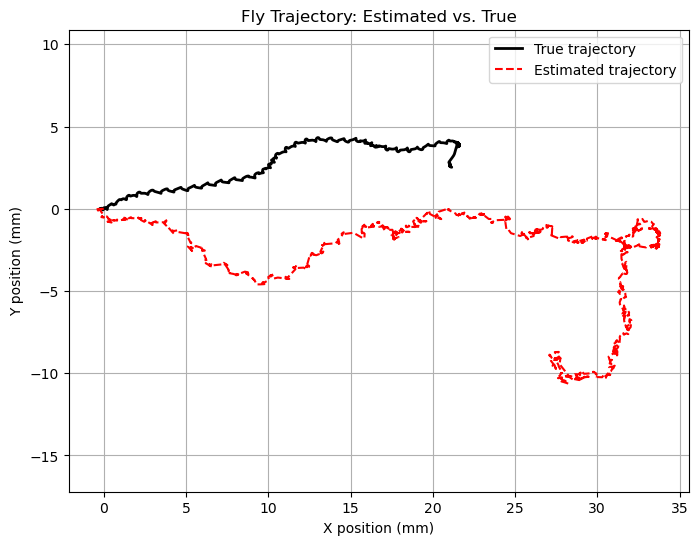

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Estimated trajectory
estimated = np.array(controller.position_trace)

# True trajectory: extract first row from obs["fly"] (x, y, z), keep only x and y
true_points = []
for obs in obs_hist:
    try:
        if "fly" in obs:
            pos = obs["fly"][0]  # First row: position
            if isinstance(pos, (list, tuple, np.ndarray)) and len(pos) >= 2:
                true_points.append([pos[0], pos[1]])
    except Exception:
        continue

true = np.array(true_points)

# Plot
plt.figure(figsize=(8, 6))
if len(true) > 0:
    plt.plot(true[:, 0], true[:, 1], label="True trajectory", color="black", linewidth=2)
if len(estimated) > 0:
    plt.plot(estimated[:, 0], estimated[:, 1], label="Estimated trajectory", color="red", linestyle="--", linewidth=1.5)






plt.xlabel("X position (mm)")
plt.ylabel("Y position (mm)")
plt.title("Fly Trajectory: Estimated vs. True")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


Plot x et y enb fct du temps 

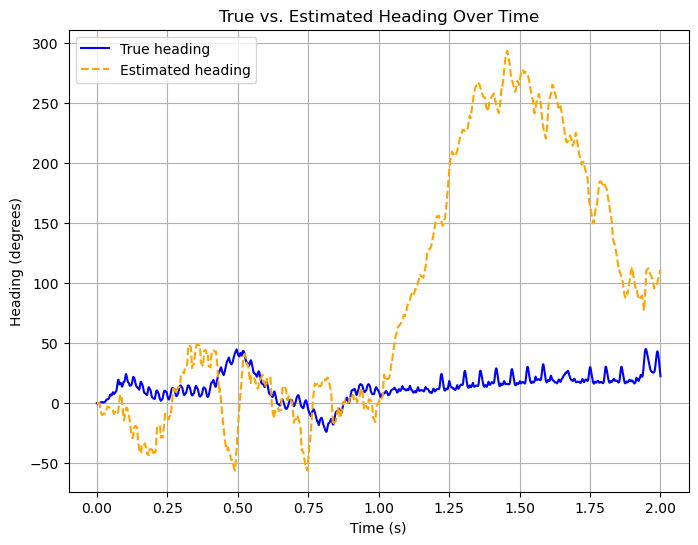

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Time axis
timesteps = np.linspace(0, controller.time, len(controller.heading_trace))

# Unwrap the heading angles to prevent ±180° discontinuities
true_heading = np.unwrap([obs["heading"] for obs in obs_hist if "heading" in obs])
est_heading = np.unwrap(controller.heading_trace)

# Convert to degrees for readability
true_heading_deg = np.rad2deg(true_heading)
est_heading_deg = np.rad2deg(est_heading)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(timesteps[:len(true_heading_deg)], true_heading_deg, label="True heading", color="blue")
plt.plot(timesteps[:len(est_heading_deg)], est_heading_deg, label="Estimated heading", color="orange", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Heading (degrees)")
plt.title("True vs. Estimated Heading Over Time")
plt.legend()
plt.grid(True)
plt.show()


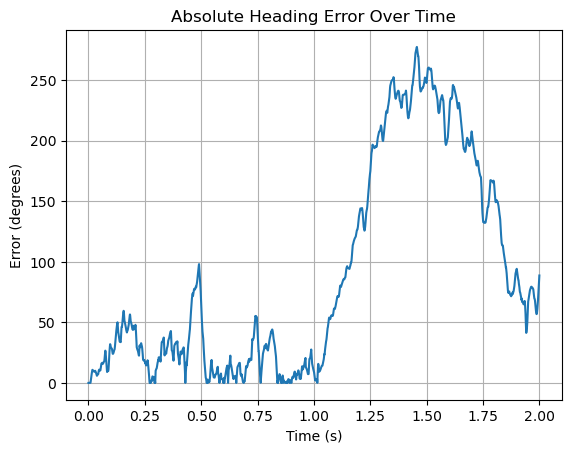

In [140]:
heading_error = np.abs(true_heading_deg - est_heading_deg)
plt.plot(timesteps[:len(heading_error)], heading_error)
plt.title("Absolute Heading Error Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Error (degrees)")
plt.grid(True)
plt.show()


[[0.00115301 0.00114451 0.00118006 0.00117751]
 [0.         0.         0.         0.        ]]


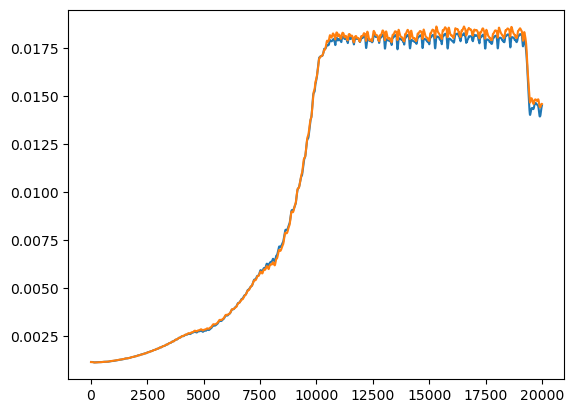

In [141]:
#plot of the odor intensity 
import matplotlib.pyplot as plt
import numpy as np

print(obs_hist[0]["odor_intensity"])    


     
odor_left = [((obs["odor_intensity"][0][0] + obs["odor_intensity"][0][2]))/2 for obs in obs_hist]
odor_right = [((obs["odor_intensity"][0][1] + obs["odor_intensity"][0][3]))/2 for obs in obs_hist]

plt.plot(odor_left, label="Left Odor Intensity")
plt.plot(odor_right, label="Right Odor Intensity")
